In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta, time
import random

import statsmodels.api as sm

In [16]:
df = pd.read_csv(r'../dataset/dimensions/dim_orders.csv')

In [17]:
df['platform_id'] = df['platform_id'].replace({1:'JioMart',2:'Blinkit',3:'Swiggy Instamart'})

In [18]:
df = df.rename(columns={'platform_id':'platform_name'})

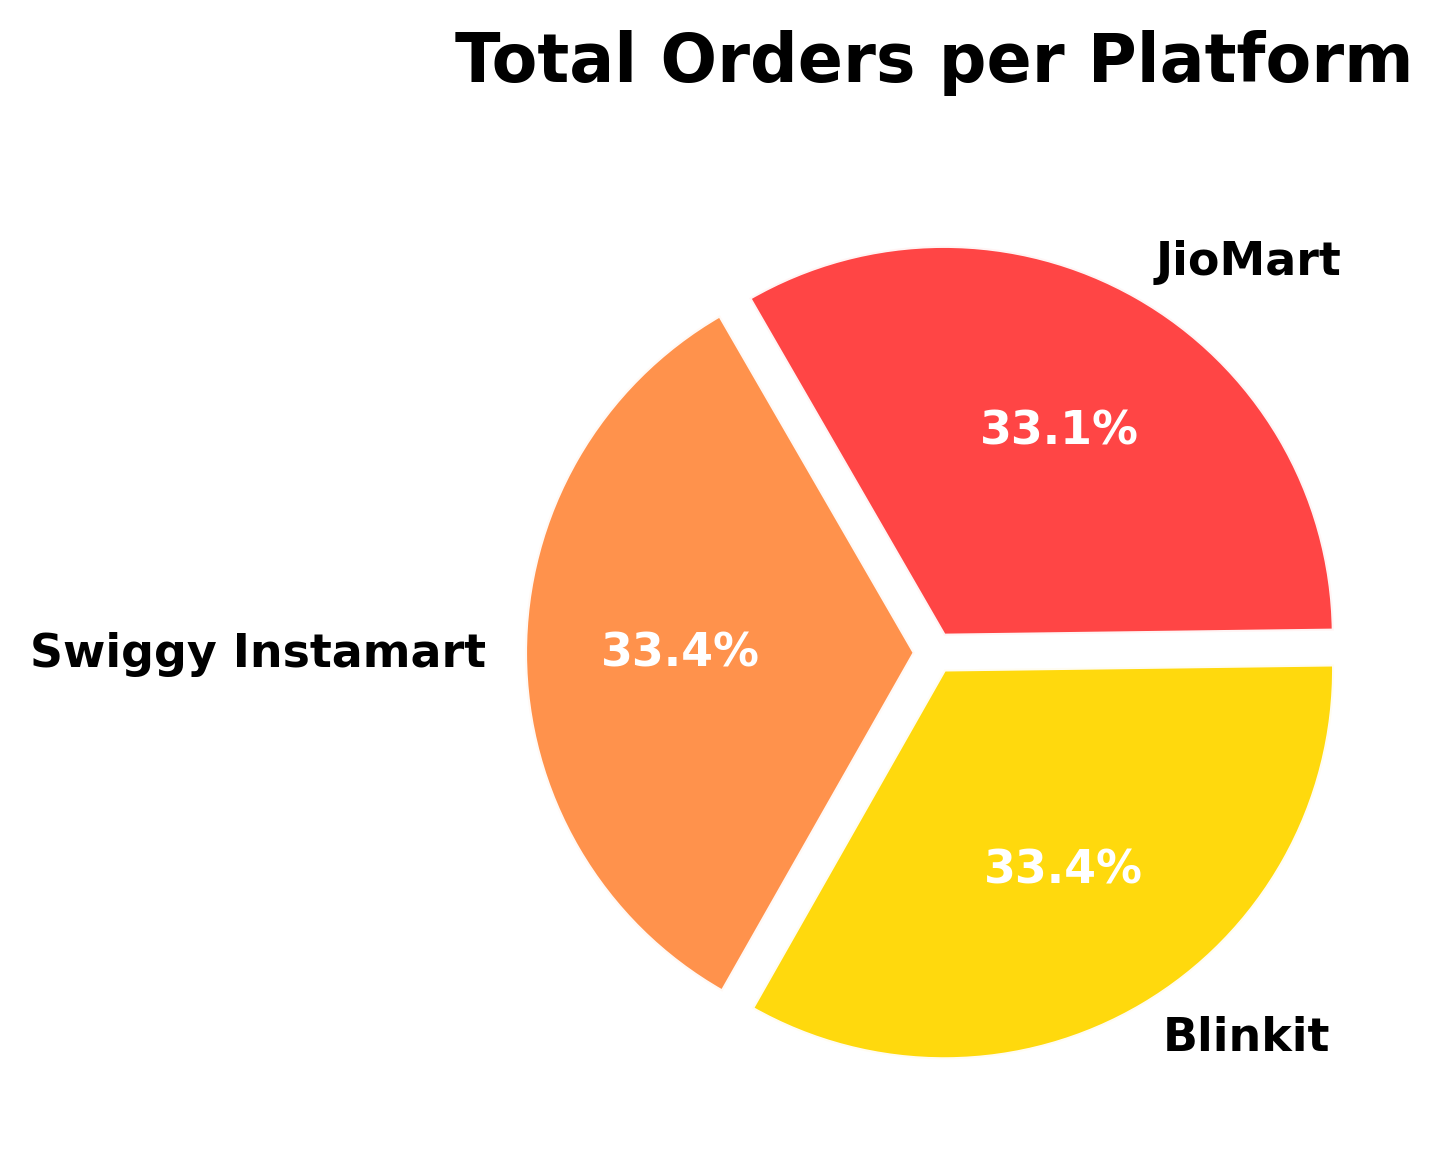

In [19]:
import matplotlib.pyplot as plt

# Custom glossy-style colors
colors = ["#FF8C42", "#FFD700", "#FF3B3B"]

# Count orders per platform
platform_counts = df['platform_name'].value_counts()

fig, ax = plt.subplots(figsize=(5,4), dpi=300)

# Explode effect (slightly separate slices)
explode = [0.05]*len(platform_counts)

wedges, texts, autotexts = ax.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1, 'antialiased':True},
    textprops={'fontsize':11, 'weight':'bold'}
)

# Improve percentage text style
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_weight("bold")
    autotext.set_size(11)

# Add a subtle shadow effect
for w in wedges:
    w.set_alpha(0.95)

# Title styling
ax.set_title("Total Orders per Platform", fontsize=16, weight='bold', pad=20)


# Tight layout
plt.tight_layout()

# Save option (high resolution)
plt.savefig("orders_per_platform.png", dpi=400, bbox_inches="tight")

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_10180\3807995302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')


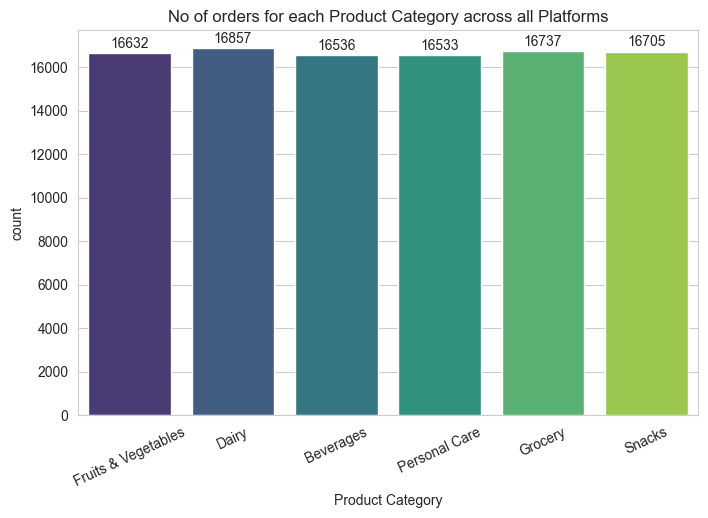

In [ ]:
temp = pd.DataFrame(df['product_category_id'].replace({1:'Dairy',2:'Grocery',3:'Snacks',4:'Fruits & Vegetables',5:'Beverages',6:'Personal Care'}))

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')

for cont in ax.containers:
    ax.bar_label(cont,fmt='%d',padding=2)

ax.set_xlabel('Product Category')
ax.set_ylabel;('No of Orders')
ax.set_title('No of orders for each Product Category across all Platforms')

plt.xticks(rotation=25,fontsize=10)

plt.show()




In [67]:
Order_Sum = round(df['order_value_inr'].sum())
print(f"Total Sum Orders Amount across all platform is: ₹{Order_Sum}")

print()

Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()
print(f"Total Sum Orders Amount for each platform is")
for platform , value in Order_Sum_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_Avg = round(df['order_value_inr'].mean())
print(f"Average of total Orders Amount across all platform is: ₹{Order_Avg}")

print()


Order_Avg_platform = df.groupby('platform_name')['order_value_inr'].mean().round()
print(f"Average Order amount for each platfrom:")
for platform, value in Order_Avg_platform.items():
    print(f"{platform}: ₹{value}")


print()

Order_max_platform = df.groupby('platform_name')['order_value_inr'].max().round()
print(f"Max Order amount for each platfrom:")
for platform, value in Order_max_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_min_platform = df.groupby('platform_name')['order_value_inr'].min().round()
print(f"Minimum Order amount for each platfrom:")
for platform, value in Order_min_platform.items():
    print(f"{platform}: ₹{value}")




Total Sum Orders Amount across all platform is: ₹59225643

Total Sum Orders Amount for each platform is
Blinkit: ₹19856117
JioMart: ₹19551516
Swiggy Instamart: ₹19818010

Average of total Orders Amount across all platform is: ₹592

Average Order amount for each platfrom:
Blinkit: ₹594.0
JioMart: ₹590.0
Swiggy Instamart: ₹592.0

Max Order amount for each platfrom:
Blinkit: ₹5445
JioMart: ₹2000
Swiggy Instamart: ₹1996

Minimum Order amount for each platfrom:
Blinkit: ₹20
JioMart: ₹22
Swiggy Instamart: ₹50


In [70]:
Delivery_Avg = round(df['delivery_time_min'].mean())
print(f"Average Delivery time across all platform is: {Delivery_Avg}min")

print()

Avg_Delivery = df.groupby('platform_name')['delivery_time_min'].mean().round()
print(f"Average delivery time for each platform is:")
for platform, value in Avg_Delivery.items():
    print(f"{platform}: {value}min")

print()


Fastest_Delivery = df.groupby('platform_name')['delivery_time_min'].min()
print(f"Fastest delivery time for each platform is:")
for platform, value in Fastest_Delivery.items():
    print(f"{platform}: {value}min")


print()

Slowest_Delivery = df.groupby('platform_name')['delivery_time_min'].max()
print(f"Slowest delivery time fro each platform is:")
for platform, value in Slowest_Delivery.items():
    print(f"{platform}: {value}min")






Average Delivery time across all platform is: 14min

Average delivery time for each platform is:
Blinkit: 13.0min
JioMart: 18.0min
Swiggy Instamart: 12.0min

Fastest delivery time for each platform is:
Blinkit: 5.0min
JioMart: 5.0min
Swiggy Instamart: 4.0min

Slowest delivery time fro each platform is:
Blinkit: 76.0min
JioMart: 73.0min
Swiggy Instamart: 45.0min


In [121]:
def random_datetime():
    start_date = datetime(2025, 3, 1)
    end_date = datetime(2025, 3, 12)

    random_days = random.randint(0, (end_date - start_date).days)
    date = start_date + timedelta(days=random_days)

    hour = random.randint(0, 23)   # pick from 0–23
    minute = random.randint(0, 59)

    return datetime.combine(date, time(hour, minute))


In [ ]:
df.to_csv(r'../dataset/cleaned_orders.csv', index=False)

In [2]:
df = pd.read_csv(r'../dataset/cleaned_orders.csv')

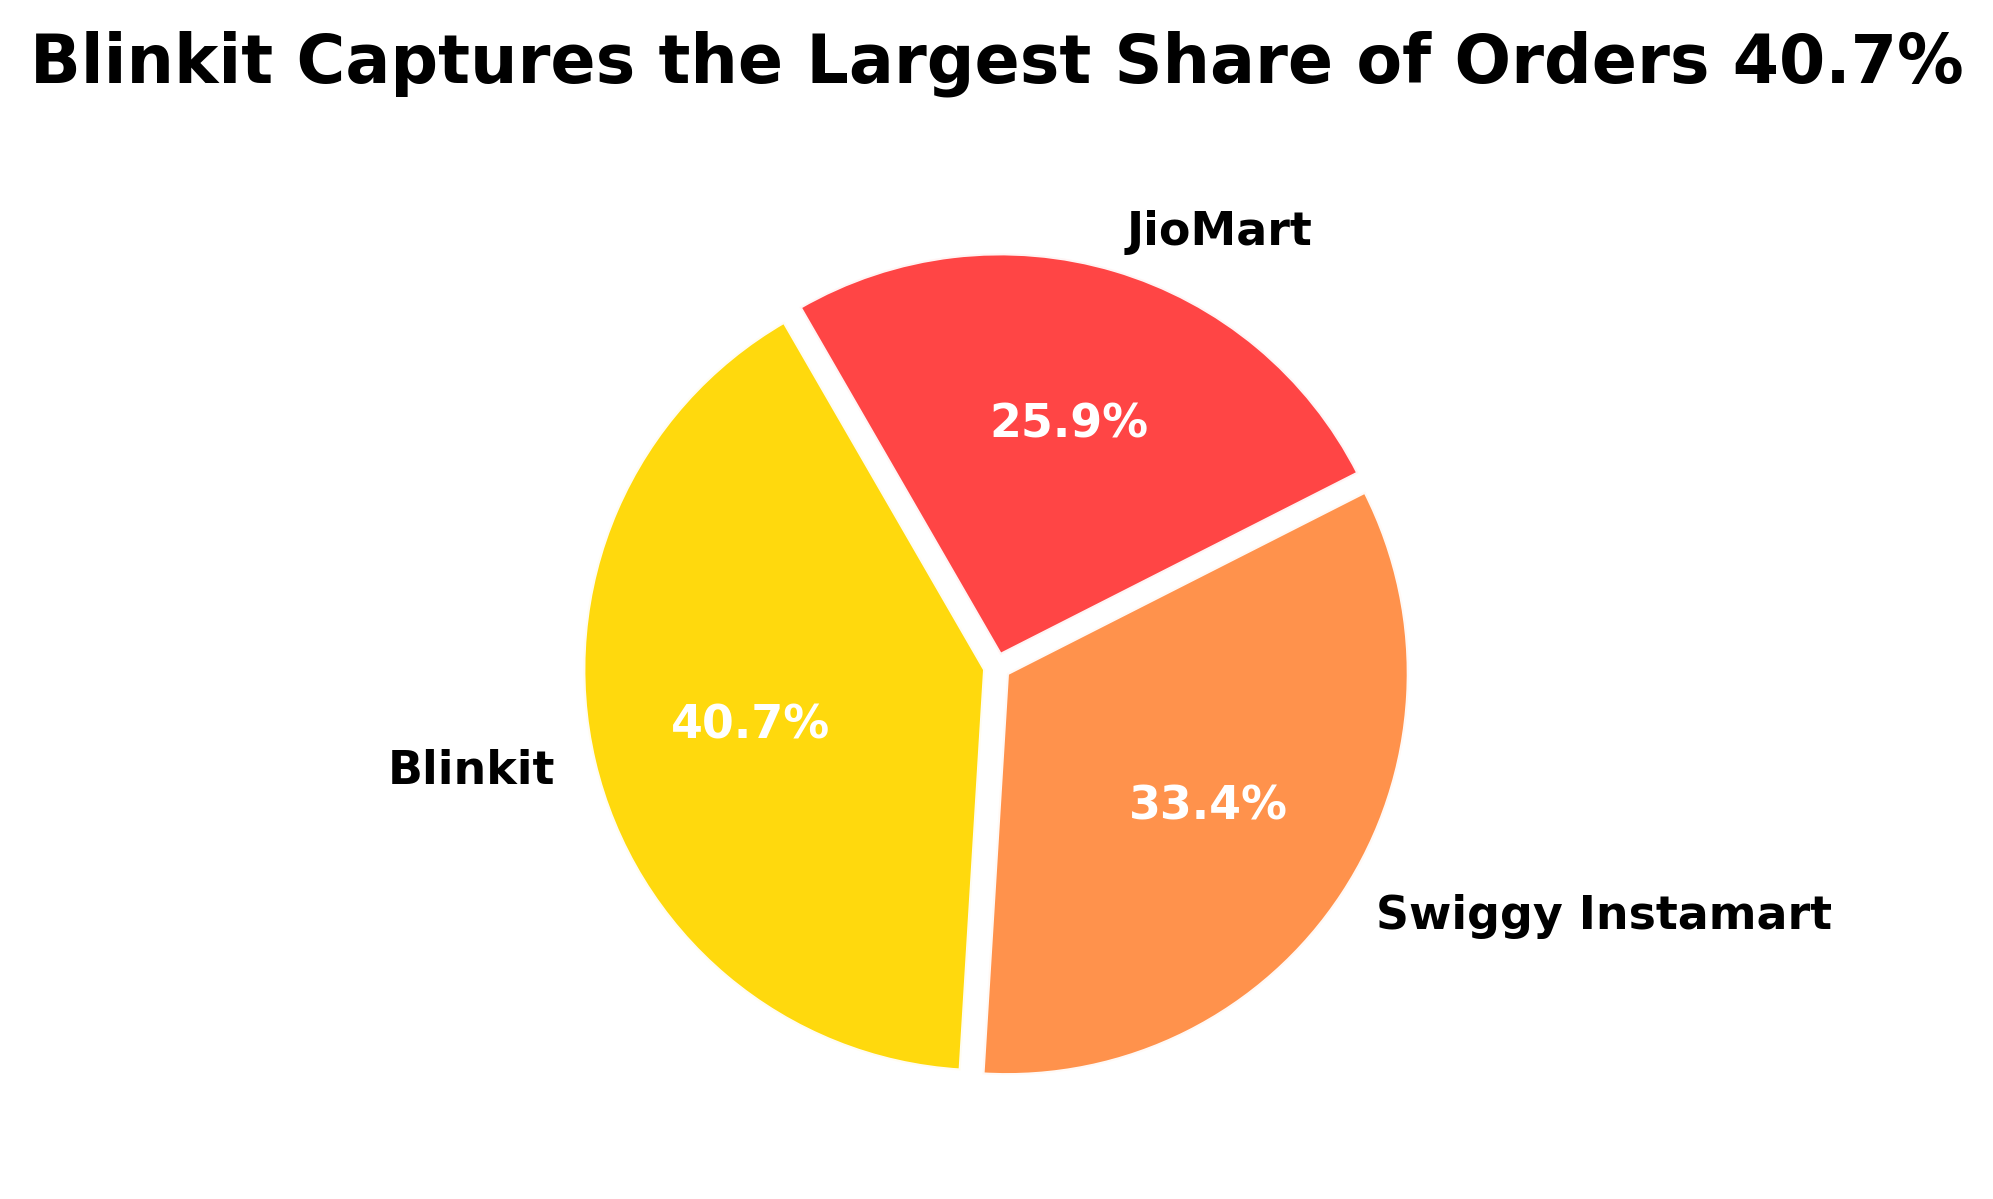

In [3]:
import matplotlib.pyplot as plt

# Custom glossy-style colors
colors = ["#FFD700","#FF8C42", "#FF3B3B"]

# Count orders per platform
platform_counts = df['platform_name'].value_counts()

fig, ax = plt.subplots(figsize=(5,5), dpi=300)

# Explode effect (slightly separate slices)
explode = [0.03]*len(platform_counts)

wedges, texts, autotexts = ax.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1, 'antialiased':True},
    textprops={'fontsize':11, 'weight':'bold'}
)

# Improve percentage text style
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_weight("bold")
    autotext.set_size(11)

# Add a subtle shadow effect
for w in wedges:
    w.set_alpha(0.95)

# Title styling
ax.set_title("Blinkit Captures the Largest Share of Orders 40.7%", fontsize=16, weight='bold', pad=20)


# Tight layout
plt.tight_layout()

# Save option (high resolution)
plt.savefig("orders_per_platform.png", dpi=400, bbox_inches="tight")

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_17304\1545309404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')


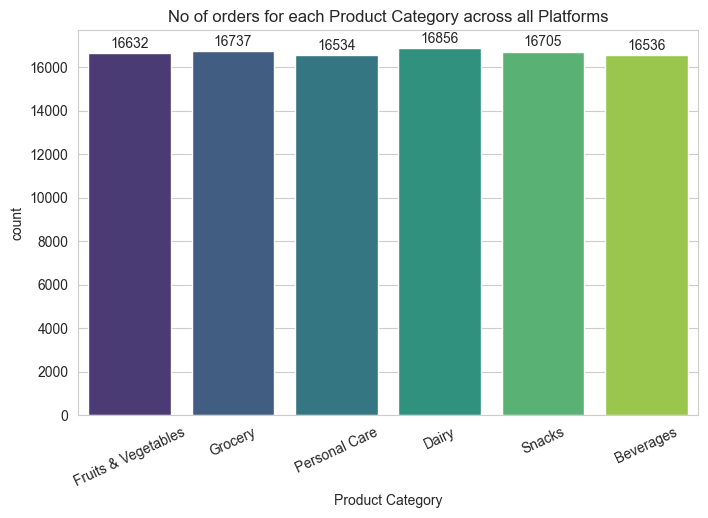

In [4]:
temp = pd.DataFrame(df['product_category_id'].replace({1:'Dairy',2:'Grocery',3:'Snacks',4:'Fruits & Vegetables',5:'Beverages',6:'Personal Care'}))

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')

for cont in ax.containers:
    ax.bar_label(cont,fmt='%d',padding=2)

ax.set_xlabel('Product Category')
ax.set_ylabel;('No of Orders')
ax.set_title('No of orders for each Product Category across all Platforms')

plt.xticks(rotation=25,fontsize=10)

plt.show()




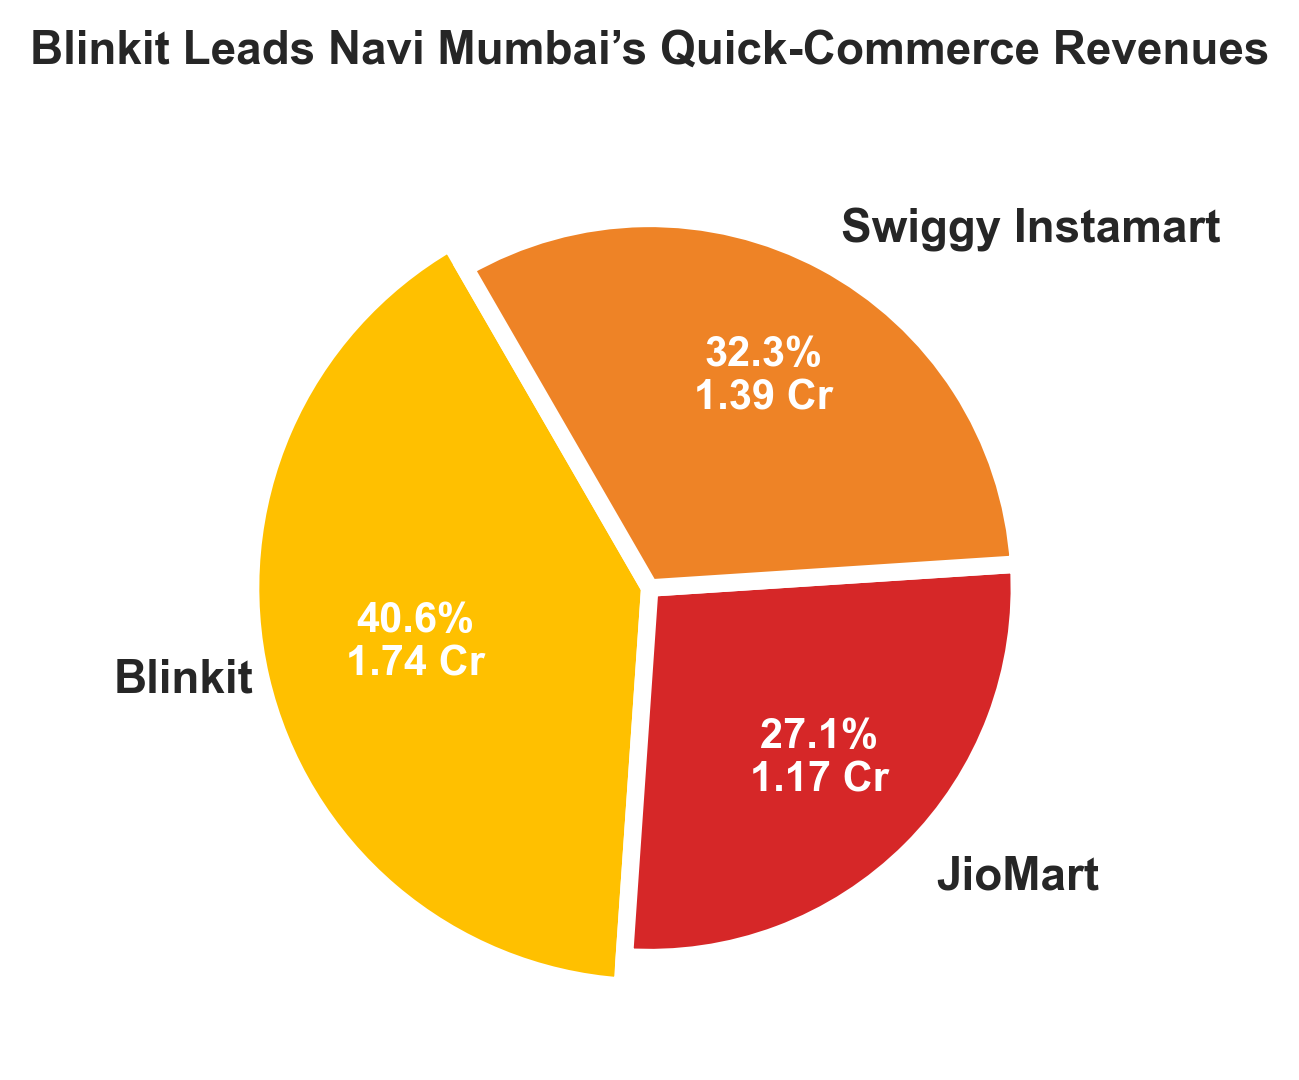

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

def format_inr(value):
    if value >= 1e7:   # 1 crore
        return f"{value/1e7:.2f} Cr"
    elif value >= 1e5: # 1 lakh
        return f"{value/1e5:.2f} L"
    else:
        return f"₹{value:,.0f}"

colors = ["#FFC000","#d62728","#ee8326"]  # Swiggy Orange, Blinkit Yellow, JioMart Red

# Revenue per platform
Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()

plt.figure(figsize=(5,4), dpi=300)
sns.set_style('darkgrid')

def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n{format_inr(absolute)}"

wedges, texts, autotexts = plt.pie(
    Order_Sum_platform,
    labels=Order_Sum_platform.index,
    autopct=lambda pct: autopct_format(pct, Order_Sum_platform),
    startangle=120,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 4.2},
    textprops={'fontsize': 11, 'weight': 'bold'},
    pctdistance=0.65
)

# Highlight: enlarge the biggest slice slightly
max_index = Order_Sum_platform.argmax()
wedges[max_index].set_radius(1.08)  # 8% bigger than others

# Style percentages & values
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

plt.title("Blinkit Leads Navi Mumbai’s Quick-Commerce Revenues", 
          fontsize=11, weight='bold', pad=15)

plt.savefig("revenue_share_platform.png", dpi=300, bbox_inches="tight")
plt.show()


In [5]:
Order_Sum = round(df['order_value_inr'].sum())
print(f"Total Sum Orders Amount across all platform is: ₹{Order_Sum}")

print()

Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()
print(f"Total Sum Orders Amount for each platform is")
for platform , value in Order_Sum_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_Avg = round(df['order_value_inr'].mean())
print(f"Average of total Orders Amount across all platform is: ₹{Order_Avg}")

print()


Order_Avg_platform = df.groupby('platform_name')['order_value_inr'].mean().round()
print(f"Average Order amount for each platfrom:")
for platform, value in Order_Avg_platform.items():
    print(f"{platform}: ₹{value}")


print()

Order_max_platform = df.groupby('platform_name')['order_value_inr'].max().round()
print(f"Max Order amount for each platfrom:")
for platform, value in Order_max_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_min_platform = df.groupby('platform_name')['order_value_inr'].min().round()
print(f"Minimum Order amount for each platfrom:")
for platform, value in Order_min_platform.items():
    print(f"{platform}: ₹{value}")




Total Sum Orders Amount across all platform is: ₹42995536

Total Sum Orders Amount for each platform is
Blinkit: ₹17444570
JioMart: ₹11663443
Swiggy Instamart: ₹13887523

Average of total Orders Amount across all platform is: ₹430

Average Order amount for each platfrom:
Blinkit: ₹429.0
JioMart: ₹451.0
Swiggy Instamart: ₹415.0

Max Order amount for each platfrom:
Blinkit: ₹5445
JioMart: ₹2999
Swiggy Instamart: ₹1996

Minimum Order amount for each platfrom:
Blinkit: ₹19
JioMart: ₹22
Swiggy Instamart: ₹30


In [6]:
Delivery_Avg = round(df['delivery_time_min'].mean())
print(f"Average Delivery time across all platform is: {Delivery_Avg}min")

print()

Avg_Delivery = df.groupby('platform_name')['delivery_time_min'].mean().round()
print(f"Average delivery time for each platform is:")
for platform, value in Avg_Delivery.items():
    print(f"{platform}: {value}min")

print()


Fastest_Delivery = df.groupby('platform_name')['delivery_time_min'].min()
print(f"Fastest delivery time for each platform is:")
for platform, value in Fastest_Delivery.items():
    print(f"{platform}: {value}min")


print()

Slowest_Delivery = df.groupby('platform_name')['delivery_time_min'].max()
print(f"Slowest delivery time fro each platform is:")
for platform, value in Slowest_Delivery.items():
    print(f"{platform}: {value}min")






Average Delivery time across all platform is: 13min

Average delivery time for each platform is:
Blinkit: 13.0min
JioMart: 17.0min
Swiggy Instamart: 11.0min

Fastest delivery time for each platform is:
Blinkit: 5min
JioMart: 5min
Swiggy Instamart: 5min

Slowest delivery time fro each platform is:
Blinkit: 76min
JioMart: 73min
Swiggy Instamart: 45min


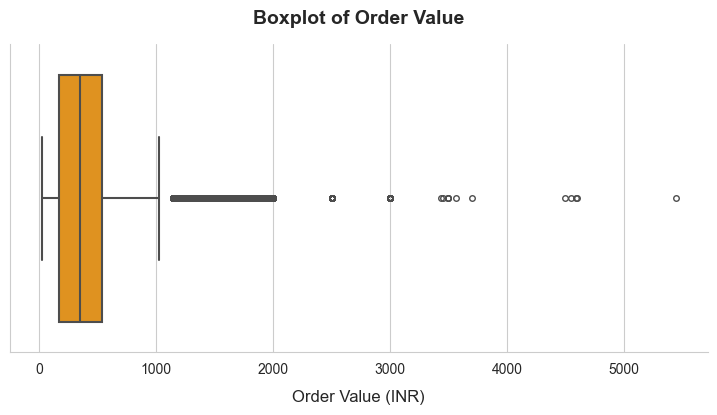

In [102]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x=df['order_value_inr'], 
    color="#FF9800",          # nicer orange shade
    linewidth=1.5,            # thicker border
    fliersize=4               # size of outlier dots
)

# Labels & title
ax.set_title("Boxplot of Order Value", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Order Value (INR)", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


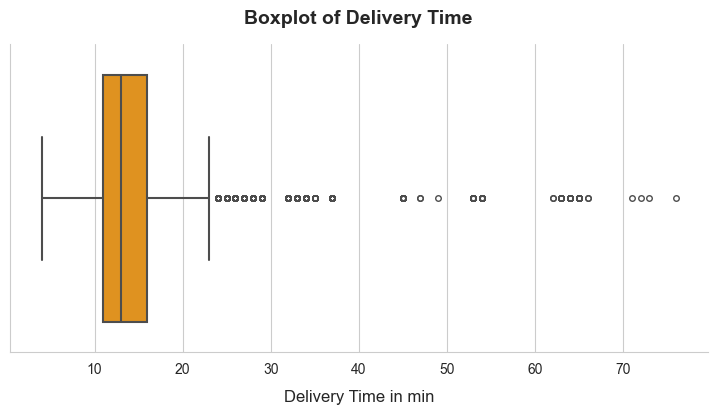

In [103]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x=df['delivery_time_min'], 
    color="#FF9800",          # nicer orange shade
    linewidth=1.5,            # thicker border
    fliersize=4               # size of outlier dots
)

# Labels & title
ax.set_title("Boxplot of Delivery Time", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Delivery Time in min", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_22476\4072866313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


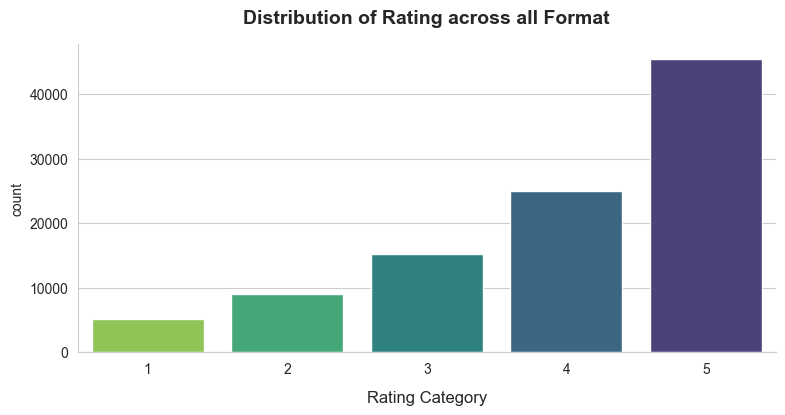

In [27]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.countplot(
    x=df['service_rating'],
    palette = 'viridis_r'
)

# Labels & title
ax.set_title("Distribution of Rating across all Format", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Rating Category", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_17304\1079615155.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\danis\AppData\Local\Temp\ipykernel_17304\1079615155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


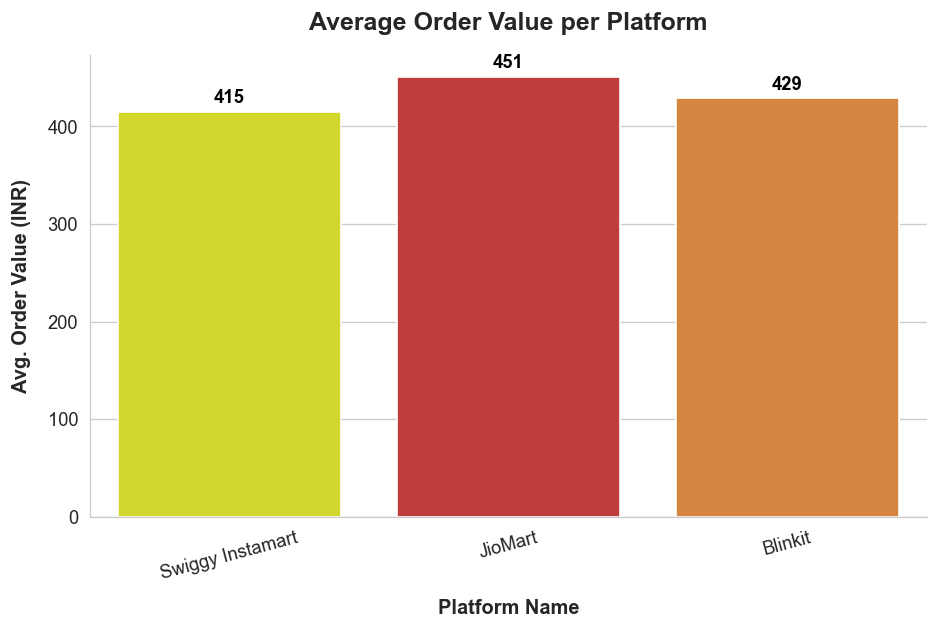

In [7]:
plt.figure(figsize=(9,5), dpi=120)   # dpi=resolution, sharper text & lines
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df,
    x='platform_name',
    y='order_value_inr',
    estimator='mean',
    ci=None,
    palette=["#edf10f","#d62728","#ee8326"]
)

# Labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=11, weight='bold', color="black")

# Axis labels & title
ax.set_xlabel("Platform Name", fontsize=12, labelpad=10, weight='bold')
ax.set_ylabel("Avg. Order Value (INR)", fontsize=12, labelpad=10, weight='bold')
ax.set_title("Average Order Value per Platform", fontsize=15, weight='bold', pad=15)

# Rotate x-axis labels slightly if names are long
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

# Remove unnecessary top/right borders
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_17304\38021502.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\danis\AppData\Local\Temp\ipykernel_17304\38021502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


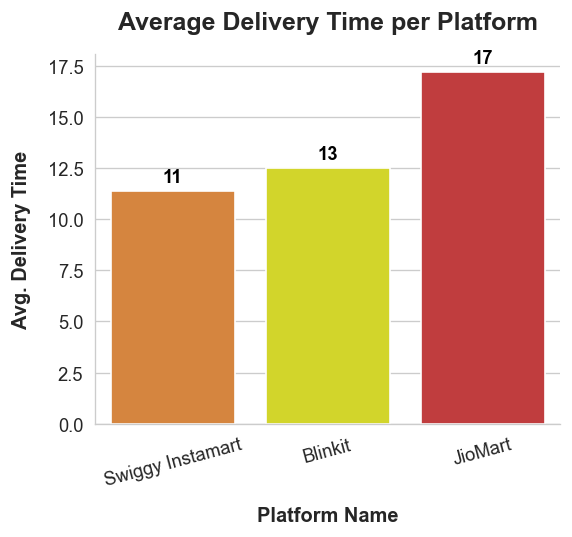

In [8]:
plt.figure(figsize=(5,4),dpi=120)
sns.set_style('whitegrid')

order = df.groupby('platform_name')['delivery_time_min'].mean().sort_values(ascending=True).index

ax = sns.barplot(
    data = df,
    x='platform_name',
    y='delivery_time_min',
    estimator='mean',
    ci=None,
    palette=["#ee8326","#edf10f","#d62728"],
    order=order
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=3, fontsize=11, weight='bold', color="black")

ax.set_xlabel("Platform Name", fontsize=12, labelpad=10, weight='bold')
ax.set_ylabel("Avg. Delivery Time", fontsize=12, labelpad=10, weight='bold')
ax.set_title("Average Deli" \
"very Time per Platform", fontsize=15, weight='bold', pad=15)

# Rotate x-axis labels slightly if names are long
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

# Remove unnecessary top/right borders
sns.despine()

plt.show()


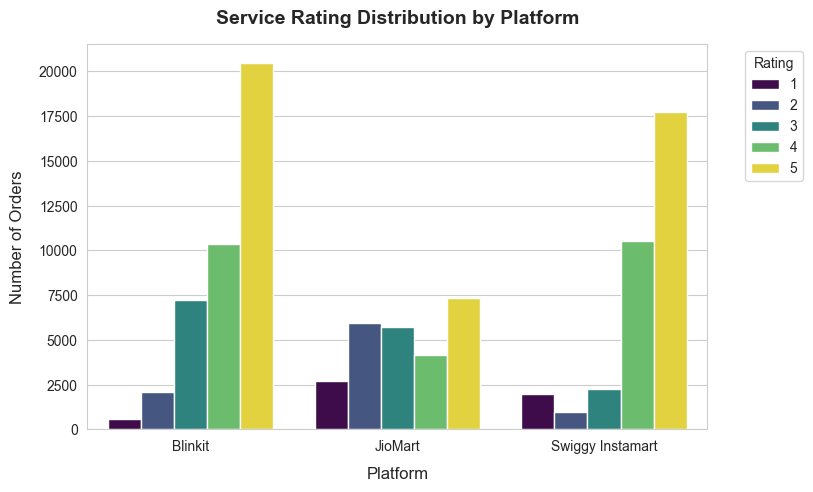

In [28]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x="platform_name",
    hue="service_rating",   # 1–5 categories
    palette="viridis"
)

# Labels & formatting
ax.set_title("Service Rating Distribution by Platform", fontsize=14, weight="bold", pad=15)
ax.set_xlabel("Platform", fontsize=12, labelpad=10)
ax.set_ylabel("Number of Orders", fontsize=12, labelpad=10)

# Add legend
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [29]:
service_per_platform = df.groupby('platform_name')['service_rating'].mean().round()
service_per_platform

platform_name
Blinkit             4.0
JioMart             3.0
Swiggy Instamart    4.0
Name: service_rating, dtype: float64

C:\Users\danis\AppData\Local\Temp\ipykernel_22476\2208846571.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')


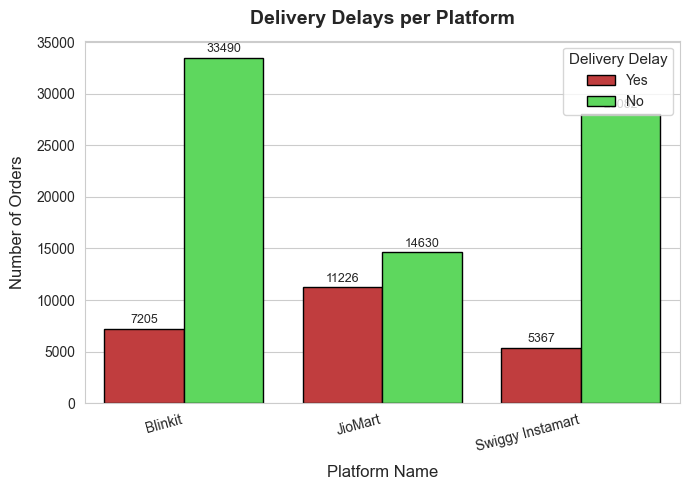

In [31]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')

# Custom color palette
colors = ["#d62728","#4aeb4a"]  # green = no delay, red = delay

ax = sns.countplot(
    data=df,
    x='platform_name',
    hue='delivery_delay',
    palette=colors,
    edgecolor="black"
)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Titles and labels
ax.set_title('Delivery Delays per Platform', fontsize=14, weight='bold', pad=12)
ax.set_xlabel('Platform Name', fontsize=12, labelpad=8)
ax.set_ylabel('Number of Orders', fontsize=12, labelpad=8)

# Legend styling
ax.legend(title="Delivery Delay", fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# Improve x-labels readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()


In [123]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback'],
      dtype='object')

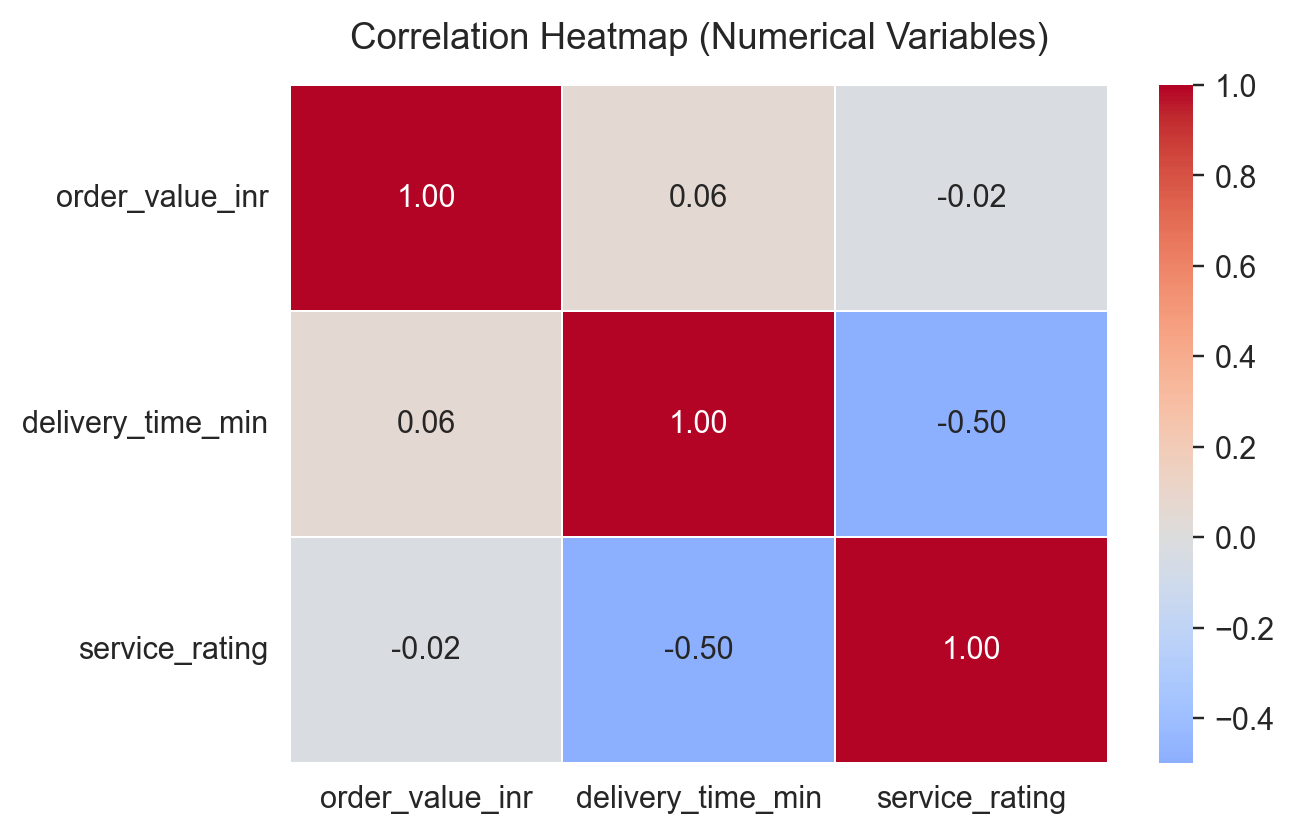

In [32]:
# Select only numerical columns
num_cols = ['order_value_inr', 'delivery_time_min', 'service_rating']
corr = df[num_cols].corr()

plt.figure(figsize=(6,4),dpi=220)
sns.set_style("white")

ax = sns.heatmap(
    corr, 
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Better color contrast
    center=0,          # Center around 0
    linewidths=0.5,    # Add separation lines
    fmt=".2f"          # Round to 2 decimals
)

ax.set_title("Correlation Heatmap (Numerical Variables)", fontsize=12, pad=12)
plt.show()

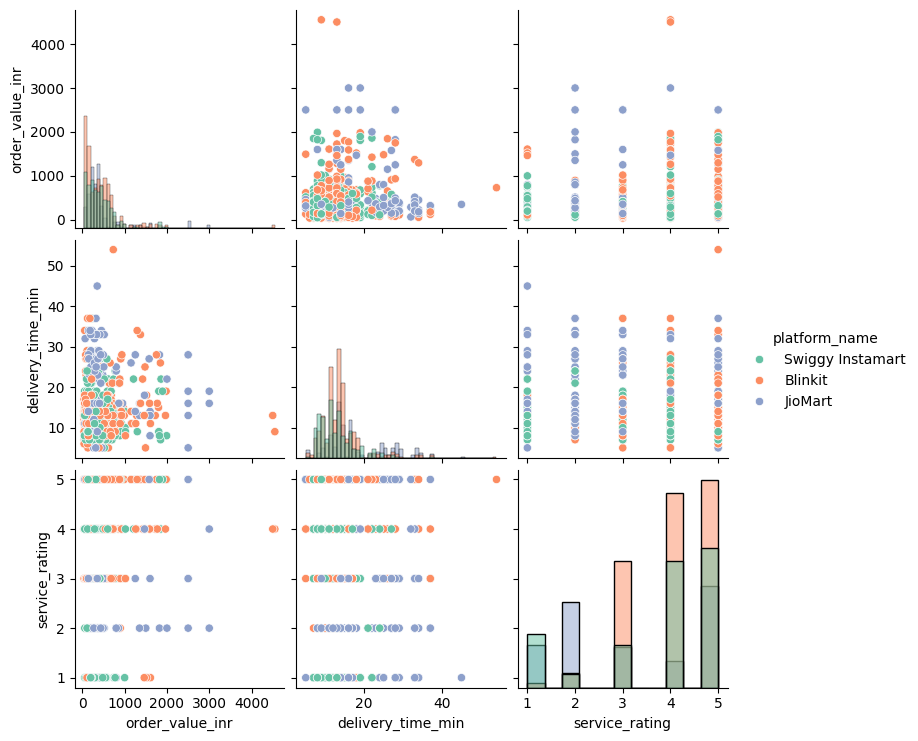

In [7]:


# Select only required numerical columns + hue column
num_cols = ["order_value_inr", "delivery_time_min", "service_rating", "platform_name"]

sample_df = df[num_cols].sample(1000, random_state=42)  # take only 1000 rows
sns.pairplot(sample_df, hue="platform_name", diag_kind="hist", palette="Set2")
plt.show()




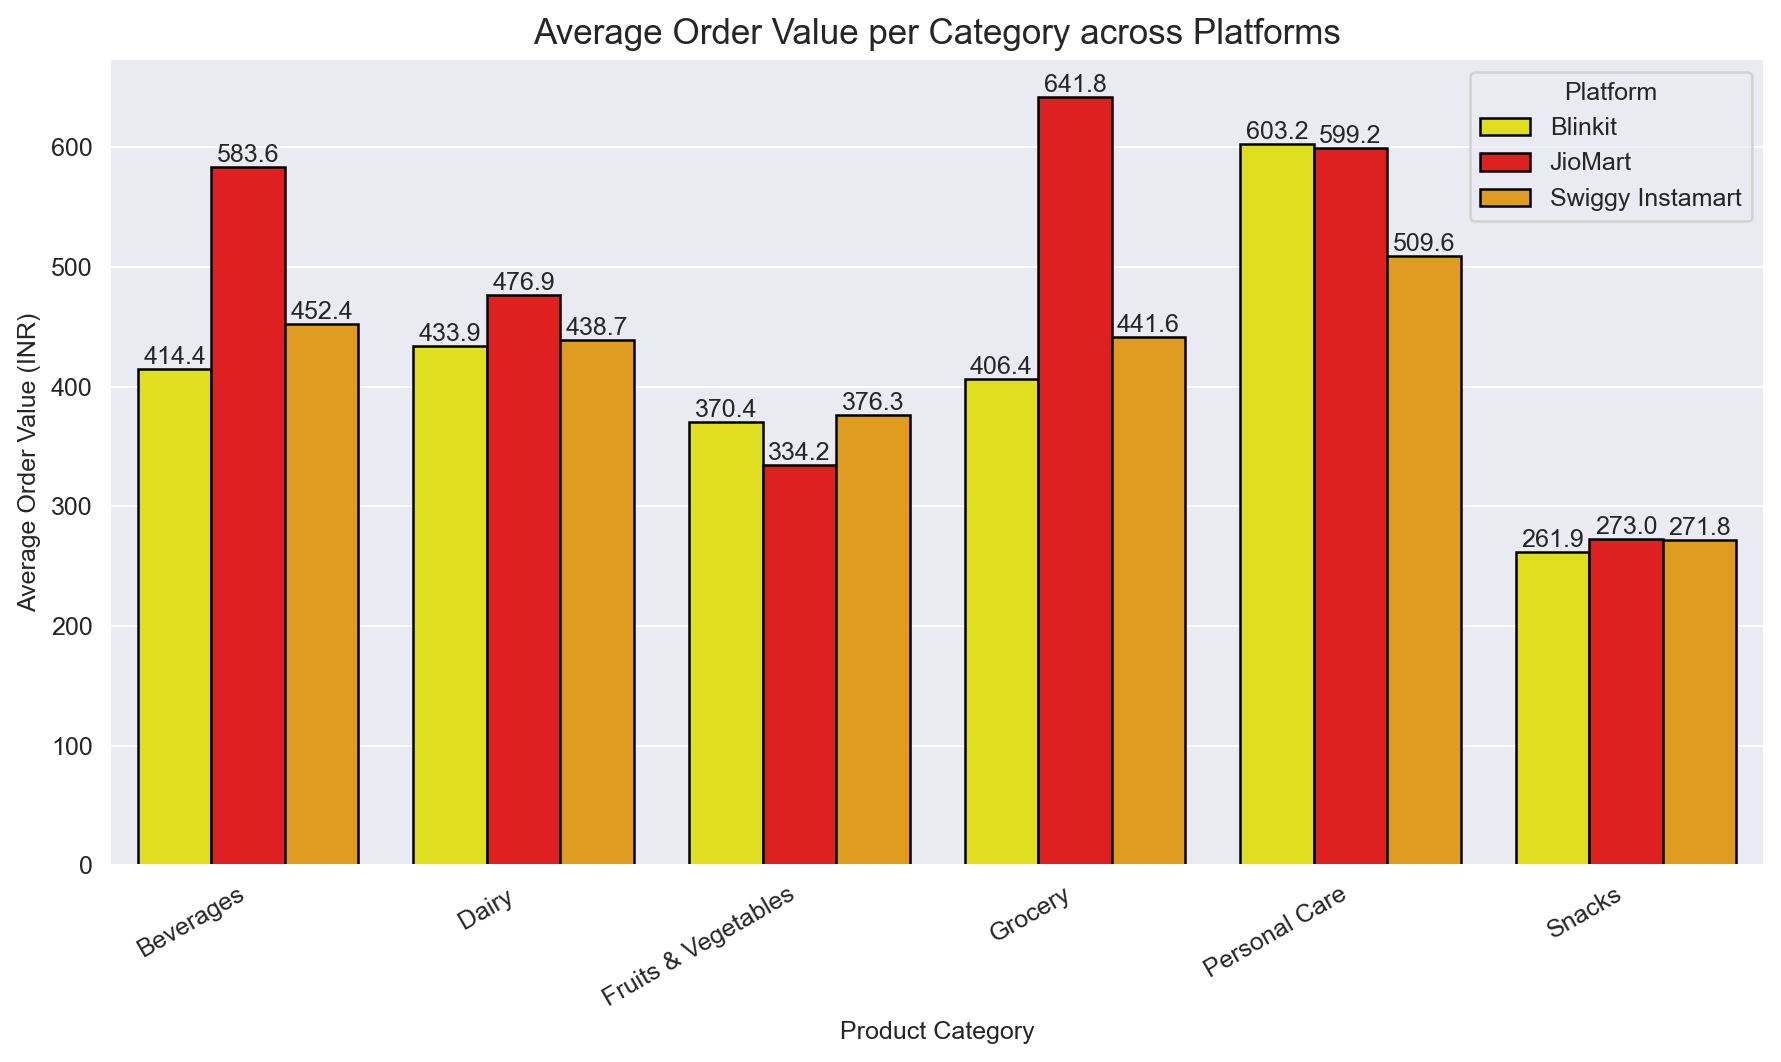

In [106]:


# Mapping numbers → names
product_category_mapping = {
    'Dairy ':1,
    'Grocery':2,
    'Snacks':3,
    'Fruits & Vegetables':4,
    'Beverages':5,
    'Personal Care':6
}

# Reverse mapping (id → name)
id_to_category = {v: k for k, v in product_category_mapping.items()}

# Map product_category_id to names
df["product_category_name"] = df["product_category_id"].map(id_to_category)

# Group and calculate average
avg_order = df.groupby(["platform_name", "product_category_name"])["order_value_inr"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6),dpi=180)
sns.set_style('darkgrid')
ax = sns.barplot(
    data=avg_order,
    x="product_category_name",
    y="order_value_inr",
    hue="platform_name",
    palette={"Blinkit":"yellow", "Swiggy Instamart":"orange", "JioMart":"red"},
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

plt.xticks(rotation=30, ha="right")
plt.title("Average Order Value per Category across Platforms", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Average Order Value (INR)")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


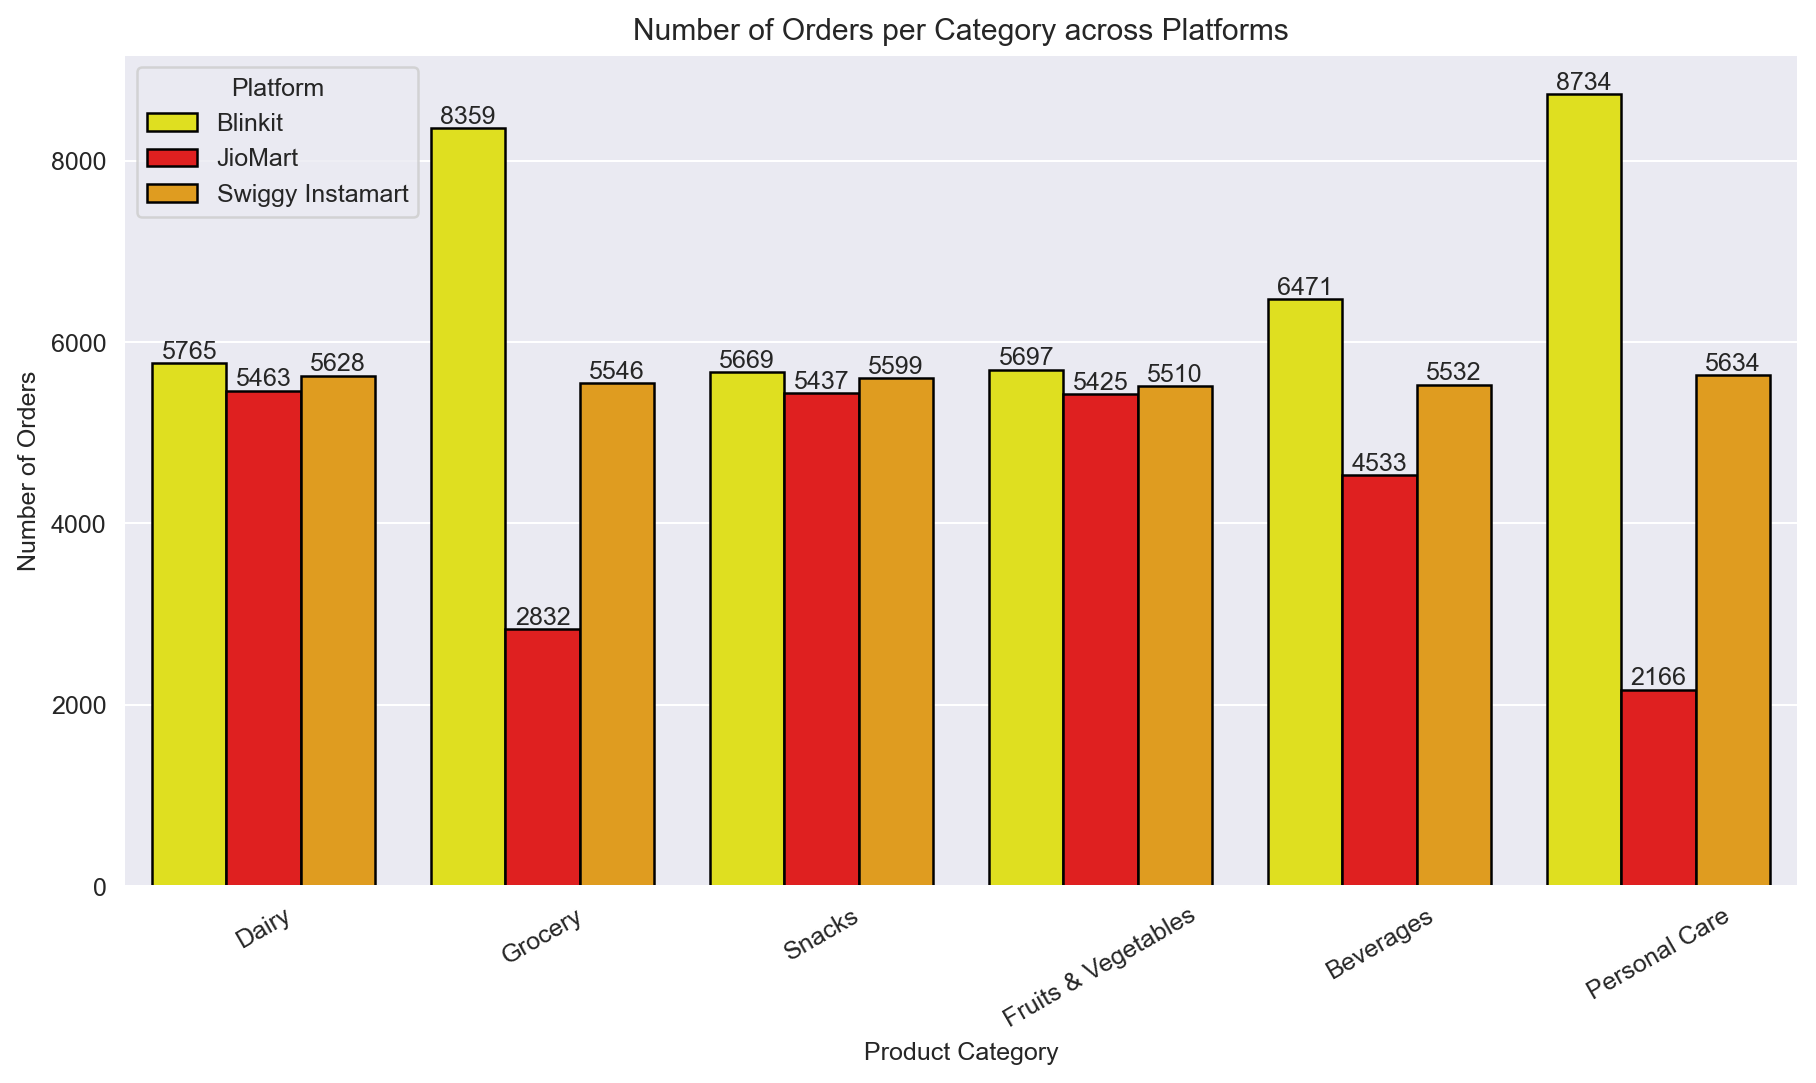

In [23]:


# Mapping for product categories
product_category_mapping = {
    1:'Dairy',
    2:'Grocery',
    3:'Snacks',
    4:'Fruits & Vegetables',
    5:'Beverages',
    6:'Personal Care'
}

# Group data by platform & category and count orders
orders_count = df.groupby(['platform_name', 'product_category_id'])['order_id'].count().reset_index()

# Map category names
orders_count['product_category_id'] = orders_count['product_category_id'].map(product_category_mapping)

# Plot
plt.figure(figsize=(12,6),dpi=180)
sns.set_style('darkgrid')
ax = sns.barplot(
    data=orders_count,
    x='product_category_id',
    y='order_id',
    hue='platform_name',
    palette={'Blinkit':'yellow', 'JioMart':'red', 'Swiggy Instamart':'orange'},
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')

plt.title("Number of Orders per Category across Platforms")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.legend(title="Platform")
plt.show()


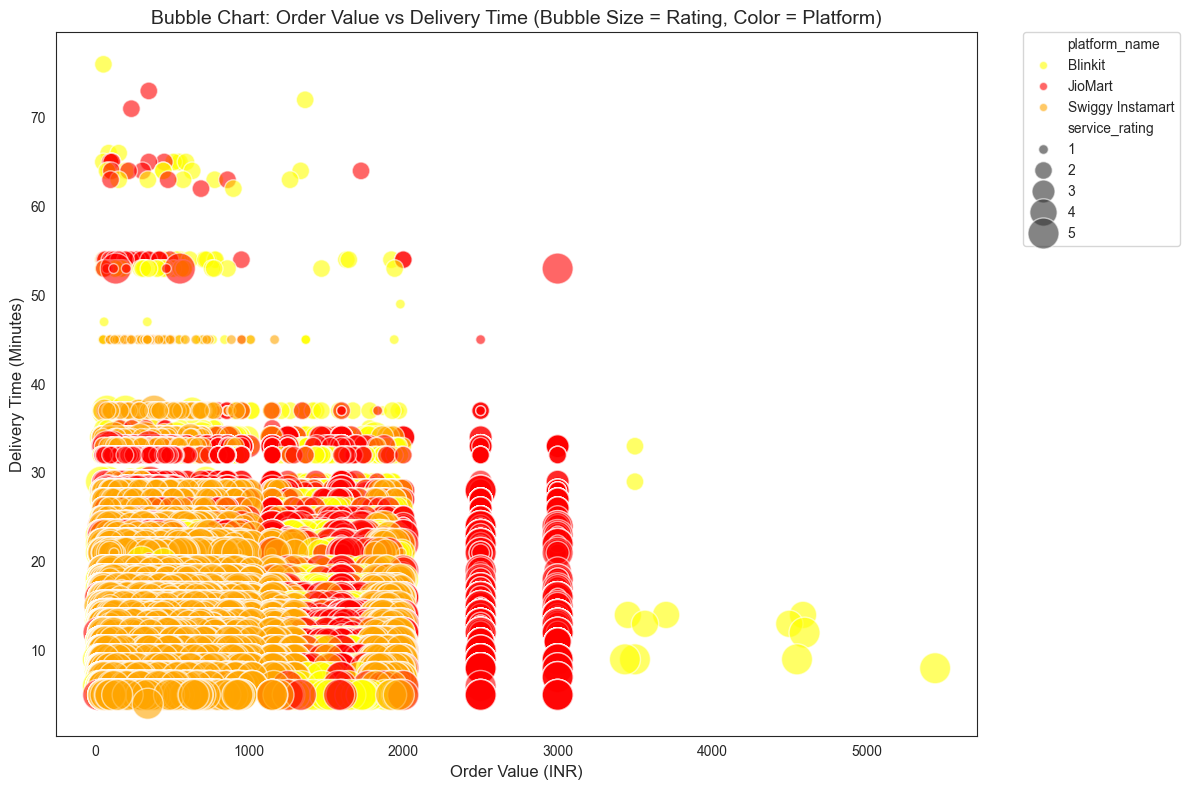

In [33]:
plt.figure(figsize=(12,8))

# Bubble chart
sns.scatterplot(
    data=df,
    x="order_value_inr",
    y="delivery_time_min",
    size="service_rating",       # bubble size
    hue="platform_name",         # bubble color
    sizes=(50, 500),             # min and max bubble size
    alpha=0.6,                   # transparency
    palette={"Blinkit":"yellow", "Swiggy Instamart":"orange", "JioMart":"red"}
)

plt.title("Bubble Chart: Order Value vs Delivery Time (Bubble Size = Rating, Color = Platform)", fontsize=14)
plt.xlabel("Order Value (INR)", fontsize=12)
plt.ylabel("Delivery Time (Minutes)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [40]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback'],
      dtype='object')

In [44]:
rating_platform_product = df.groupby(['platform_name','product_category_id'],as_index=False)['service_rating'].mean().round()
rating_platform_product

,platform_name,product_category_id,service_rating
0,Blinkit,1,4.0
1,Blinkit,2,4.0
2,Blinkit,3,4.0
3,Blinkit,4,4.0
4,Blinkit,5,4.0
5,Blinkit,6,4.0
6,JioMart,1,3.0
7,JioMart,2,3.0
8,JioMart,3,3.0
9,JioMart,4,3.0


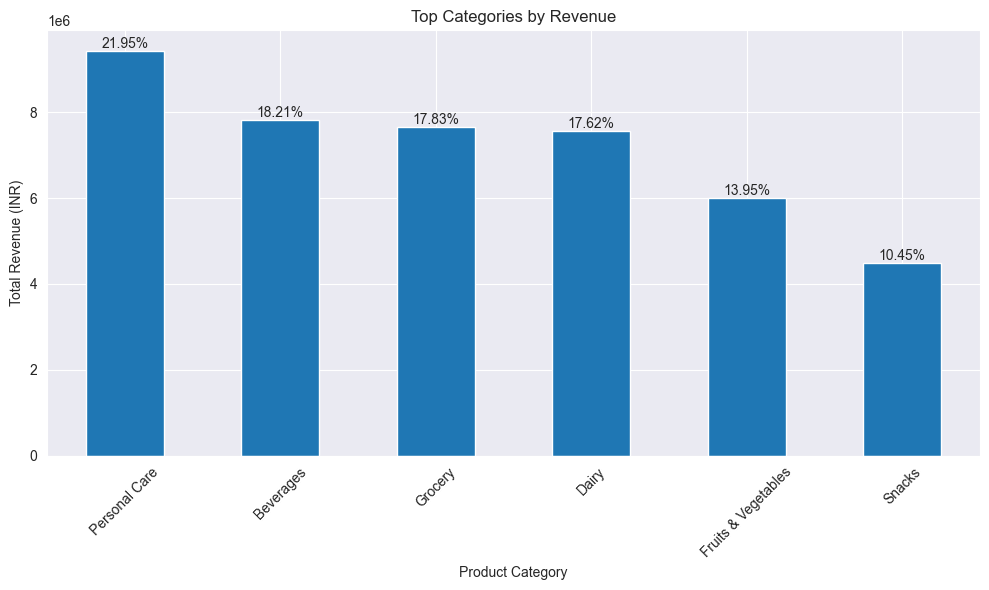

In [10]:
product_category_mapping = {
    1:'Dairy',
    2:'Grocery',
    3:'Snacks',
    4:'Fruits & Vegetables',
    5:'Beverages',
    6:'Personal Care'
}

# Top categories by revenue
cat_revenue = df.groupby('product_category_id')['order_value_inr'].sum().sort_values(ascending=False)

# map product_category_id to category names (on index)
cat_revenue.index = cat_revenue.index.map(product_category_mapping)

# calculate percentages
total_revenue = cat_revenue.sum()
cat_percent = (cat_revenue / total_revenue) * 100

plt.figure(figsize=(10,6))
ax = cat_revenue.plot(kind='bar')

# add percentage labels on bars
for i, c in enumerate(ax.containers[0]):
    ax.text(c.get_x() + c.get_width()/2, c.get_height(), 
            f"{cat_percent.iloc[i]:.2f}%", 
            ha='center', va='bottom', fontsize=10)

plt.title("Top Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


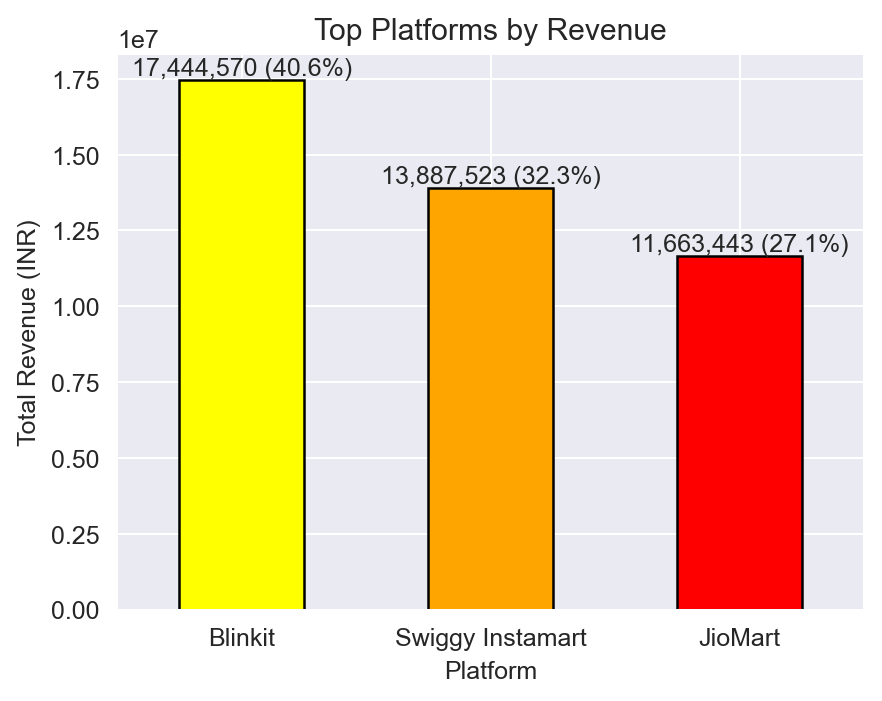

In [7]:
plt.figure(figsize=(5,4), dpi=180)
sns.set_style('darkgrid')

# Group by platform revenue
platform_revenue = df.groupby('platform_name')['order_value_inr'].sum().sort_values(ascending=False).round()

# Plot with custom colors
colors = ['yellow','orange','red']
ax = platform_revenue.plot(kind='bar', color=colors, edgecolor='black')

# Total revenue for % share
total_rev = platform_revenue.sum()

# Add labels: Value + % share
for c in ax.containers:
    ax.bar_label(c, labels=[f"{v.get_height():,.0f} ({v.get_height()/total_rev:.1%})" for v in c])

# Titles & axes
plt.title("Top Platforms by Revenue")
plt.xlabel("Platform")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=0)   # keep names readable
plt.tight_layout()
plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_17304\3348748838.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["service_rating"] >= 4).mean() * 100)


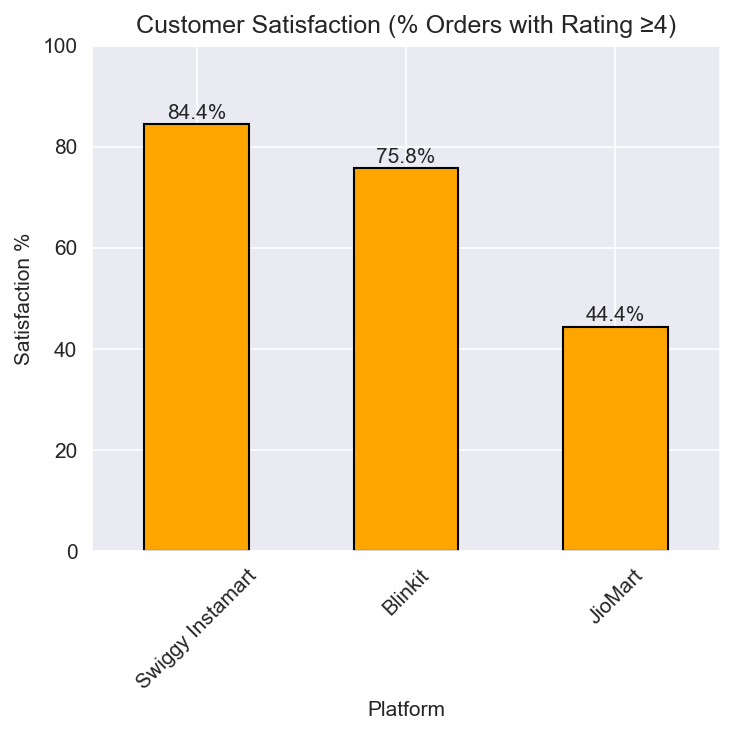

In [11]:


# ✅ Calculate satisfaction % (rating ≥4) by platform
satisfaction = (
    df.groupby("platform_name")
      .apply(lambda g: (g["service_rating"] >= 4).mean() * 100)
      .sort_values(ascending=False)
)

# ✅ Plot
plt.figure(figsize=(5,5), dpi=150)
ax = satisfaction.plot(kind="bar", color="orange", edgecolor="black")

# ✅ Add labels on bars
for i, v in enumerate(satisfaction):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.title("Customer Satisfaction (% Orders with Rating ≥4)")
plt.xlabel("Platform")
plt.ylabel("Satisfaction %")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


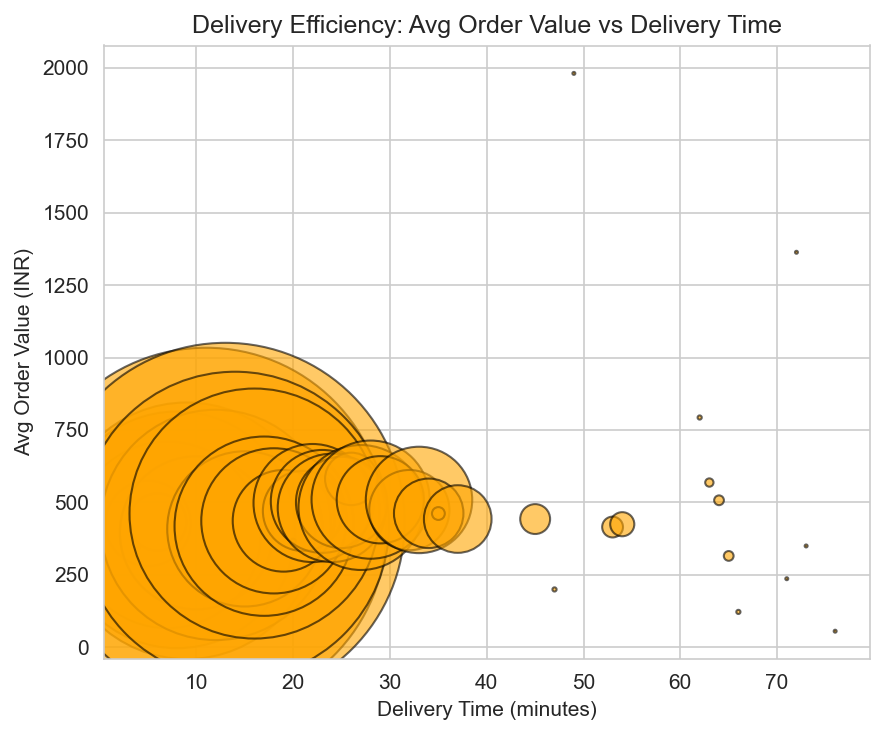

In [9]:
plt.figure(figsize=(6,5), dpi=150)
sns.set_style("whitegrid")

# Aggregate data → avg order value & count by delivery time
delivery_eff = df.groupby('delivery_time_min').agg(
    avg_value=('order_value_inr','mean'),
    orders=('order_id','count')
).reset_index()

# Scatter plot
plt.scatter(delivery_eff['delivery_time_min'],
            delivery_eff['avg_value'],
            s=delivery_eff['orders']*2,  # bubble size ~ number of orders
            alpha=0.6, c='orange', edgecolor='k')

plt.title("Delivery Efficiency: Avg Order Value vs Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Avg Order Value (INR)")
plt.tight_layout()
plt.show()


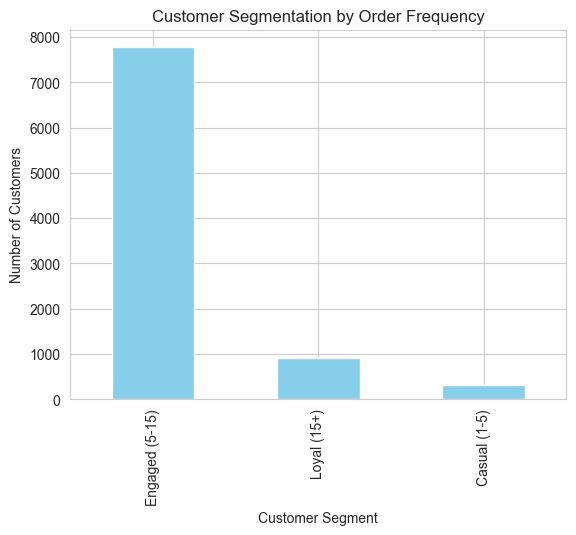

In [11]:


# Count orders per customer
cust_orders = df.groupby("customer_id")["order_id"].count().reset_index(name="order_count")

# Segment customers
def segment(x):
    if x <= 5: return "Casual (1-5)"
    elif x <= 15: return "Engaged (5-15)"
    else: return "Loyal (15+)"
cust_orders["segment"] = cust_orders["order_count"].apply(segment)

# Count customers in each segment
seg_counts = cust_orders["segment"].value_counts()

# Plot
seg_counts.plot(kind="bar", color="skyblue")
plt.title("Customer Segmentation by Order Frequency")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
# Step 1: Count orders per customer per platform
cust_platform = df.groupby(["platform_name","customer_id"])["order_id"].count().reset_index(name="order_count")

# Step 2: Segment customers based on frequency
def segment(x):
    if x <= 5: return "Casual (1-5)"
    elif x <= 15: return "Engaged (6-15)"
    else: return "Loyal (15+)"
cust_platform["segment"] = cust_platform["order_count"].apply(segment)

# Step 3: Count customers in each segment per platform
seg_platform_counts = cust_platform.groupby(["platform_name","segment"])["customer_id"].nunique().reset_index()

# Step 4: Pivot for plotting
seg_pivot = seg_platform_counts.pivot(index="platform_name", columns="segment", values="customer_id").fillna(0)

# Step 5: Plot stacked bar
seg_pivot.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Customer Segmentation per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Segment")
plt.show()


In [15]:
# Step 1: Count orders per customer
cust_orders = df.groupby("customer_id")["order_id"].count().reset_index(name="order_count")

# Step 2: Keep only customers with 15+ orders
loyal_customers = cust_orders[cust_orders["order_count"] >= 15]

loyal_customers

,customer_id,order_count
1,CUST1001,17
19,CUST1019,15
43,CUST1043,16
50,CUST1050,17
52,CUST1052,18
...,...,...
8964,CUST9964,18
8970,CUST9970,16
8971,CUST9971,19
8977,CUST9977,15


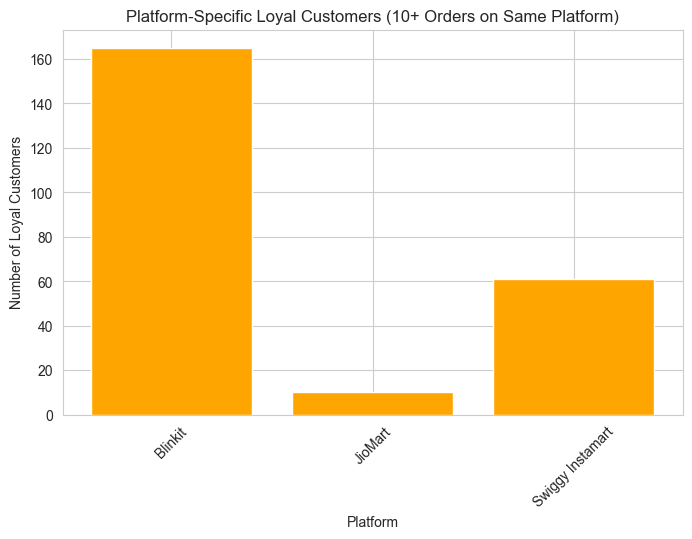

In [27]:
# Step 1: Count orders per customer per platform
cust_platform_orders = df.groupby(["customer_id", "platform_name"])["order_id"].count().reset_index(name="order_count")

# Step 2: Keep only those where count >= 15 (loyal to that platform)
loyal_platform_customers = cust_platform_orders[cust_platform_orders["order_count"] >= 10]

# Step 3: Count number of loyal customers per platform
platform_usage = loyal_platform_customers.groupby("platform_name")["customer_id"].nunique().reset_index(name="loyal_customers")

# Step 4: Plot
plt.figure(figsize=(8,5))
plt.bar(platform_usage["platform_name"], platform_usage["loyal_customers"], color="orange")
plt.title("Platform-Specific Loyal Customers (10+ Orders on Same Platform)")
plt.xlabel("Platform")
plt.ylabel("Number of Loyal Customers")
plt.xticks(rotation=45)
plt.show()


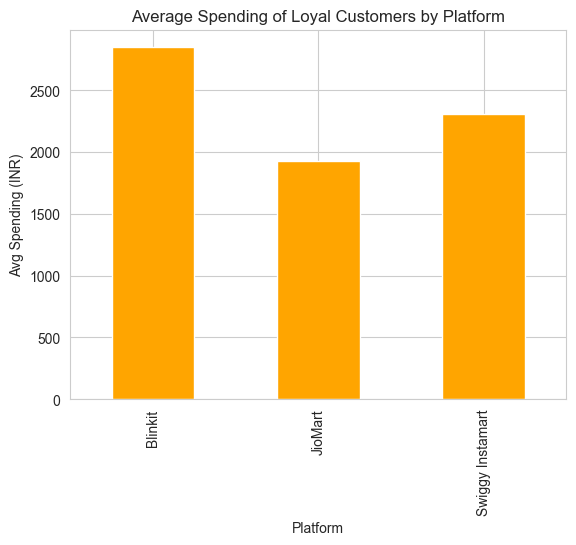

In [23]:
# Step 1: Total spending and order count per customer per platform
cust_spending = df.groupby(["customer_id", "platform_name"]).agg(
    total_spent=("order_value_inr", "sum"),
    order_count=("order_id", "count")
).reset_index()

# Step 2: Define loyal customers (15+ orders overall)
cust_total_orders = df.groupby("customer_id")["order_id"].count().reset_index(name="total_orders")
loyal_customers = cust_total_orders[cust_total_orders["total_orders"] >= 15]["customer_id"]

# Step 3: Filter only loyal customers
loyal_spending = cust_spending[cust_spending["customer_id"].isin(loyal_customers)]

# Step 4: Average spending per loyal customer on each platform
avg_spent_per_platform = loyal_spending.groupby("platform_name")["total_spent"].mean()

# Step 5: Plot
avg_spent_per_platform.plot(kind="bar", color="orange")
plt.title("Average Spending of Loyal Customers by Platform")
plt.xlabel("Platform")
plt.ylabel("Avg Spending (INR)")
plt.show()


In [20]:
platform_usage

,platform_name,loyal_customers
0,Blinkit,165
1,JioMart,10
2,Swiggy Instamart,61


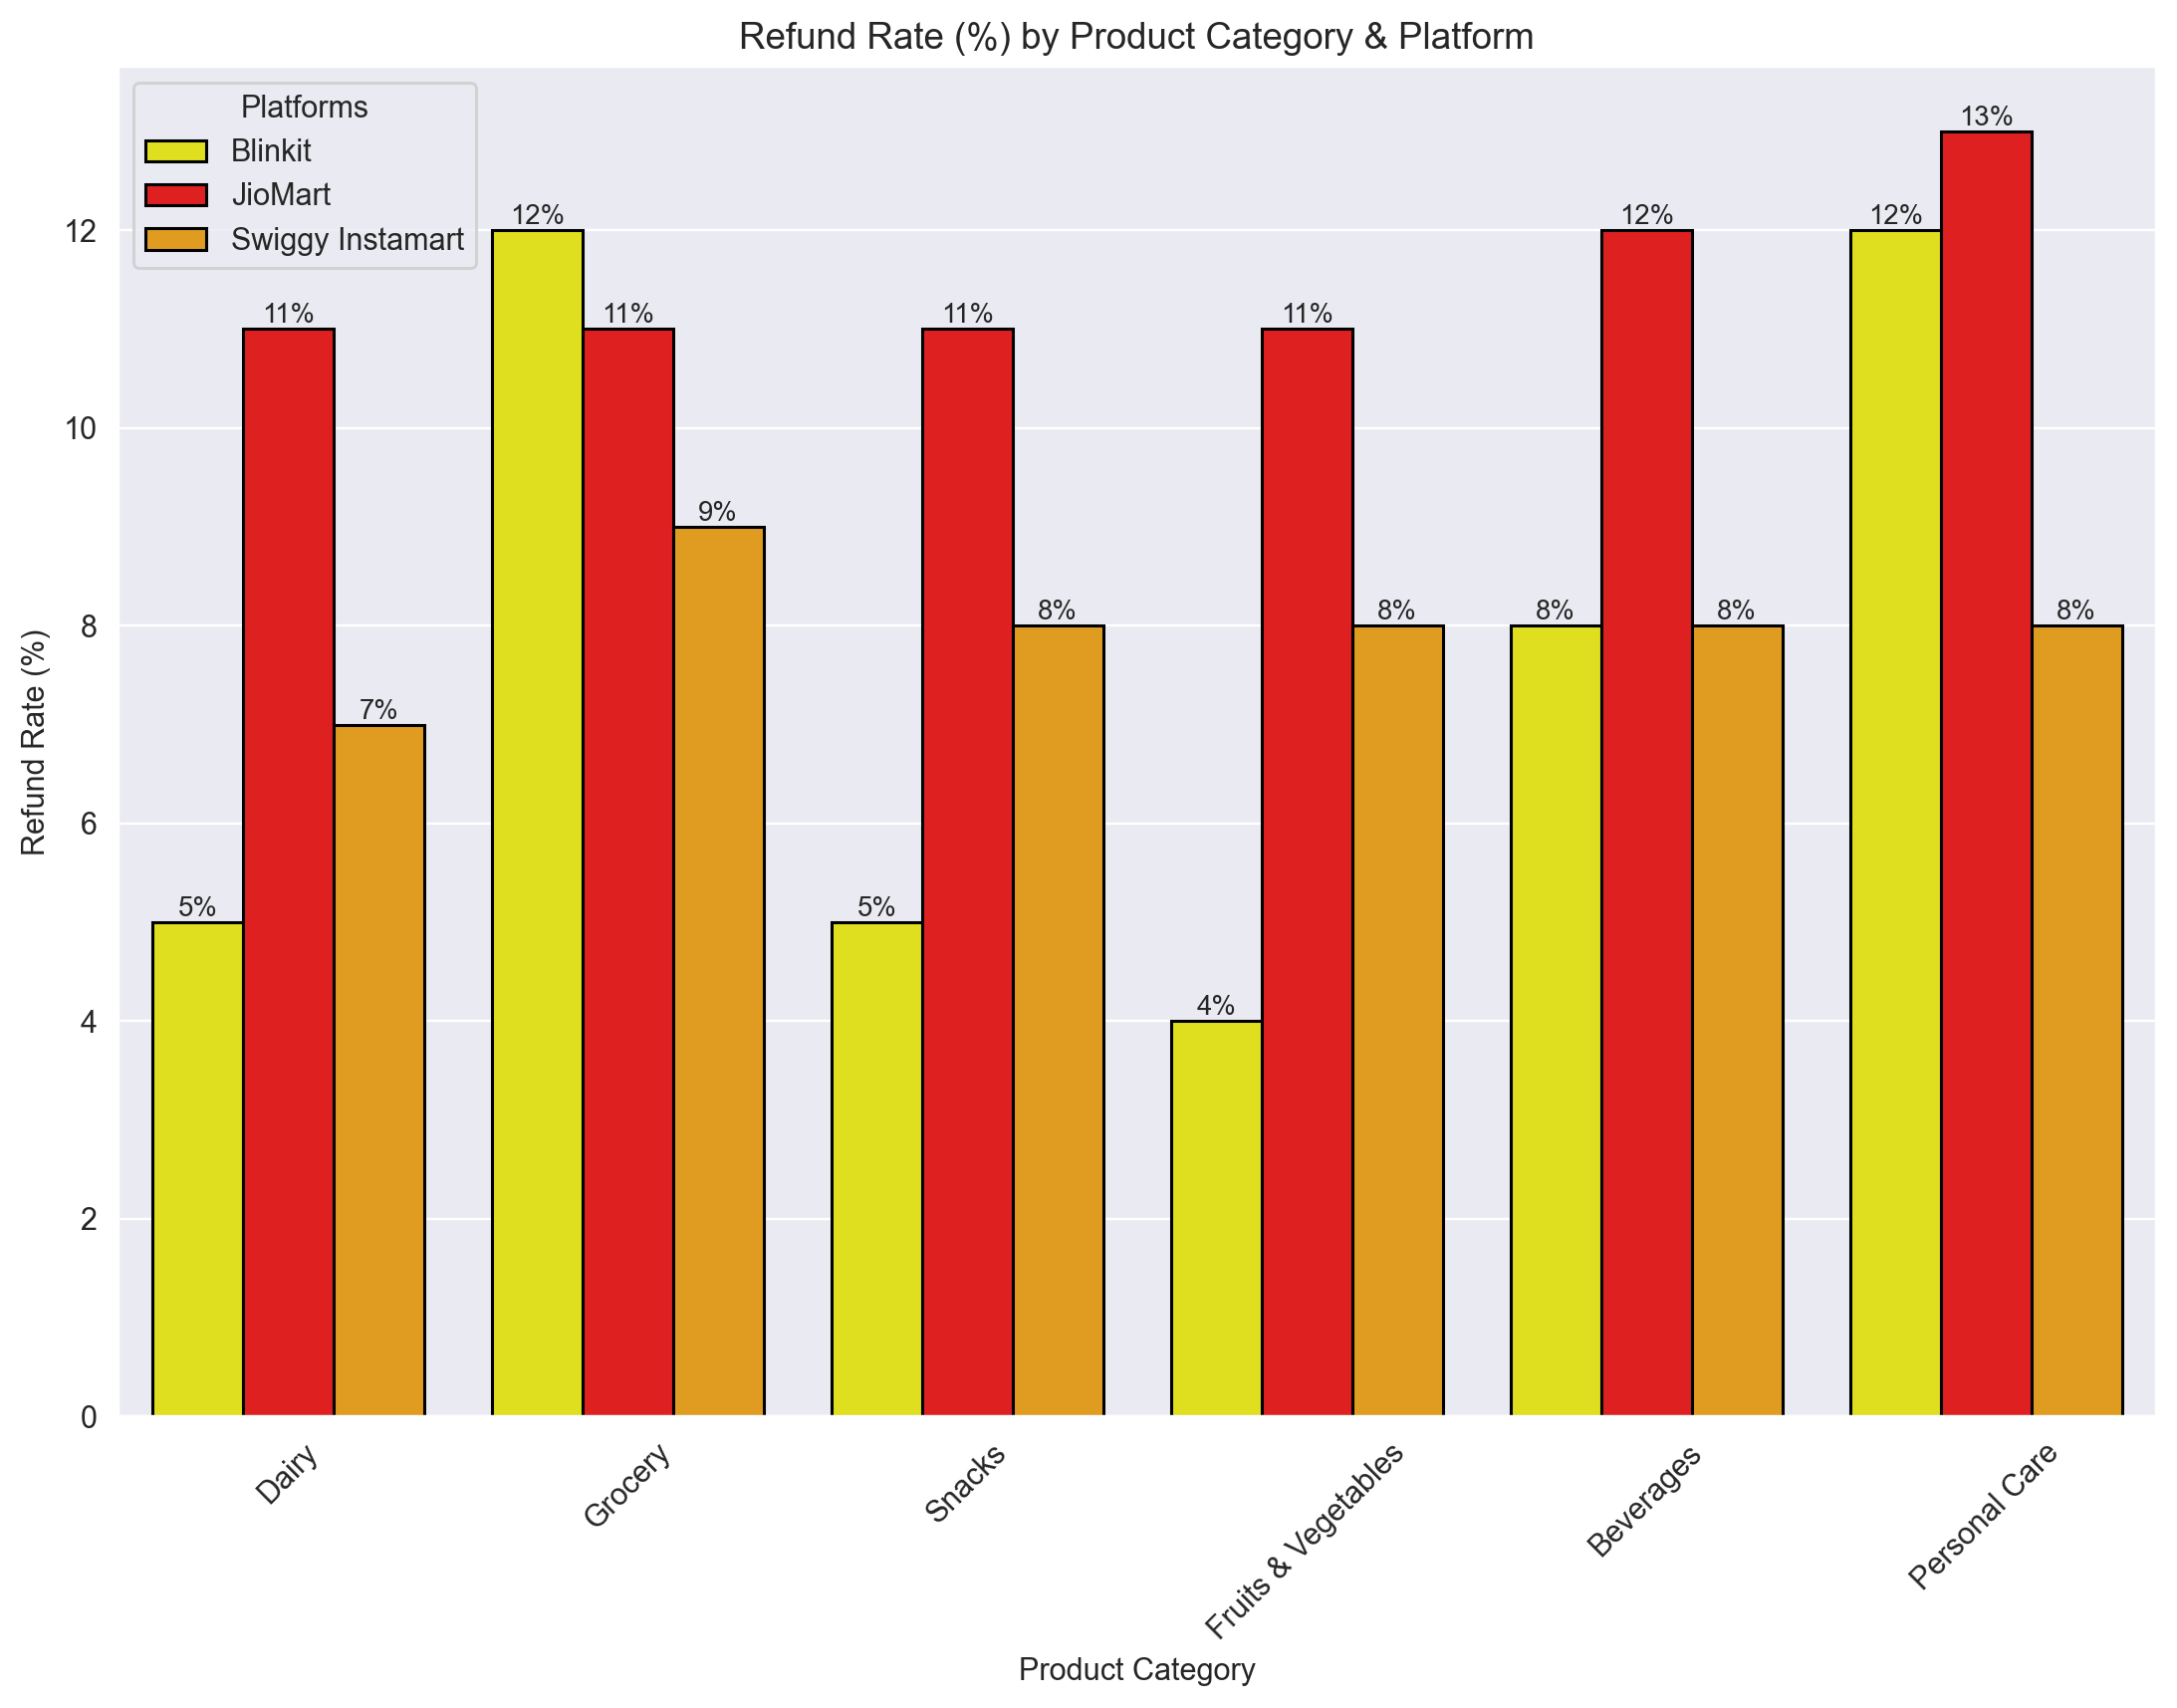

In [53]:
refunds = (
    df.groupby(['platform_name','product_category_id'])['refund_requested']
    .apply(lambda x: (x=='Yes').mean()*100)
    .reset_index(name='refund_rate').round()
)

colors= ['yellow','red','orange']

# Map product_category_id with names
product_category_mapping = {
    1:'Dairy', 2:'Grocery', 3:'Snacks', 
    4:'Fruits & Vegetables', 5:'Beverages', 6:'Personal Care'
}
refunds['product_category_id'] = refunds['product_category_id'].map(product_category_mapping)

plt.figure(figsize=(12,8),dpi=220)
sns.set_style('darkgrid')
ax = sns.barplot(
    data=refunds,
    x='product_category_id',
    y='refund_rate',
    hue='platform_name',
    palette=colors,
    edgecolor='black'
)

# Add % labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%", label_type="edge", fontsize=9)

plt.title("Refund Rate (%) by Product Category & Platform")
plt.ylabel("Refund Rate (%)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(title="Platforms")
plt.show()


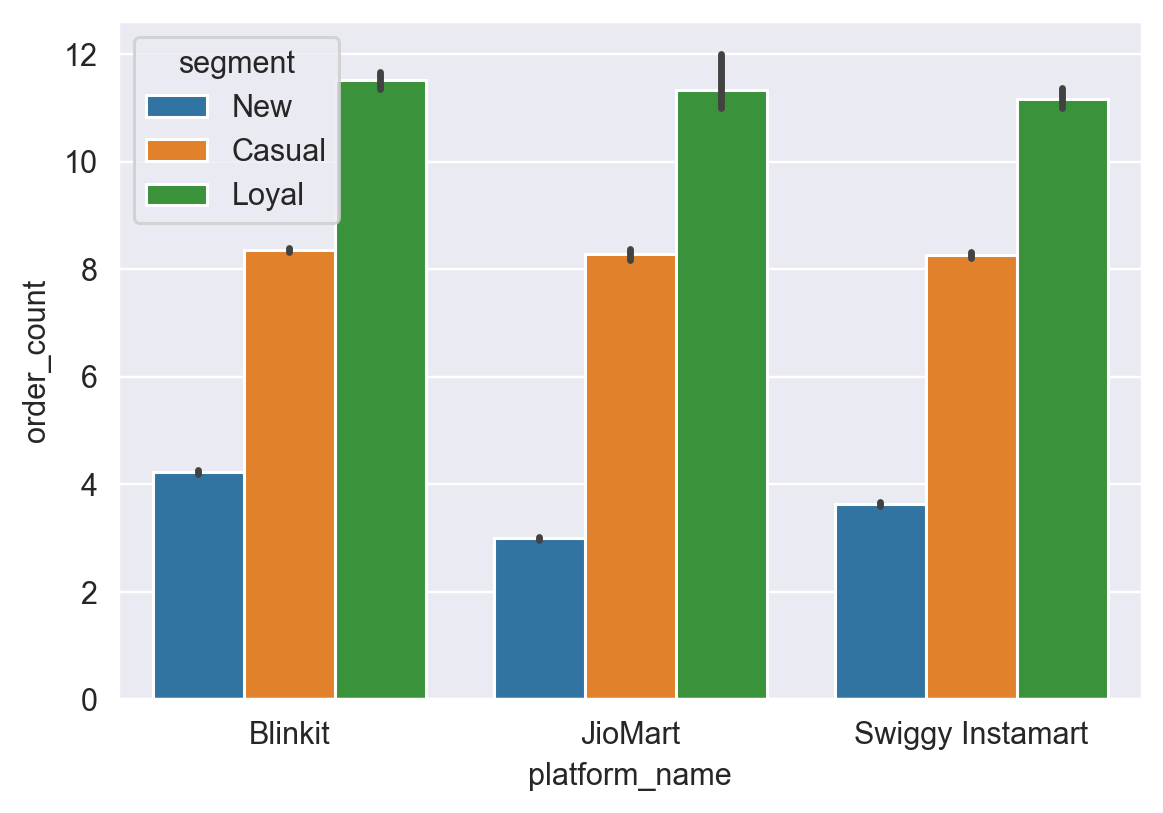

In [30]:
def segments(x):
    if x >= 11:
        return 'Loyal'
    elif 8 <= x <= 9:
        return 'Casual'
    else:
        return 'New'

cust_segment = (
    df.groupby(['customer_id','platform_name'])['order_id']
    .count()
    .reset_index(name='order_count')
)

cust_segment['segment'] = cust_segment['order_count'].apply(segments)

plt.figure(figsize=(6,4),dpi=220)
sns.set_style('darkgrid')

ax = sns.barplot(data=cust_segment, x='platform_name',y='order_count',hue='segment')
plt.show()


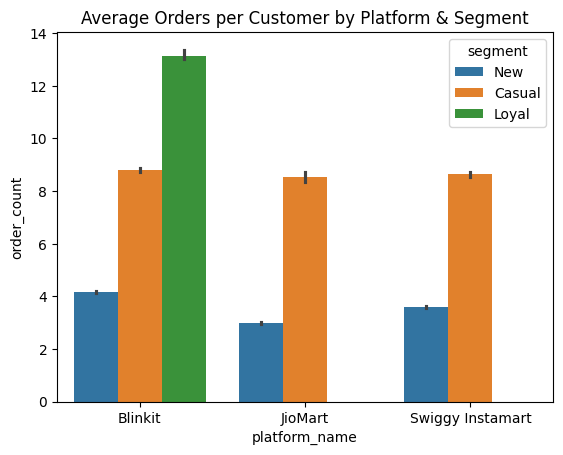

In [7]:
# Fix segment function
def segments(x):
    if x > 12:
        return 'Loyal'
    elif 8 <= x <= 12:
        return 'Casual'
    else:
        return 'New'

# Create customer segments
cust_segment = (
    df.groupby(['customer_id','platform_name'])['order_id']
    .count()
    .reset_index(name='order_count')
)
cust_segment['segment'] = cust_segment['order_count'].apply(segments)



ax = sns.barplot(data=cust_segment, x='platform_name', y='order_count', hue='segment', estimator='mean')
plt.title("Average Orders per Customer by Platform & Segment")
plt.show()


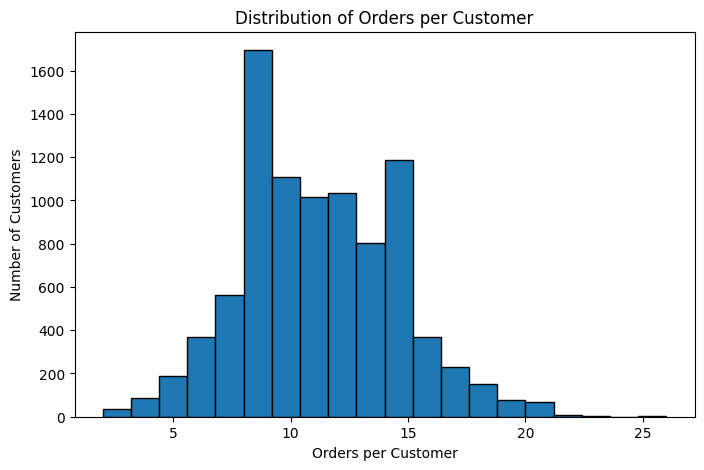

In [9]:


# Count orders per customer
orders_per_customer = df.groupby("customer_id")["order_id"].count()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(orders_per_customer, bins=20, edgecolor="black")
plt.xlabel("Orders per Customer")
plt.ylabel("Number of Customers")
plt.title("Distribution of Orders per Customer")
plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_3560\2580182389.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cust_orders, x="segment", y="AOV", ci=None, estimator="mean")


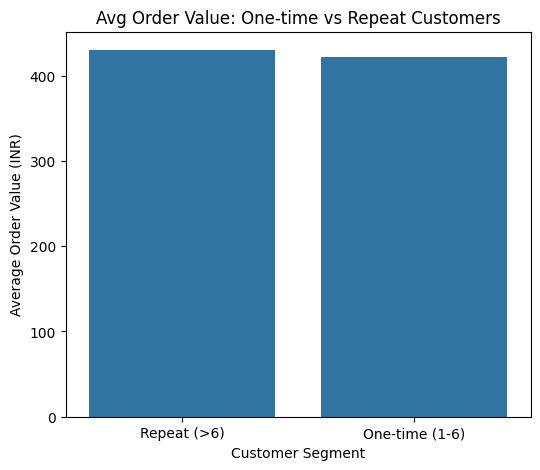

In [15]:


# Step 1: Order count per customer
cust_order_count = df.groupby("customer_id")["order_id"].nunique().reset_index()
cust_order_count.columns = ["customer_id", "order_count"]

# Step 2: Segment customers
cust_order_count["segment"] = cust_order_count["order_count"].apply(lambda x: "One-time (1-6)" if x <= 6 else "Repeat (>6)")

# Step 3: Merge with order values
cust_orders = df.merge(cust_order_count, on="customer_id")

# Step 4: Calculate AOV per order
cust_orders["AOV"] = cust_orders["order_value_inr"]

# Step 5: Plot
plt.figure(figsize=(6,5))
sns.barplot(data=cust_orders, x="segment", y="AOV", ci=None, estimator="mean")
plt.title("Avg Order Value: One-time vs Repeat Customers")
plt.ylabel("Average Order Value (INR)")
plt.xlabel("Customer Segment")
plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_3560\2972849070.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyalty, x='rating_bucket', y='repeat_orders', palette="viridis")


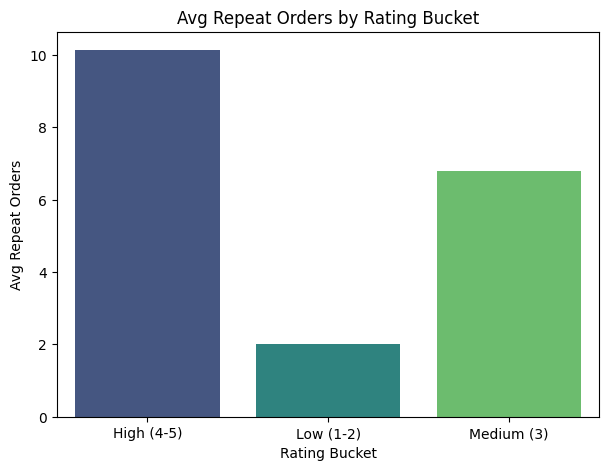

In [16]:


# --- Step 1: customer order counts ---
cust_orders = df.groupby('customer_id').agg(
    order_count=('order_id', 'count'),
    avg_rating=('service_rating', 'mean')
).reset_index()

# --- Step 2: bucket ratings ---
def bucket(r):
    if r <= 2: return "Low (1-2)"
    elif r == 3: return "Medium (3)"
    else: return "High (4-5)"

cust_orders['rating_bucket'] = cust_orders['avg_rating'].apply(bucket)

# --- Step 3: mark repeat orders ---
cust_orders['repeat_orders'] = cust_orders['order_count'].apply(lambda x: x-1 if x>1 else 0)

# --- Step 4: aggregate ---
loyalty = cust_orders.groupby('rating_bucket')['repeat_orders'].mean().reset_index()

# --- Step 5: plot ---
plt.figure(figsize=(7,5))
sns.barplot(data=loyalty, x='rating_bucket', y='repeat_orders', palette="viridis")
plt.title("Avg Repeat Orders by Rating Bucket")
plt.xlabel("Rating Bucket")
plt.ylabel("Avg Repeat Orders")
plt.show()


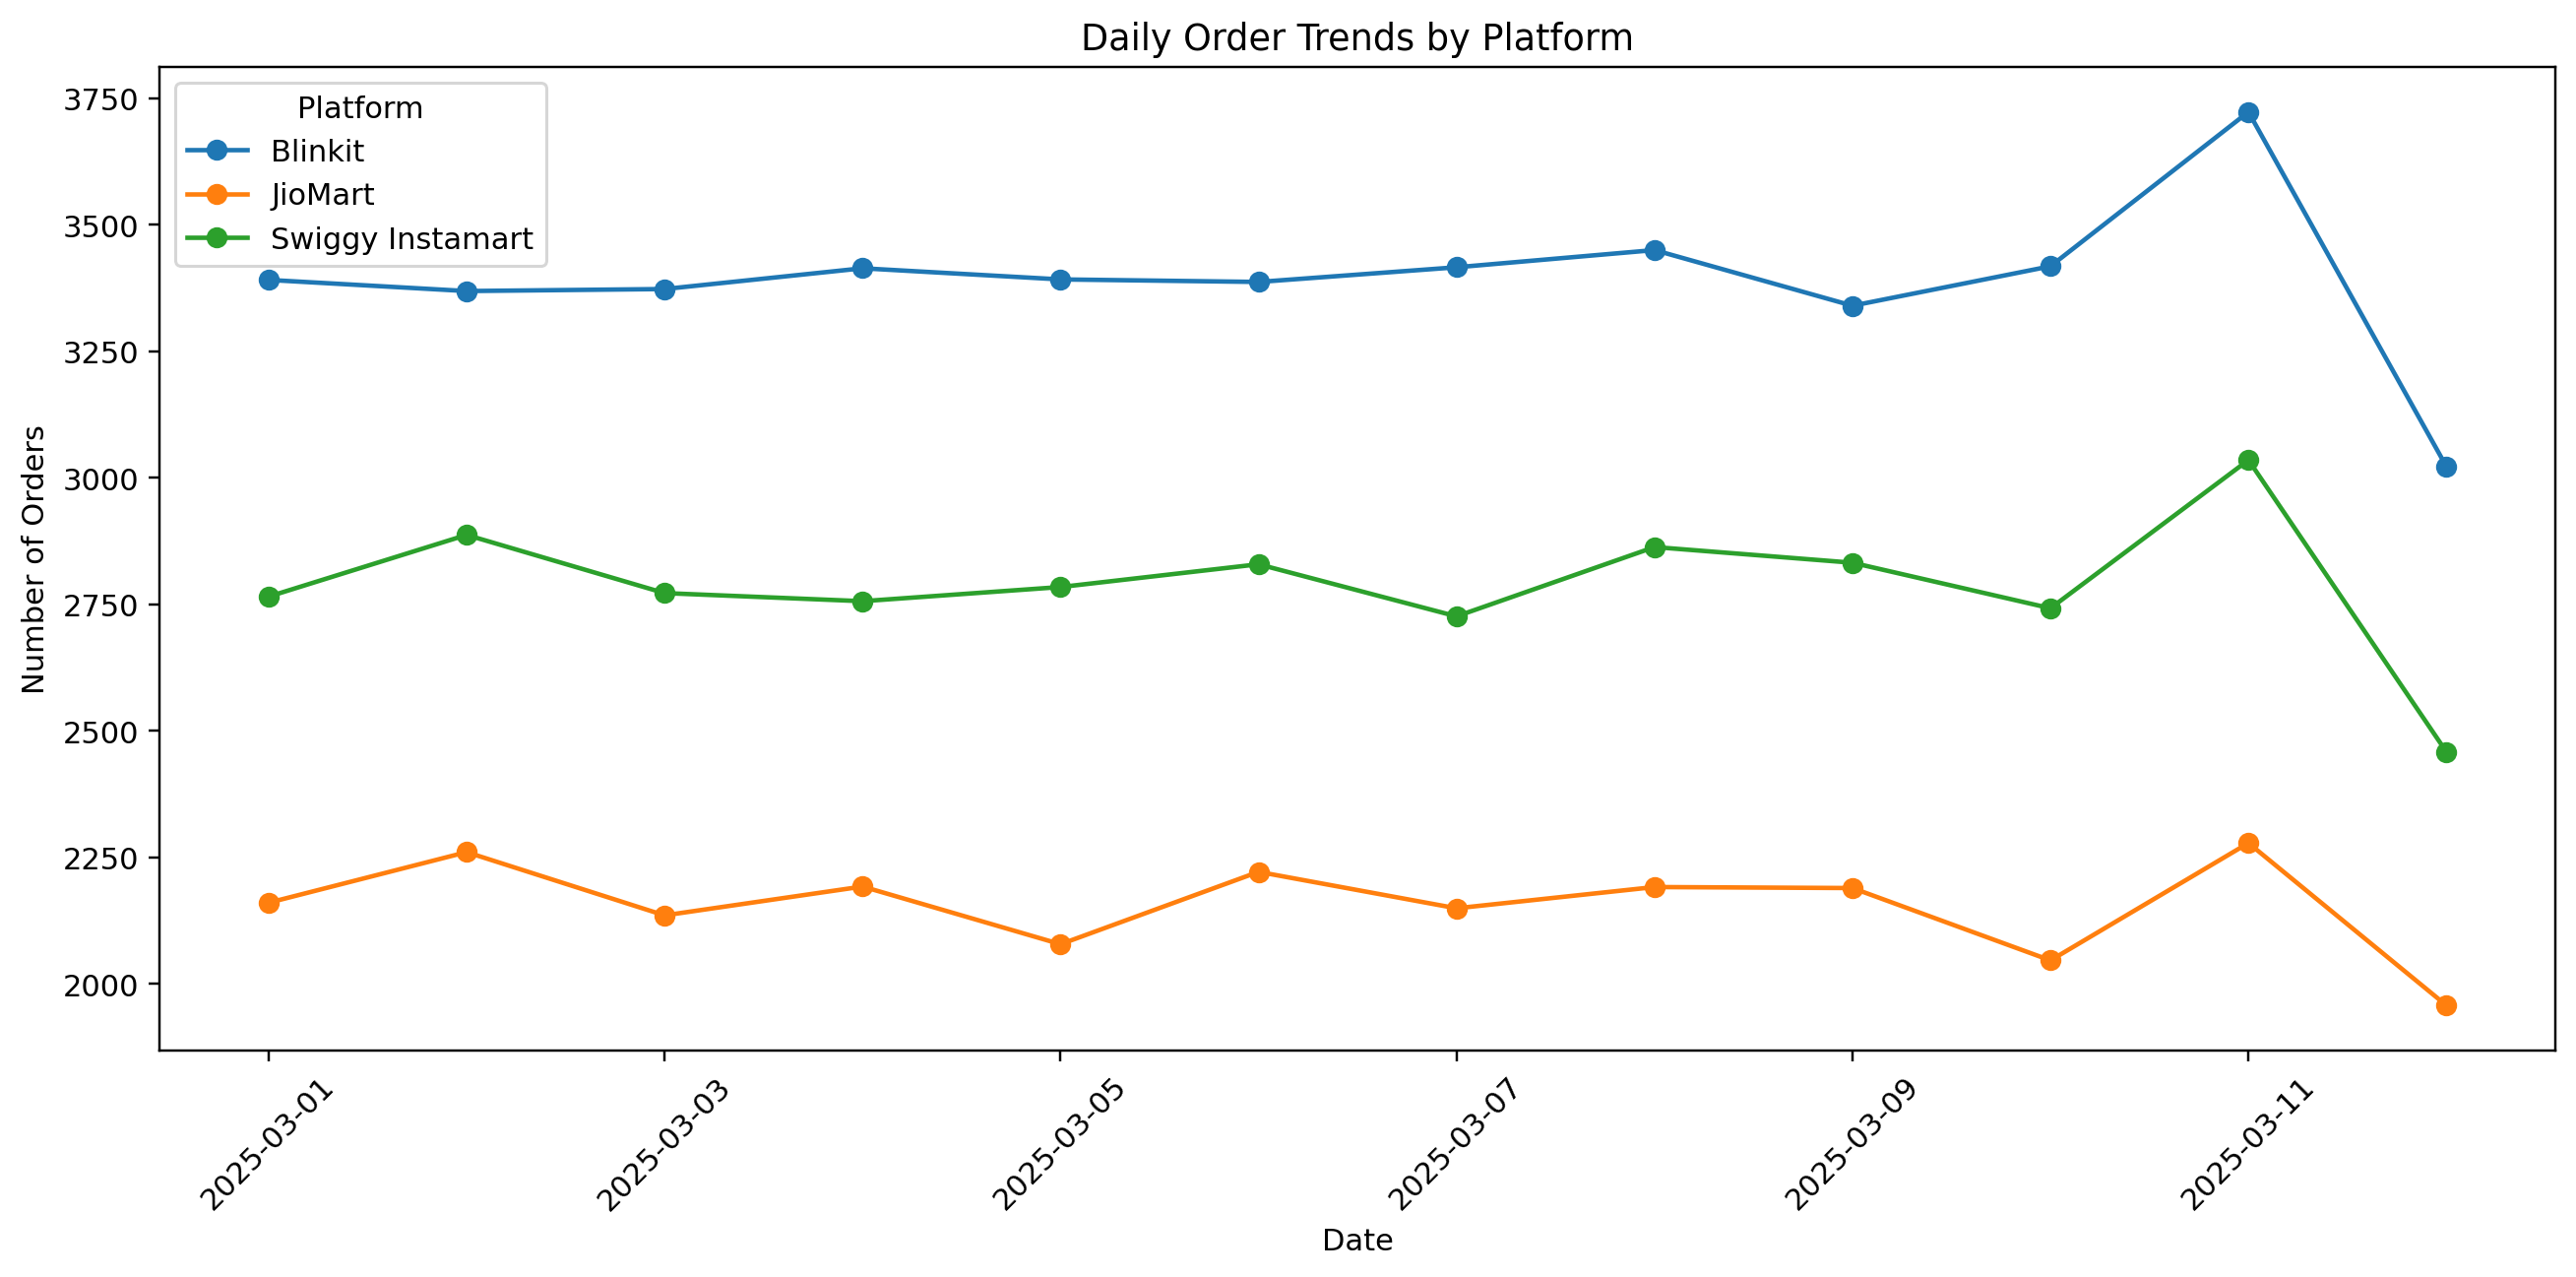

In [22]:


# Convert datetime column
df["order_datetime"] = pd.to_datetime(df["order_datetime"], format="%d-%m-%Y %H:%M")

# Extract only date
df["order_date"] = df["order_datetime"].dt.date

# Group by date and platform
daily_trend = df.groupby(["order_date", "platform_name"]).size().reset_index(name="orders")

# Pivot for plotting (each platform becomes a column)
trend_pivot = daily_trend.pivot(index="order_date", columns="platform_name", values="orders").fillna(0)

# Plot
plt.figure(figsize=(12,6),dpi=220)
for platform in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[platform], marker="o", label=platform)

plt.title("Daily Order Trends by Platform")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend(title="Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
a = df.groupby('platform_name')['customer_feedback'].value_counts()
a

platform_name     customer_feedback                         
Blinkit           Wrong item delivered.                         3192
                  Packaging could be better.                    3182
                  Excellent experience!                         3169
                  Good quality products.                        3155
                  Easy to order, loved it!                      3145
                  Delivery person was rude.                     3134
                  Quick and reliable!                           3127
                  Items missing from order.                     3125
                  Not fresh, disappointed.                      3119
                  Fast delivery, great service!                 3111
                  Very satisfied with the service.              3102
                  Very late delivery, not happy.                3068
                  Horrible experience, never ordering again.    3066
JioMart           Good quality products.  

In [32]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback'],
      dtype='object')

In [13]:
p90_per_platform = df.groupby('platform_name')['delivery_time_min'].apply(lambda x: np.percentile(x,90))

p95_per_platform = df.groupby('platform_name')['delivery_time_min'].apply(lambda x: np.percentile(x,95))
p50_per_platform = df.groupby('platform_name')['delivery_time_min'].apply(lambda x: np.percentile(x,50))


print("P50 Delivery time per platform is")
print(p50_per_platform)
print()
print("P90 Delivery time per platform is")
print(p90_per_platform)
print()
print("P95 Delivery time per platform is")
print(p95_per_platform)

P50 Delivery time per platform is
platform_name
Blinkit             13.0
JioMart             16.0
Swiggy Instamart    11.0
Name: delivery_time_min, dtype: float64

P90 Delivery time per platform is
platform_name
Blinkit             16.0
JioMart             27.0
Swiggy Instamart    16.0
Name: delivery_time_min, dtype: float64

P95 Delivery time per platform is
platform_name
Blinkit             19.0
JioMart             28.0
Swiggy Instamart    18.0
Name: delivery_time_min, dtype: float64


platform_name        
Blinkit           P90    16.0
                  P95    19.0
JioMart           P90    27.0
                  P95    28.0
Swiggy Instamart  P90    16.0
                  P95    18.0
Name: delivery_time_min, dtype: float64


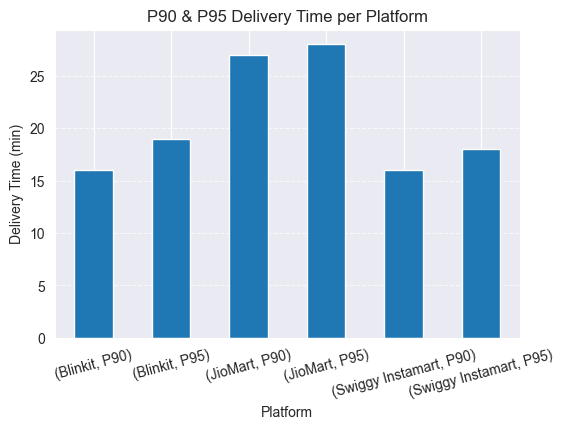

In [83]:
platform_percentiles = df.groupby('platform_name')['delivery_time_min'] \
                         .apply(lambda x: pd.Series({
                             'P90': np.percentile(x.dropna(), 90),
                             'P95': np.percentile(x.dropna(), 95)
                         }))

print(platform_percentiles)

platform_percentiles.plot(kind='bar',figsize=(6,4))
plt.title("P90 & P95 Delivery Time per Platform")
plt.ylabel("Delivery Time (min)")
plt.xlabel("Platform")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [93]:
fifteen_per_platform = 15

def is_delayed(row):
    return 1 if row['delivery_time_min'] > fifteen_per_platform else 0

df['sla_delay'] = df.apply(is_delayed, axis=1)

delay_rate = df.groupby('platform_name')['sla_delay'].mean().mul(100).round()

print("Delivery Delay rate per platform is")
print(delay_rate)


Delivery Delay rate per platform is
platform_name
Blinkit             13.0
JioMart             52.0
Swiggy Instamart    11.0
Name: sla_delay, dtype: float64


In [96]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [97]:

# --- 1️⃣ Prepare datetime features ---
# df['order_datetime'] = pd.to_datetime(df['order_datetime'], format='%Y-%m-%d %H:%M')
# df['hour'] = df['order_datetime'].dt.hour
# df['weekday'] = df['order_datetime'].dt.day_name()

# Reset index to avoid duplicate index issues
df = df.reset_index(drop=True)

# --- 2️⃣ Function to calculate metrics ---
def calculate_metrics(group):
    delivery_times = group['delivery_time_min'].dropna()
    p90 = np.percentile(delivery_times, 90)
    p95 = np.percentile(delivery_times, 95)
    
    # Vectorized delay flag based on P90 SLA
    sla_delay = group['delivery_time_min'] > p90
    
    return pd.Series({
        'P90': p90,
        'P95': p95,
        'Delay Rate %': sla_delay.mean() * 100,
        'On-Time Rate %': (~sla_delay).mean() * 100
    })

# --- 3️⃣ Metrics by Platform + Category ---
metrics_platform_category = df.groupby(
    ['platform_name', 'product_category_id']
).apply(calculate_metrics).reset_index()

# --- 4️⃣ Metrics by Hour ---
metrics_hour = df.groupby('hour').apply(calculate_metrics).reset_index()

# --- 5️⃣ Metrics by Weekday ---
metrics_weekday = df.groupby('weekday').apply(calculate_metrics).reset_index()

# --- 6️⃣ Display results ---
print("=== Metrics: Platform + Category ===")
print(metrics_platform_category)

print("\n=== Metrics: Hour ===")
print(metrics_hour)

print("\n=== Metrics: Weekday ===")
print(metrics_weekday)


=== Metrics: Platform + Category ===
       platform_name  product_category_id   P90   P95  Delay Rate %  \
0            Blinkit                    1  15.0  16.0      6.973114   
1            Blinkit                    2  17.0  19.0      9.773896   
2            Blinkit                    3  15.0  16.0      6.932440   
3            Blinkit                    4  15.0  16.0      6.371775   
4            Blinkit                    5  16.0  17.0      5.733272   
5            Blinkit                    6  18.0  19.0      9.949622   
6            JioMart                    1  27.0  28.0      7.102325   
7            JioMart                    2  27.0  28.0      7.062147   
8            JioMart                    3  26.0  28.0      9.931948   
9            JioMart                    4  27.0  28.0      6.543779   
10           JioMart                    5  27.0  28.0      6.618134   
11           JioMart                    6  27.0  28.0      7.294552   
12  Swiggy Instamart                    

C:\Users\danis\AppData\Local\Temp\ipykernel_17824\429657299.py:28: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\danis\AppData\Local\Temp\ipykernel_17824\429657299.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\danis\AppData\Local\Temp\ipykernel_17824\429657299.py:34: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a f

C:\Users\danis\AppData\Local\Temp\ipykernel_11492\2033050101.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['platform_name','product_category_id']).apply(mark_sla_delay).reset_index(drop=True)


  platform_name  product_category_id  hour    weekday  total_orders  \
0       Blinkit                    1     0     Friday           145   
1       Blinkit                    1     0     Monday           326   
2       Blinkit                    1     0   Saturday           315   
3       Blinkit                    1     0     Sunday           316   
4       Blinkit                    1     0   Thursday           139   
5       Blinkit                    1     0    Tuesday           320   
6       Blinkit                    1     0  Wednesday           350   
7       Blinkit                    1     1     Friday           156   
8       Blinkit                    1     1     Monday           318   
9       Blinkit                    1     1   Saturday           325   

   delay_rate_pct  on_time_rate_pct   p90    p95  
0        4.137931         95.862069  14.0  14.80  
1        5.214724         94.785276  14.0  15.75  
2        6.666667         93.333333  15.0  16.00  
3        7.911

In [33]:
df

,order_id,customer_id,platform_name,product_category_id,order_datetime,delivery_time_min,order_value_inr,delivery_delay,refund_requested,service_rating,customer_feedback,product_category_name,sla_delay,Segment,hour,weekday,date,order_hour
0,ORD077209,CUST7421,Swiggy Instamart,4,2025-05-05 12:55:36,12,371,No,0,4,Excellent experience!,Fruits & Vegetables,0,Price-only,12,Monday,2025-05-05,12
1,ORD070229,CUST8035,Swiggy Instamart,2,2025-05-17 04:31:53,10,323,No,0,5,Excellent experience!,Grocery,0,Loyalist,4,Saturday,2025-05-17,4
2,ORD091460,CUST7160,Swiggy Instamart,4,2025-05-17 06:44:25,10,480,No,0,5,Excellent experience!,Fruits & Vegetables,0,Price-only,6,Saturday,2025-05-17,6
3,ORD043109,CUST7940,Swiggy Instamart,6,2025-05-10 07:33:27,9,99,No,0,4,Delivery person was rude.,Personal Care,0,Loyalist,7,Saturday,2025-05-10,7
4,ORD000853,CUST8560,Swiggy Instamart,4,2025-05-17 22:30:52,13,313,No,0,5,"Fast delivery, great service!",Fruits & Vegetables,0,Loyalist,22,Saturday,2025-05-17,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD014849,CUST7658,Blinkit,3,2025-05-06 07:46:44,9,417,No,0,5,Wrong item delivered.,Snacks,0,Price-only,7,Tuesday,2025-05-06,7
99996,ORD087299,CUST4219,Blinkit,2,2025-05-05 20:33:36,9,304,No,0,5,Packaging could be better.,Grocery,0,Price-only,20,Monday,2025-05-05,20
99997,ORD097069,CUST8610,Blinkit,1,2025-05-12 20:33:06,9,80,No,0,5,"Horrible experience, never ordering again.",Dairy,0,Promisable,20,Monday,2025-05-12,20
99998,ORD040218,CUST1554,Blinkit,5,2025-05-08 17:02:16,8,215,No,0,5,Packaging could be better.,Beverages,0,Price-only,17,Thursday,2025-05-08,17


In [40]:
import pandas as pd
import statsmodels.api as sm

# 1. Prepare data
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format='%d-%m-%Y %H:%M')
df['hour'] = df['order_datetime'].dt.hour
df['weekday'] = df['order_datetime'].dt.day_name()

# 2. Select features and target
features = ['delivery_time_min', 'order_value_inr', 'product_category_id', 'hour']
target = 'service_rating'

# 3. Create dummy variables for categorical features
X = pd.get_dummies(df[features], drop_first=True)  
y = df[target]

# 4. Add constant (intercept) to regression
X = sm.add_constant(X)

# 5. Build OLS model
model = sm.OLS(y, X).fit()

# 6. Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     7210.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:45:54   Log-Likelihood:            -1.4736e+05
No. Observations:              100000   AIC:                         2.947e+05
Df Residuals:                   99995   BIC:                         2.948e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4233    

       const  delivery_time_min  order_value_inr  product_category_id  hour  \
0        1.0               65.0            534.0                  1.0   2.0   
1        1.0               65.0            591.0                  1.0   0.0   
2        1.0               64.0            444.0                  1.0   2.0   
3        1.0               54.0            707.0                  1.0   0.0   
4        1.0               54.0            528.0                  1.0   0.0   
...      ...                ...              ...                  ...   ...   
99995    1.0                5.0            924.0                  6.0   1.0   
99996    1.0                5.0            103.0                  6.0   0.0   
99997    1.0                5.0            145.0                  6.0   0.0   
99998    1.0                5.0            343.0                  6.0   2.0   
99999    1.0                6.0             55.0                  6.0   0.0   

       platform_name_JioMart  platform_name_Swiggy 

In [41]:
# Create dummy variables for categorical features
X = pd.get_dummies(df[features], drop_first=True)

# Convert all columns to numeric (float)
X = X.astype(float)

# Target should also be numeric
y = df[target].astype(float)

# Add constant for intercept
X = sm.add_constant(X)

# Build OLS model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     7210.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:48:10   Log-Likelihood:            -1.4736e+05
No. Observations:              100000   AIC:                         2.947e+05
Df Residuals:                   99995   BIC:                         2.948e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4233    

Customer Segmentation (%):
Segment
Price-only    74.722222
Loyalist      19.877778
At-Risk        3.333333
Promisable     2.066667
Name: proportion, dtype: float64


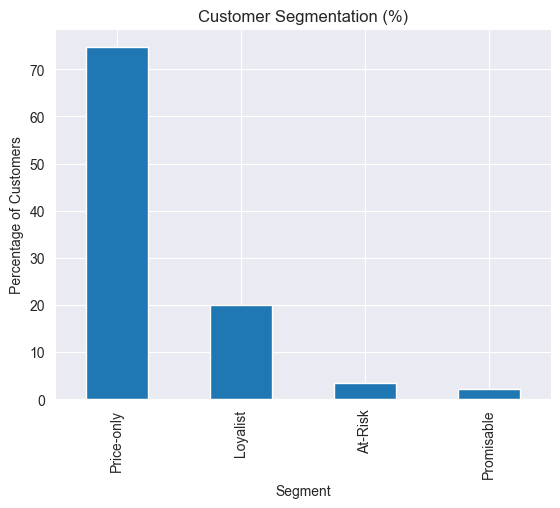

In [15]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

ref_date = df['order_datetime'].max()

rfm = df.groupby('customer_id').agg({
    'order_datetime':lambda x: (ref_date - x.max()).days,
    'order_id':'count',
    'order_value_inr':'sum'
}).reset_index()


rfm.rename(columns={
    'order_datetime':'Recency',
    'order_id':'Frequency',
    'order_value_inr':'Monetary'
}, inplace=True)


csat = df.groupby('customer_id')['service_rating'].mean().reset_index()
csat.rename(columns={'service_rating': 'CSAT'}, inplace=True)

df['refund_requested'] = df['refund_requested'].map({'Yes': 1, 'No': 0})

refund = df.groupby('customer_id')['refund_requested'].mean().reset_index()
refund.rename(columns={'refund_requested': 'RefundRate'}, inplace=True)

rfm = rfm.merge(csat, on='customer_id', how='left')
rfm = rfm.merge(refund, on='customer_id', how='left')

def segment_customer(row):
    if row['Frequency'] > 5 and row['Monetary'] > 5000 and row['CSAT'] >= 4 and row['RefundRate'] < 0.2:
        return 'Loyalist'
    elif row['CSAT'] >= 4 and row['Frequency'] <= 5:
        return 'Promisable'
    elif row['CSAT'] < 3 or row['RefundRate'] >= 0.3:
        return 'At-Risk'
    else:
        return 'Price-only'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Segment counts
seg_counts = rfm['Segment'].value_counts(normalize=True) * 100

print("Customer Segmentation (%):")
print(seg_counts)



seg_counts.plot(kind='bar', title="Customer Segmentation (%)")
plt.ylabel("Percentage of Customers")
plt.show()



In [16]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay'],
      dtype='object')

In [17]:
# 1. Merge only customer_id + Segment into df
merged = df.merge(rfm[['customer_id', 'Segment']], on='customer_id', how='left')

# 2. Count per platform & segment
counts = merged.groupby(['platform_name', 'Segment']).size().reset_index(name='count')

# 3. Normalize counts to get proportions per platform
counts['proportion'] = counts.groupby('platform_name')['count'].transform(lambda x: 100 * x / x.sum()).round()

print(counts)


       platform_name     Segment  count  proportion
0            Blinkit     At-Risk   1022         3.0
1            Blinkit    Loyalist  10055        25.0
2            Blinkit  Price-only  29258        72.0
3            Blinkit  Promisable    360         1.0
4            JioMart     At-Risk    807         3.0
5            JioMart    Loyalist   5599        22.0
6            JioMart  Price-only  19283        75.0
7            JioMart  Promisable    167         1.0
8   Swiggy Instamart     At-Risk    852         3.0
9   Swiggy Instamart    Loyalist   8416        25.0
10  Swiggy Instamart  Price-only  23882        71.0
11  Swiggy Instamart  Promisable    299         1.0


In [100]:
peak_hours = merged.groupby(['platform_name', 'hour'])['order_id'].count().reset_index()
peak_hours = peak_hours.loc[peak_hours.groupby('platform_name')['order_id'].idxmax()]

peak_hours

TypeError: unhashable type: 'Series'

In [18]:
merged['hour'].value_counts()

KeyError: 'hour'

In [20]:
def random_datetime():
    start_date = datetime(2025,3,1)
    end_date = datetime(2025,3,12)

    random_days = random.randint(0,(end_date-start_date).days)
    date = start_date + timedelta(days=random_days)

    while True:
        hour = random.randint(0,23)   # pick from 0–23
        minute = random.randint(0,59)

        if not (3 < hour < 5):   # exclude 3–4 AM
            break
    
    return datetime.combine(date,time(hour,minute))

merged['order_datetime'] = [random_datetime() for _ in range(len(df))]


In [21]:
merged['order_datetime'] = pd.to_datetime(merged['order_datetime'], format='%d-%m-%Y %H:%M')
merged['hour'] = merged['order_datetime'].dt.hour
merged['weekday'] = merged['order_datetime'].dt.day_name()

In [22]:
merged['hour'].value_counts()

hour
17    4437
11    4429
19    4425
7     4414
1     4407
20    4406
8     4401
5     4376
13    4373
15    4373
12    4369
22    4364
23    4342
10    4335
9     4328
3     4318
2     4302
16    4289
18    4283
14    4278
6     4270
0     4263
21    4218
Name: count, dtype: int64

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               100000 non-null  object        
 1   customer_id            100000 non-null  object        
 2   platform_name          100000 non-null  object        
 3   product_category_id    100000 non-null  int64         
 4   order_datetime         100000 non-null  datetime64[ns]
 5   delivery_time_min      100000 non-null  int64         
 6   order_value_inr        100000 non-null  int64         
 7   delivery_delay         100000 non-null  object        
 8   refund_requested       100000 non-null  int64         
 9   service_rating         100000 non-null  int64         
 10  customer_feedback      100000 non-null  object        
 11  product_category_name  100000 non-null  object        
 12  sla_delay              100000 non-null  objec

In [25]:
merged.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday'],
      dtype='object')

In [26]:
merged.to_csv(r"../dataset/final_new_cleaned_orders.csv", index=False)

In [28]:
df = merged.copy()


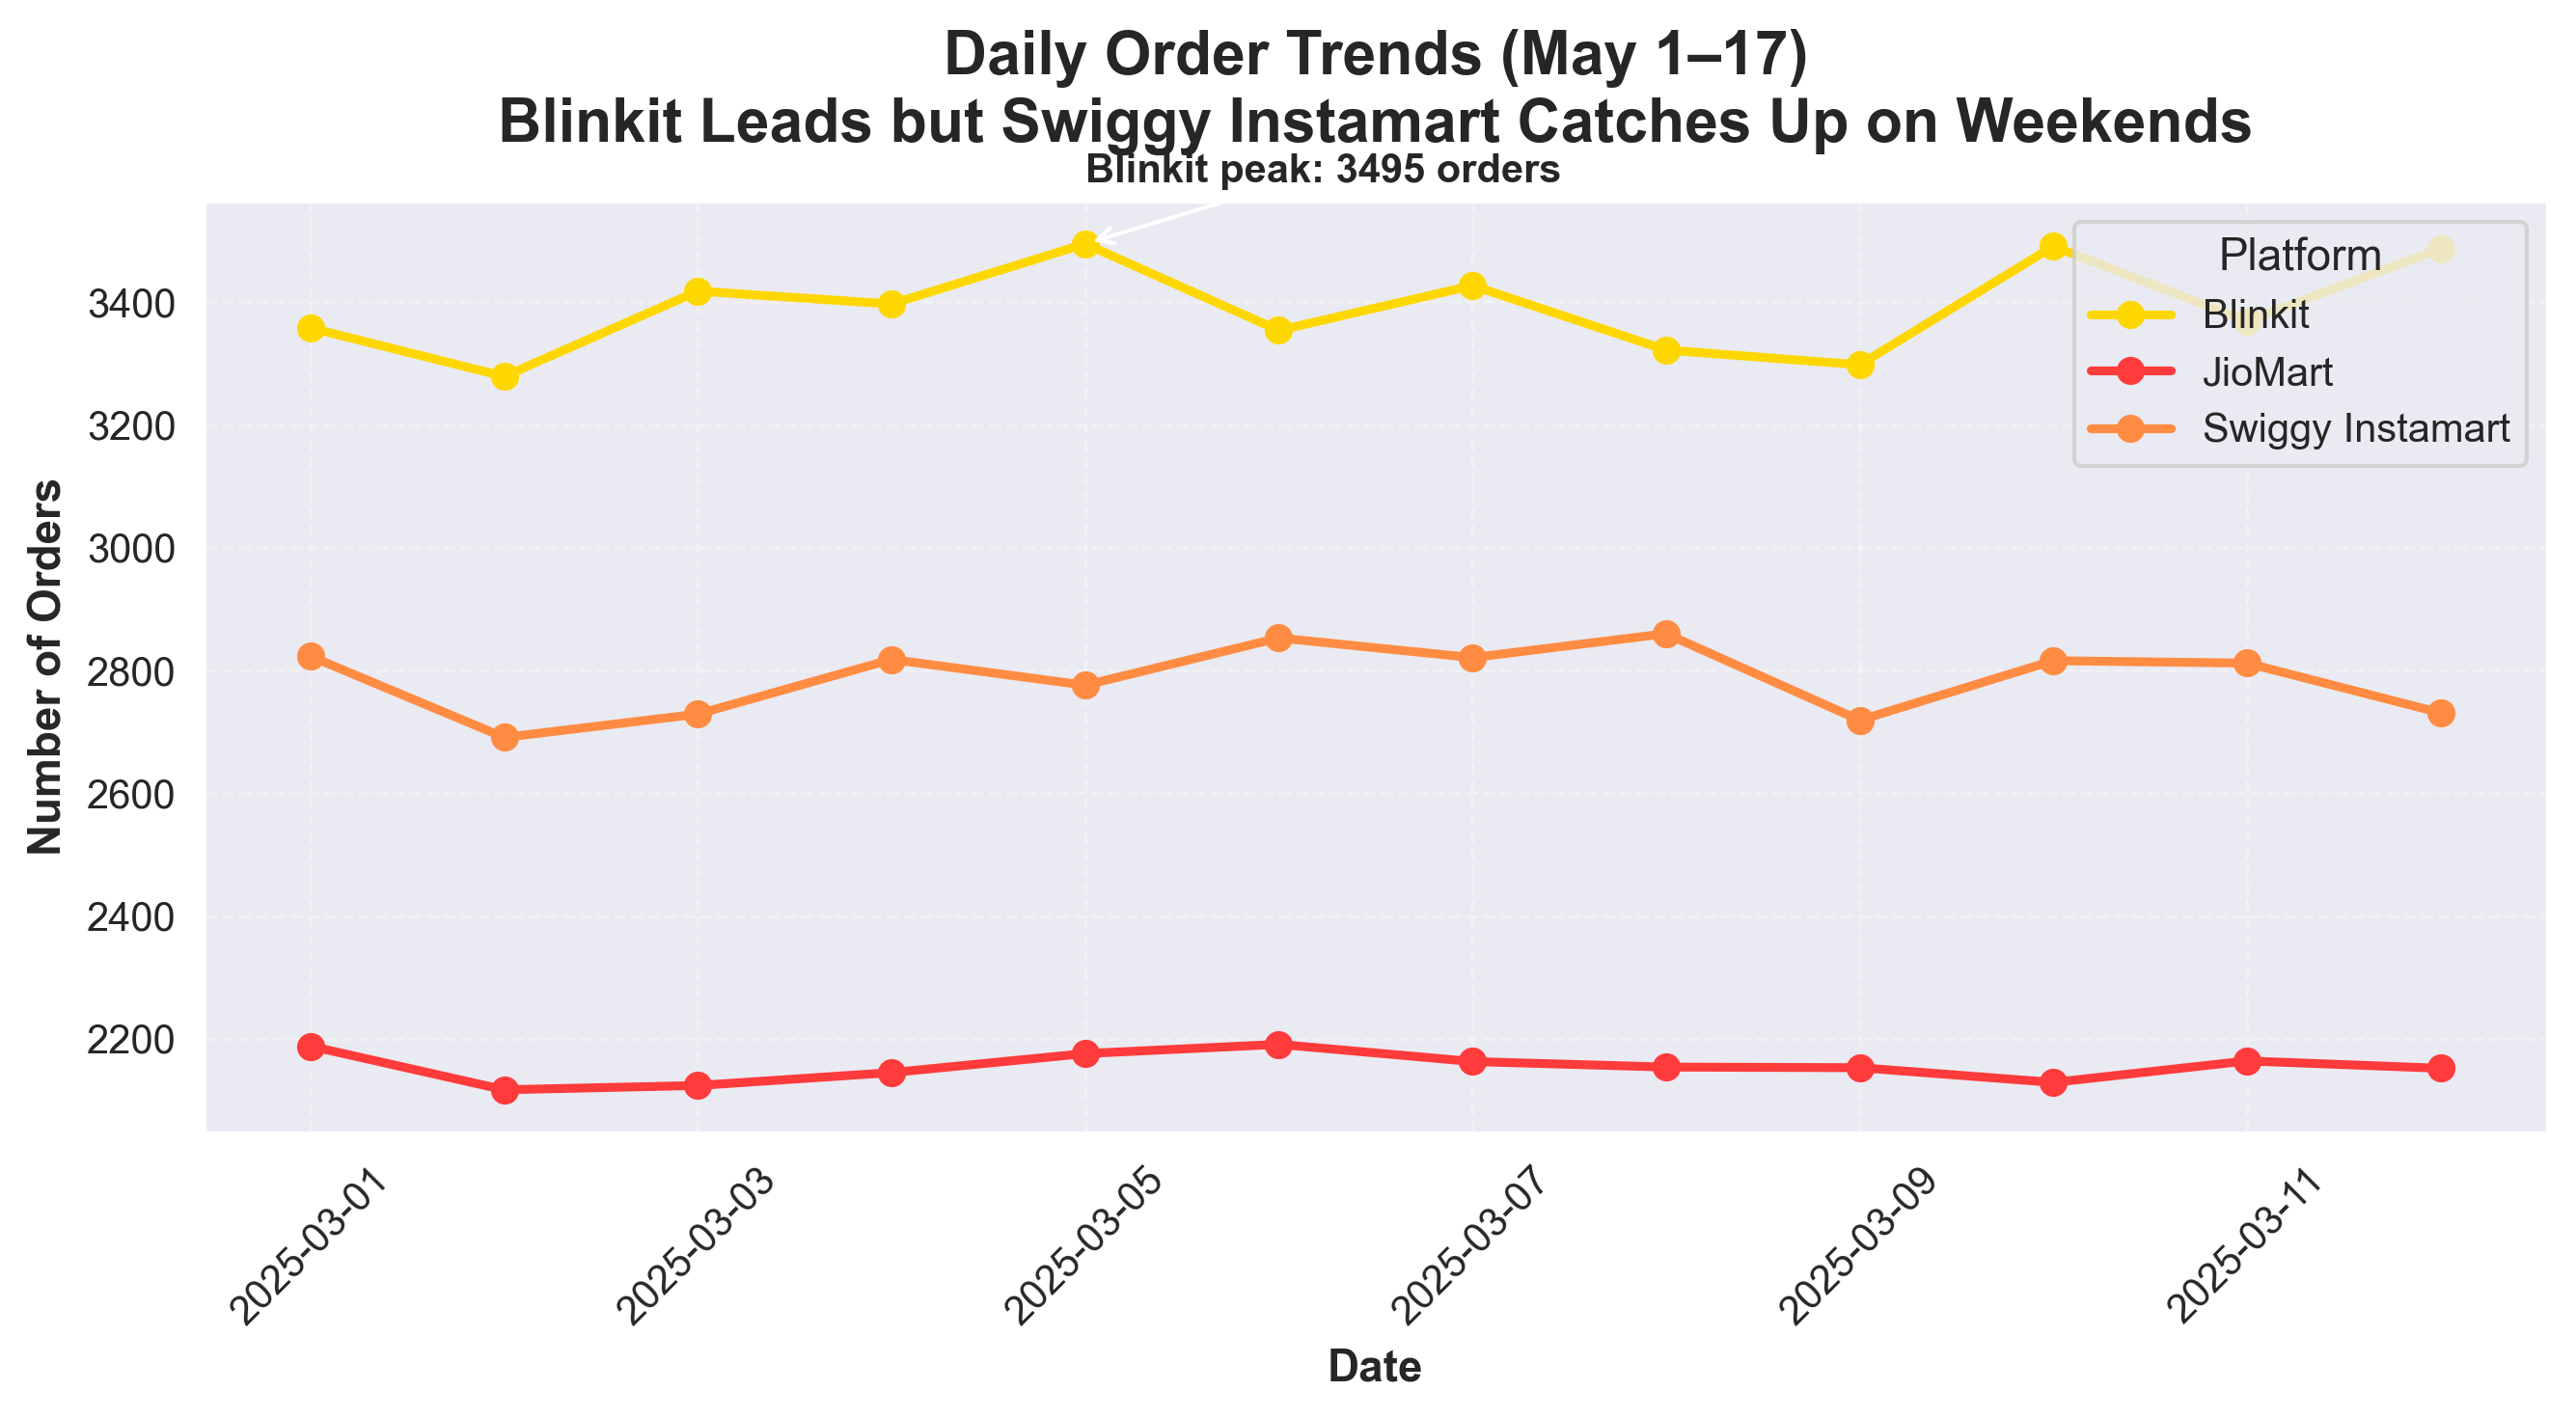

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime is parsed
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Extract just the date
df['date'] = df['order_datetime'].dt.date

# Aggregate: daily orders per platform
daily_orders = df.groupby(['date','platform_name']).size().reset_index(name='orders')

# Pivot for line plot
pivot_orders = daily_orders.pivot(index='date', columns='platform_name', values='orders').fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(9,5), dpi=300)

colors = {"Blinkit":"#FFD700", "Swiggy Instamart":"#FF8C42", "JioMart":"#FF3B3B"}

for platform in pivot_orders.columns:
    ax.plot(pivot_orders.index, pivot_orders[platform], marker='o', linewidth=2.2, 
            label=platform, color=colors[platform])

# Title and labels
ax.set_title("Daily Order Trends (May 1–17)\nBlinkit Leads but Swiggy Instamart Catches Up on Weekends", 
             fontsize=15, weight='bold', pad=15)
ax.set_xlabel("Date", fontsize=11, weight='bold')
ax.set_ylabel("Number of Orders", fontsize=11, weight='bold')

# Grid for clarity
ax.grid(alpha=0.3, linestyle='--')

# Rotate x-axis for readability
plt.xticks(rotation=45)

# Add legend with style
ax.legend(title="Platform", fontsize=10, title_fontsize=11, frameon=True, fancybox=True)

# Add annotation for story
max_date = pivot_orders['Blinkit'].idxmax()
max_val = pivot_orders['Blinkit'].max()
ax.annotate(f"Blinkit peak: {max_val} orders",
            xy=(max_date, max_val), 
            xytext=(max_date, max_val+100),
            arrowprops=dict(facecolor='#FFD700', arrowstyle="->"),
            fontsize=10, weight="bold")

# Tight layout
plt.tight_layout()
plt.savefig("daily_orders_trend.png", dpi=400, bbox_inches="tight")
plt.show()


In [30]:
df['order_datetime'].max()

Timestamp('2025-03-12 23:59:00')

In [56]:


# Function to generate random datetime
def random_datetime():
    # Random date between 1 May and 17 May 2025
    start = datetime(2025, 5, 1)
    end = datetime(2025, 5, 17)
    random_date = start + timedelta(days=random.randint(0, (end-start).days))

    # Random time excluding 2-4 AM
    while True:
        hour = random.randint(0, 23)
        if hour not in [2, 3]:  # skip 2am–3:59am
            break
    minute = random.randint(0, 59)
    second = random.randint(0, 59)

    return datetime(random_date.year, random_date.month, random_date.day, hour, minute, second)

# Update order_datetime column
df["order_datetime"] = [random_datetime() for _ in range(len(df))]

# Save updated file


print("✅ order_datetime column updated successfully!")


✅ order_datetime column updated successfully!


In [33]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date'],
      dtype='object')

In [59]:
df.to_csv(r"../dataset/final_new_cleaned_orders.csv", index=False)

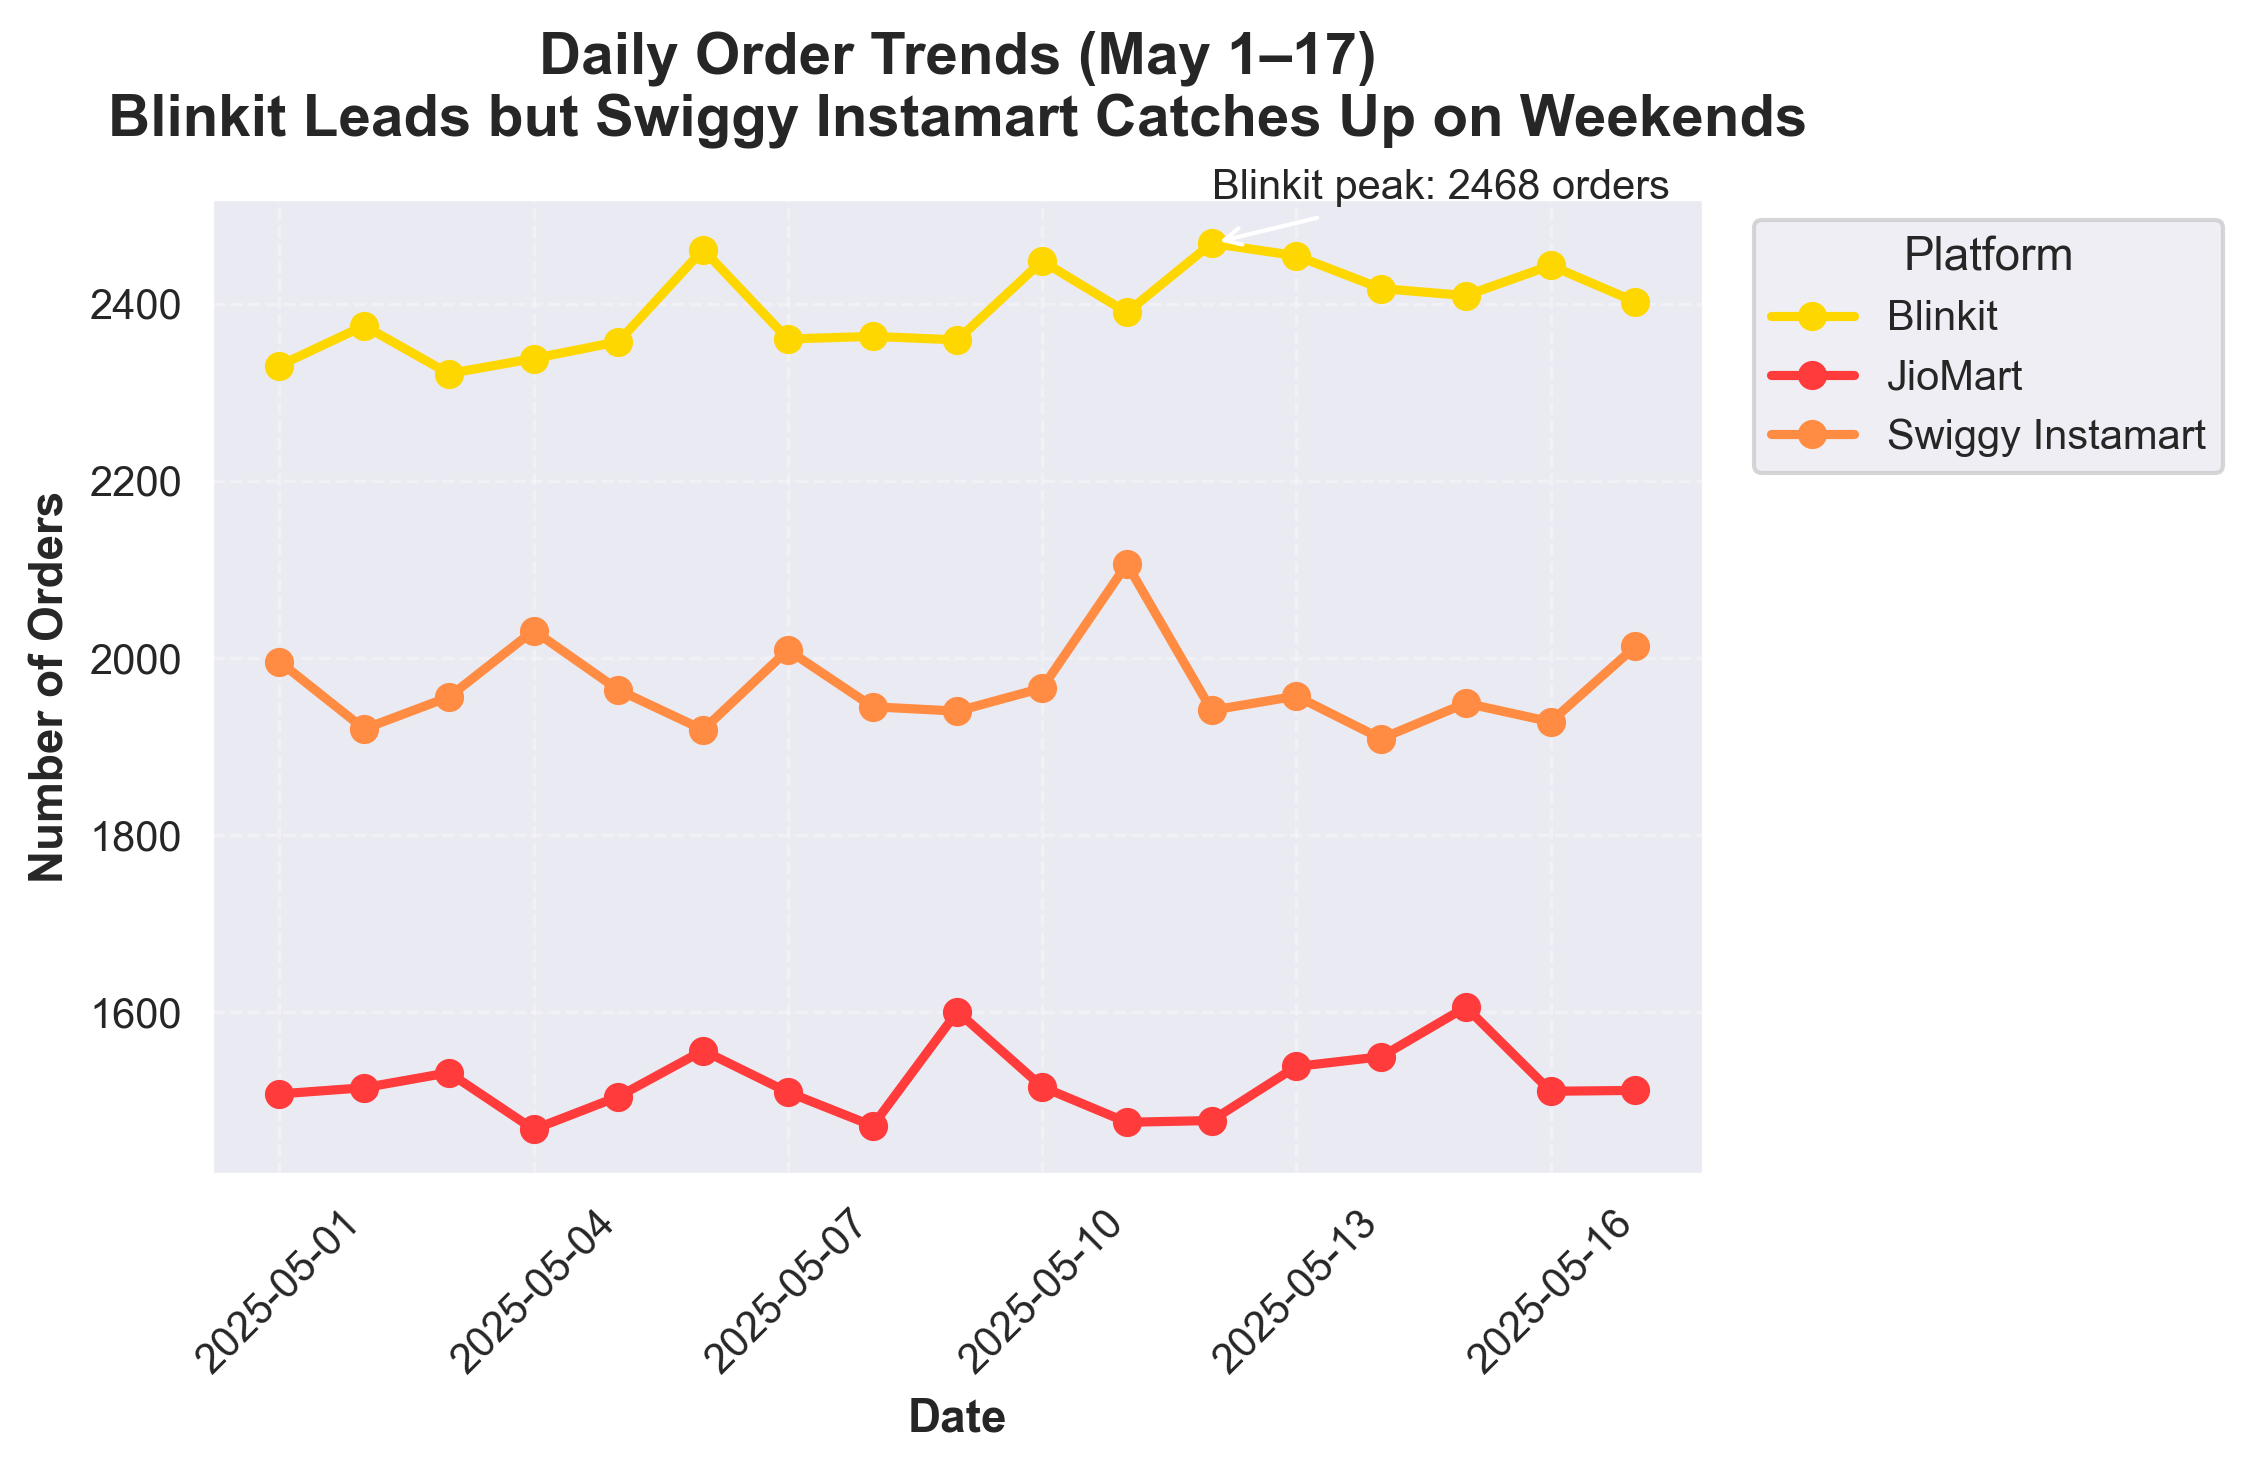

In [94]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# Ensure datetime is parsed
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Extract just the date
df['date'] = df['order_datetime'].dt.date

# Aggregate: daily orders per platform
daily_orders = df.groupby(['date','platform_name']).size().reset_index(name='orders')

# Pivot for line plot
pivot_orders = daily_orders.pivot(index='date', columns='platform_name', values='orders').fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(9,5), dpi=300)  # wider plot
sns.set_style('darkgrid')

colors = {"Blinkit":"#FFD700", "Swiggy Instamart":"#FF8C42", "JioMart":"#FF3B3B"}

for platform in pivot_orders.columns:
    ax.plot(pivot_orders.index, pivot_orders[platform], marker='o', linewidth=2.2, 
            label=platform, color=colors[platform])

# Title and labels
ax.set_title("Daily Order Trends (May 1–17)\nBlinkit Leads but Swiggy Instamart Catches Up on Weekends", 
             fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Date", fontsize=11, weight='bold')
ax.set_ylabel("Number of Orders", fontsize=11, weight='bold')

# Grid for clarity
ax.grid(alpha=0.3, linestyle='--')

# Rotate x-axis for readability & reduce ticks
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # show ~6 ticks instead of all 17

# Add legend outside
ax.legend(title="Platform", fontsize=10, title_fontsize=11, 
          frameon=True, fancybox=True, bbox_to_anchor=(1.02, 1), loc='upper left')

# Add annotation for story
max_date = pivot_orders['Blinkit'].idxmax()
max_val = pivot_orders['Blinkit'].max()
ax.annotate(f"Blinkit peak: {max_val} orders",
            xy=(max_date, max_val), 
            xytext=(max_date, max_val+50),   # more padding above
            arrowprops=dict(facecolor="#000000", arrowstyle="->"),
            fontsize=10)

# Adjust layout to avoid clipping
plt.tight_layout(rect=[0,0,0.85,1])  # leave space on right for legend

plt.show()


In [119]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go

# Offline mode for interactive plots
cf.go_offline()

# Ensure datetime is parsed
df['order_datetime'] = pd.to_datetime(df['order_datetime'])
df['date'] = df['order_datetime'].dt.date

# Aggregate daily orders per platform
daily_orders = df.groupby(['date','platform_name']).size().reset_index(name='orders')

# Pivot for line plot
pivot_orders = daily_orders.pivot(index='date', columns='platform_name', values='orders').fillna(0)

# Colors for platforms
colors = {"Blinkit":"#FFD700", "Swiggy Instamart":"#FF8C42", "JioMart":"#FF3B3B"}

# Create a Plotly Figure
fig = go.Figure()
fig.update_layout(
    width=900,   # width in pixels
    height=500   # height in pixels
)

for platform in pivot_orders.columns:
    fig.add_trace(go.Scatter(
        x=pivot_orders.index,
        y=pivot_orders[platform],
        mode='lines+markers',
        name=platform,
        line=dict(color=colors[platform], width=3),
        marker=dict(size=8)
    ))

# Add annotation for Blinkit's peak
max_date = pivot_orders['Blinkit'].idxmax()
max_val = pivot_orders['Blinkit'].max()
fig.add_annotation(
    x=max_date,
    y=max_val,
    text=f"🚀 Blinkit peak: {max_val} orders",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=-60,
    bgcolor="white",
    bordercolor="black",
    font=dict(color="black", size=12, family="Arial Black")
)

# Layout customization
fig.update_layout(
    title=dict(
        text="Blinkit Leads but Swiggy Instamart Catches Up on Weekends",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family="Arial Black")
    ),
    xaxis=dict(title="Date", showgrid=True, gridcolor="rgba(200,200,200,0.3)"),
    yaxis=dict(title="Number of Orders", showgrid=True, gridcolor="rgba(200,200,200,0.3)"),
    legend=dict(title="Platform", orientation="h", y=-0.25, x=0.5, xanchor="center"),
    hovermode="x unified",
    template="plotly_white",
    width=850,
    height=500
)

fig.show(renderer="browser")


In [76]:
df

,order_id,customer_id,platform_name,product_category_id,order_datetime,delivery_time_min,order_value_inr,delivery_delay,refund_requested,service_rating,customer_feedback,product_category_name,sla_delay,Segment,hour,weekday,date,order_hour
0,ORD077209,CUST7421,Swiggy Instamart,4,2025-05-05 12:55:36,12,371,No,0,4,Excellent experience!,Fruits & Vegetables,No,Price-only,12,Monday,2025-05-05,12
1,ORD070229,CUST8035,Swiggy Instamart,2,2025-05-17 04:31:53,10,323,No,0,5,Excellent experience!,Grocery,No,Loyalist,4,Saturday,2025-05-17,4
2,ORD091460,CUST7160,Swiggy Instamart,4,2025-05-17 06:44:25,10,480,No,0,5,Excellent experience!,Fruits & Vegetables,No,Price-only,6,Saturday,2025-05-17,6
3,ORD043109,CUST7940,Swiggy Instamart,6,2025-05-10 07:33:27,9,99,No,0,4,Delivery person was rude.,Personal Care,No,Loyalist,7,Saturday,2025-05-10,7
4,ORD000853,CUST8560,Swiggy Instamart,4,2025-05-17 22:30:52,13,313,No,0,5,"Fast delivery, great service!",Fruits & Vegetables,No,Loyalist,22,Saturday,2025-05-17,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD014849,CUST7658,Blinkit,3,2025-05-06 07:46:44,9,417,No,0,5,Wrong item delivered.,Snacks,No,Price-only,7,Tuesday,2025-05-06,7
99996,ORD087299,CUST4219,Blinkit,2,2025-05-05 20:33:36,9,304,No,0,5,Packaging could be better.,Grocery,No,Price-only,20,Monday,2025-05-05,20
99997,ORD097069,CUST8610,Blinkit,1,2025-05-12 20:33:06,9,80,No,0,5,"Horrible experience, never ordering again.",Dairy,No,Promisable,20,Monday,2025-05-12,20
99998,ORD040218,CUST1554,Blinkit,5,2025-05-08 17:02:16,8,215,No,0,5,Packaging could be better.,Beverages,No,Price-only,17,Thursday,2025-05-08,17


In [281]:
df = pd.read_csv(r"../dataset/final_new_cleaned_orders.csv")

In [43]:
df['sla_delay'] = df['sla_delay'].map({'Yes':1,'No':0})

In [8]:

df['order_datetime'] = pd.to_datetime(df['order_datetime'])
# Extract hour
df["order_hour"] = df["order_datetime"].dt.hour

# Count orders per platform per hour
hourly_orders = df.groupby(["platform_name", "order_hour"]).size().reset_index(name="order_count")

# Get top 5 peak hours for each platform
peak_hours = hourly_orders.groupby("platform_name").apply(lambda x: x.nlargest(5, "order_count")).reset_index(drop=True)

print(peak_hours)


       platform_name  order_hour  order_count
0            Blinkit          12         1933
1            Blinkit          14         1889
2            Blinkit          17         1884
3            Blinkit          18         1881
4            Blinkit           6         1879
5            JioMart           9         1227
6            JioMart          19         1224
7            JioMart          23         1223
8            JioMart           8         1217
9            JioMart          14         1198
10  Swiggy Instamart           6         1594
11  Swiggy Instamart          18         1577
12  Swiggy Instamart          22         1572
13  Swiggy Instamart          19         1549
14  Swiggy Instamart          23         1546


C:\Users\danis\AppData\Local\Temp\ipykernel_17824\3938741152.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_hours = hourly_orders.groupby("platform_name").apply(lambda x: x.nlargest(5, "order_count")).reset_index(drop=True)


In [63]:
product_category_mapping = {
    1: 'Dairy', 2: 'Grocery', 3: 'Snacks',
    4: 'Fruits & Vegetables', 5: 'Beverages', 6: 'Personal Care'
}

# Sum revenue by platform and category
revenue_by_category = (
    df.groupby(['platform_name', 'product_category_id'])['order_value_inr']
    .sum()
    .reset_index()
)

# Map category IDs to names
revenue_by_category['product_category'] = revenue_by_category['product_category_id'].map(product_category_mapping)

# Sort by revenue
revenue_by_category = revenue_by_category.sort_values(by='order_value_inr', ascending=False)

# Split by platform
blinkit_revenue = revenue_by_category[revenue_by_category['platform_name'] == 'Blinkit']
swiggy_revenue = revenue_by_category[revenue_by_category['platform_name'] == 'Swiggy Instamart']
jiomart_revenue = revenue_by_category[revenue_by_category['platform_name'] == 'JioMart']

print(blinkit_revenue)
print(swiggy_revenue)
print(jiomart_revenue)


  platform_name  product_category_id  order_value_inr     product_category
5       Blinkit                    6          5268307        Personal Care
1       Blinkit                    2          3397444              Grocery
4       Blinkit                    5          2681798            Beverages
0       Blinkit                    1          2501623                Dairy
3       Blinkit                    4          2110421  Fruits & Vegetables
2       Blinkit                    3          1484977               Snacks
       platform_name  product_category_id  order_value_inr  \
17  Swiggy Instamart                    6          2871030   
16  Swiggy Instamart                    5          2502795   
12  Swiggy Instamart                    1          2469215   
13  Swiggy Instamart                    2          2449215   
15  Swiggy Instamart                    4          2073528   
14  Swiggy Instamart                    3          1521740   

       product_category  
17        Pers

C:\Users\danis\AppData\Local\Temp\ipykernel_17304\119207178.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(calculate_metrics).reset_index()
C:\Users\danis\AppData\Local\Temp\ipykernel_17304\119207178.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_hour = df.groupby('hour').apply(calculate_metrics).reset_index()
C:\Users\danis\AppData\Local\Temp\ipykernel_17304\119207178.py:34: Dep

=== Metrics: Platform + Category ===
  platform_name  product_category_id   P90   P95  Delay Rate %  On-Time Rate %
0       Blinkit                    1  15.0  16.0      6.973114       93.026886
1       Blinkit                    2  17.0  19.0      9.773896       90.226104
2       Blinkit                    3  15.0  16.0      6.932440       93.067560
3       Blinkit                    4  15.0  16.0      6.371775       93.628225
4       Blinkit                    5  16.0  17.0      5.733272       94.266728

=== Metrics: Hour ===
   hour   P90   P95  Delay Rate %  On-Time Rate %
0     0  21.0  24.0      8.965823       91.034177
1     1  19.0  24.0      9.375000       90.625000
2     4  19.0  23.0      9.269044       90.730956
3     5  21.0  25.0      8.952255       91.047745
4     6  19.0  24.0      9.570102       90.429898

=== Metrics: Weekday ===
    weekday   P90   P95  Delay Rate %  On-Time Rate %
0    Friday  21.0  24.0      8.833561       91.166439
1    Monday  19.0  24.0      9.5

In [79]:
df['sla_delay'].value_counts()

sla_delay
0    92493
1     7507
Name: count, dtype: int64

In [80]:
delay_by_platform = df.groupby('platform_name')['sla_delay'].mean().reset_index()
delay_by_platform['sla_delay'] *= 100  # percentage

delay_by_platform


,platform_name,sla_delay
0,Blinkit,7.185158
1,JioMart,6.806931
2,Swiggy Instamart,8.439714


In [88]:
volume_delay = df.groupby('platform_name').agg(
    total_orders=('order_id','count'),
    delay_rate=('sla_delay','mean')
).reset_index()
volume_delay['delay_rate'] *= 100

volume_delay


,platform_name,total_orders,delay_rate
0,Blinkit,40695,7.185158
1,JioMart,25856,6.806931
2,Swiggy Instamart,33449,8.439714


In [ ]:

delay_by_hour = df.groupby(['platform_name','hour'])['sla_delay'].mean().reset_index()
delay_by_hour['sla_delay'] = (delay_by_hour['sla_delay'] * 100).round(1)


delay_by_hour

,order_id,customer_id,platform_name,product_category_id,order_datetime,delivery_time_min,order_value_inr,delivery_delay,refund_requested,service_rating,customer_feedback,product_category_name,sla_delay,Segment,hour,weekday,date,order_hour
0,ORD077209,CUST7421,Swiggy Instamart,4,2025-05-05 12:55:36,12,371,No,0,4,Excellent experience!,Fruits & Vegetables,No,Price-only,12,Monday,2025-05-05,12
1,ORD070229,CUST8035,Swiggy Instamart,2,2025-05-17 04:31:53,10,323,No,0,5,Excellent experience!,Grocery,No,Loyalist,4,Saturday,2025-05-17,4
2,ORD091460,CUST7160,Swiggy Instamart,4,2025-05-17 06:44:25,10,480,No,0,5,Excellent experience!,Fruits & Vegetables,No,Price-only,6,Saturday,2025-05-17,6
3,ORD043109,CUST7940,Swiggy Instamart,6,2025-05-10 07:33:27,9,99,No,0,4,Delivery person was rude.,Personal Care,No,Loyalist,7,Saturday,2025-05-10,7
4,ORD000853,CUST8560,Swiggy Instamart,4,2025-05-17 22:30:52,13,313,No,0,5,"Fast delivery, great service!",Fruits & Vegetables,No,Loyalist,22,Saturday,2025-05-17,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD014849,CUST7658,Blinkit,3,2025-05-06 07:46:44,9,417,No,0,5,Wrong item delivered.,Snacks,No,Price-only,7,Tuesday,2025-05-06,7
99996,ORD087299,CUST4219,Blinkit,2,2025-05-05 20:33:36,9,304,No,0,5,Packaging could be better.,Grocery,No,Price-only,20,Monday,2025-05-05,20
99997,ORD097069,CUST8610,Blinkit,1,2025-05-12 20:33:06,9,80,No,0,5,"Horrible experience, never ordering again.",Dairy,No,Promisable,20,Monday,2025-05-12,20
99998,ORD040218,CUST1554,Blinkit,5,2025-05-08 17:02:16,8,215,No,0,5,Packaging could be better.,Beverages,No,Price-only,17,Thursday,2025-05-08,17


In [108]:
delay_by_category = df.groupby('product_category_id', as_index=False)['sla_delay'].mean()
delay_by_category['sla_delay'] = delay_by_category['sla_delay'] * 100
delay_by_category['product_category'] = delay_by_category['product_category_id'].map(product_category_mapping)

delay_by_category


,product_category_id,sla_delay,product_category
0,1,23.226151,NaN
1,2,22.244130,NaN
2,3,22.837474,NaN
3,4,22.300385,NaN
4,5,22.677794,NaN
5,6,21.864038,NaN


,order_id,customer_id,platform_name,product_category_id,order_datetime,delivery_time_min,order_value_inr,delivery_delay,refund_requested,service_rating,customer_feedback,product_category_name,sla_delay,Segment,hour,weekday,date,order_hour
0,ORD077209,CUST7421,Swiggy Instamart,4,2025-05-05 12:55:36,12,371,No,0,4,Excellent experience!,Fruits & Vegetables,0,Price-only,8,Sunday,2025-05-05,12
1,ORD070229,CUST8035,Swiggy Instamart,2,2025-05-17 04:31:53,10,323,No,0,5,Excellent experience!,Grocery,0,Loyalist,14,Saturday,2025-05-17,4
2,ORD091460,CUST7160,Swiggy Instamart,4,2025-05-17 06:44:25,10,480,No,0,5,Excellent experience!,Fruits & Vegetables,0,Price-only,13,Thursday,2025-05-17,6
3,ORD043109,CUST7940,Swiggy Instamart,6,2025-05-10 07:33:27,9,99,No,0,4,Delivery person was rude.,Personal Care,0,Loyalist,12,Friday,2025-05-10,7
4,ORD000853,CUST8560,Swiggy Instamart,4,2025-05-17 22:30:52,13,313,No,0,5,"Fast delivery, great service!",Fruits & Vegetables,0,Loyalist,6,Tuesday,2025-05-17,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD014849,CUST7658,Blinkit,3,2025-05-06 07:46:44,9,417,No,0,5,Wrong item delivered.,Snacks,0,Price-only,7,Tuesday,2025-05-06,7
99996,ORD087299,CUST4219,Blinkit,2,2025-05-05 20:33:36,9,304,No,0,5,Packaging could be better.,Grocery,0,Price-only,16,Tuesday,2025-05-05,20
99997,ORD097069,CUST8610,Blinkit,1,2025-05-12 20:33:06,9,80,No,0,5,"Horrible experience, never ordering again.",Dairy,0,Promisable,3,Sunday,2025-05-12,20
99998,ORD040218,CUST1554,Blinkit,5,2025-05-08 17:02:16,8,215,No,0,5,Packaging could be better.,Beverages,0,Price-only,20,Monday,2025-05-08,17


In [30]:
# Average Order Value (AOV)
aov = df.groupby('platform_name')['order_value_inr'].mean().round().reset_index(name='AOV')

# Number of unique customers
customers = df.groupby('platform_name')['customer_id'].nunique().reset_index(name='Unique_Customers')

# Number of orders
orders = df['platform_name'].value_counts().reset_index()
orders.columns = ['platform_name','Total_Orders']

# Number of product categories sold per platform
categories = df.groupby('platform_name')['product_category_id'].nunique().reset_index(name='Unique_Categories')

# Total Revenue
revenue = df.groupby('platform_name')['order_value_inr'].sum().reset_index(name='Total_Revenue')

# Merge everything together
platform_summary = aov.merge(customers,on='platform_name')\
                      .merge(orders,on='platform_name')\
                      .merge(categories,on='platform_name')\
                      .merge(revenue,on='platform_name')

print(platform_summary)


      platform_name    AOV  Unique_Customers  Total_Orders  Unique_Categories  \
0           Blinkit  429.0              8896         40695                  6   
1           JioMart  451.0              8503         25856                  6   
2  Swiggy Instamart  415.0              8795         33449                  6   

   Total_Revenue  
0       17444570  
1       11663443  
2       13887523  


In [4]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'sla_delay', 'hour', 'weekday', 'Segment',
       'order_hour'],
      dtype='object')

In [7]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])
daily_orders = df.groupby(df['order_datetime'].dt.date)['order_id'].count()
daily_orders = daily_orders.asfreq('D')  # ensure daily frequency
daily_orders

order_datetime
2025-03-01    8331
2025-03-02    8311
2025-03-03    8241
2025-03-04    8344
2025-03-05    8356
2025-03-06    8422
2025-03-07    8391
2025-03-08    8397
2025-03-09    8242
2025-03-10    8326
2025-03-11    8413
2025-03-12    8226
Freq: D, Name: order_id, dtype: int64

C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2025-03-13    8327.151346
2025-03-14    8337.495866
2025-03-15    8323.369858
2025-03-16    8333.890410
2025-03-17    8326.434367
2025-03-18    8331.688475
2025-03-19    8327.988528
Freq: D, Name: predicted_mean, dtype: float64


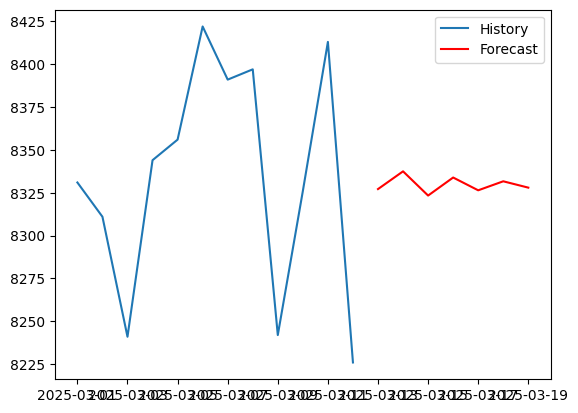

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(daily_orders, order=(2,1,2))  # (p,d,q) tune later
result = model.fit()

forecast = result.forecast(steps=7)  # next 7 days
print(forecast)

plt.plot(daily_orders, label='History')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet
import pandas as pd

df_prophet = daily_orders.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet needs these names

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

model.plot(forecast)


23:37:58 - cmdstanpy - INFO - Chain [1] start processing
23:38:00 - cmdstanpy - INFO - Chain [1] done processing
23:38:00 - cmdstanpy - INFO - Chain [1] start processing
23:38:00 - cmdstanpy - INFO - Chain [1] done processing
23:38:01 - cmdstanpy - INFO - Chain [1] start processing
23:38:01 - cmdstanpy - INFO - Chain [1] done processing


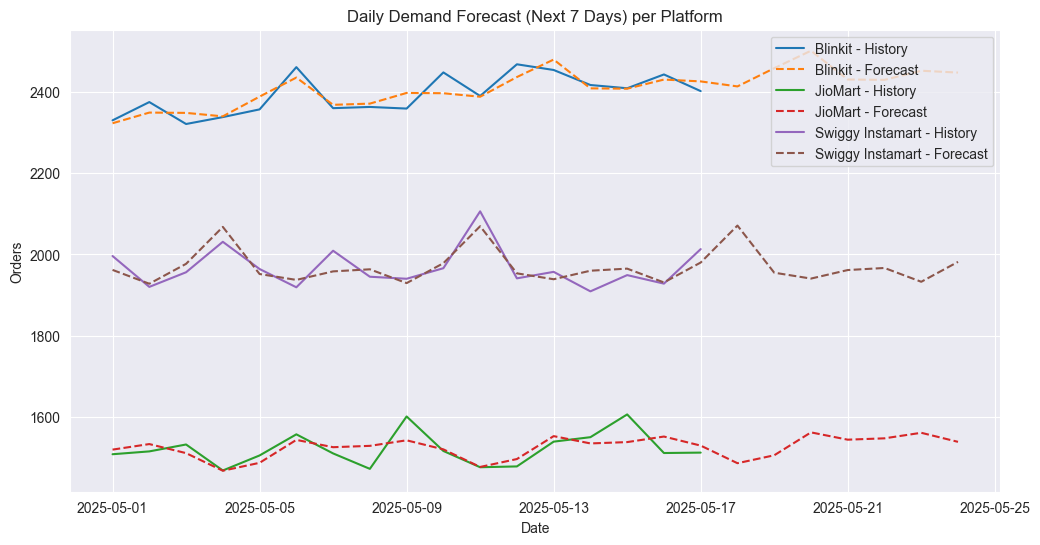

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Ensure datetime type
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Count daily orders per platform
daily_orders = (
    df.groupby(['platform_name', df['order_datetime'].dt.date])['order_id']
    .count()
    .reset_index()
)
daily_orders.columns = ['platform_name', 'ds', 'y']  # Prophet needs ds,y

# Store forecasts for each platform
platform_forecasts = {}

plt.figure(figsize=(12, 6))

for i, platform in enumerate(daily_orders['platform_name'].unique(), 1):
    platform_df = daily_orders[daily_orders['platform_name'] == platform]
    
    # Fill missing dates → ensure continuous time series
    platform_df = platform_df.set_index('ds').asfreq('D', fill_value=0).reset_index()
    
    # Prophet model
    model = Prophet()
    model.fit(platform_df[['ds', 'y']])
    
    # Future dataframe (7 days ahead)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    
    platform_forecasts[platform] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Plot historical + forecast
    plt.plot(platform_df['ds'], platform_df['y'], label=f"{platform} - History")
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', label=f"{platform} - Forecast")

plt.legend()
plt.title("Daily Demand Forecast (Next 7 Days) per Platform")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.show()


In [34]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Ensure 'hour' exists
df['hour'] = pd.to_datetime(df['order_datetime']).dt.hour

# Map category IDs to names
category_map = {
    1: 'Dairy', 2: 'Grocery', 3: 'Snacks',
    4: 'Fruits & Vegetables', 5: 'Beverages', 6: 'Personal Care'
}
df['category_name'] = df['product_category_id'].map(category_map)

# Encode platform and category
le_platform = LabelEncoder()
le_category = LabelEncoder()

df['platform_enc'] = le_platform.fit_transform(df['platform_name'])
df['category_enc'] = le_category.fit_transform(df['category_name'])

# Features & Target
X = df[['hour','platform_enc', 'category_enc']]
y = df['sla_delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = (model.predict_proba(X_test)[:,1] >= 0.2).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ Predict for entire dataset
df['predicted_delay'] = model.predict(X)
df['predicted_delay_prob'] = model.predict_proba(X)[:,1]

# Show first 10 predictions
print(df[['order_datetime','platform_name','category_name','sla_delay',
          'predicted_delay','predicted_delay_prob']].head(10))


Accuracy: 0.92175
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18435
           1       0.00      0.00      0.00      1565

    accuracy                           0.92     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.85      0.92      0.88     20000

        order_datetime     platform_name        category_name  sla_delay  \
0  2025-05-12 01:47:32           Blinkit  Fruits & Vegetables          0   
1  2025-05-10 13:22:12           Blinkit                Dairy          0   
2  2025-05-08 12:54:57           Blinkit            Beverages          0   
3  2025-05-06 00:48:04           Blinkit            Beverages          0   
4  2025-05-12 04:14:16           Blinkit            Beverages          0   
5  2025-05-08 09:02:39           Blinkit        Personal Care          0   
6  2025-05-11 16:01:18           Blinkit        Personal Care          0   
7  2025-05-11 18:46:48  Swiggy Instamart       

C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Example: your dataset
# df = pd.read_csv("your_data.csv")

# Suppose your dataset has:
# - delivery_time (numeric, e.g. minutes)
# - platform_name, category (categorical)
# - delay (target: 1 = delayed, 0 = not delayed)

# Encode categorical
df['platform_enc'] = df['platform_name'].astype('category').cat.codes
df['category_enc'] = df['product_category_id'].astype('category').cat.codes

# Features and target
X = df[['delivery_time_min','platform_enc','category_enc']]
y = df['sla_delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# Predict probability of delay (ratio you want)
y_pred_prob = model.predict_proba(X_test)[:,1]

# Metrics
print("ROC-AUC:",roc_auc_score(y_test,y_pred_prob))
print(classification_report(y_test,(y_pred_prob>0.5).astype(int)))

# Attach predictions back to test set
results = X_test.copy()
results['actual_delay'] = y_test.values
results['predicted_prob_delay'] = y_pred_prob
print(results.head())


ROC-AUC: 0.9488255688105431
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18435
           1       0.62      0.36      0.45      1565

    accuracy                           0.93     20000
   macro avg       0.78      0.67      0.71     20000
weighted avg       0.92      0.93      0.92     20000

       delivery_time_min  platform_enc  category_enc  actual_delay  \
75721                 14             1             4             0   
80184                 13             1             2             0   
19864                 15             2             1             0   
76699                 27             1             3             0   
92991                 12             0             5             0   

       predicted_prob_delay  
75721              0.039669  
80184              0.026665  
19864              0.046575  
76699              0.695212  
92991              0.022641  


Customer Segmentation (%):
Segment
Price-only    97.088889
Promisable     2.066667
At-Risk        0.844444
Name: proportion, dtype: float64


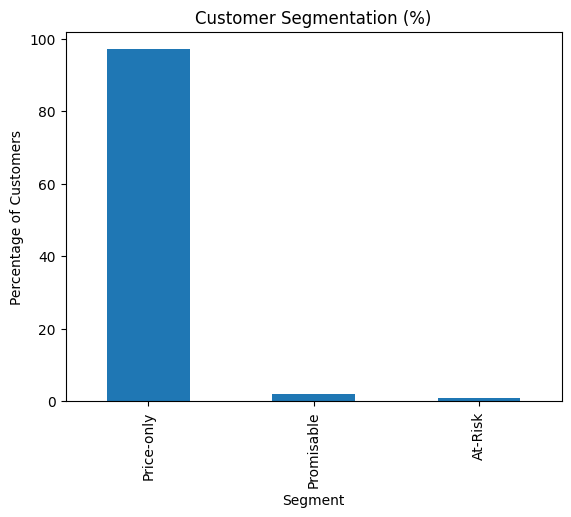

In [20]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

ref_date = df['order_datetime'].max()

rfm = df.groupby('customer_id').agg({
    'order_datetime':lambda x: (ref_date - x.max()).days,
    'order_id':'count',
    'order_value_inr':'sum'
}).reset_index()


rfm.rename(columns={
    'order_datetime':'Recency',
    'order_id':'Frequency',
    'order_value_inr':'Monetary'
}, inplace=True)


csat = df.groupby('customer_id')['service_rating'].mean().reset_index()
csat.rename(columns={'service_rating': 'CSAT'}, inplace=True)

df['refund_requested'] = df['refund_requested'].map({'Yes': 1, 'No': 0})

refund = df.groupby('customer_id')['refund_requested'].mean().reset_index()
refund.rename(columns={'refund_requested': 'RefundRate'}, inplace=True)

rfm = rfm.merge(csat, on='customer_id', how='left')
rfm = rfm.merge(refund, on='customer_id', how='left')

def segment_customer(row):
    if row['Frequency'] > 5 and row['Monetary'] > 5000 and row['CSAT'] >= 4 and row['RefundRate'] < 0.2:
        return 'Loyalist'
    elif row['CSAT'] >= 4 and row['Frequency'] <= 5:
        return 'Promisable'
    elif row['CSAT'] < 3 or row['RefundRate'] >= 0.3:
        return 'At-Risk'
    else:
        return 'Price-only'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Segment counts
seg_counts = rfm['Segment'].value_counts(normalize=True) * 100

print("Customer Segmentation (%):")
print(seg_counts)



seg_counts.plot(kind='bar', title="Customer Segmentation (%)")
plt.ylabel("Percentage of Customers")
plt.show()



In [22]:
rfm.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'CSAT', 'RefundRate',
       'Segment'],
      dtype='object')

In [23]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'sla_delay', 'hour', 'weekday', 'Segment',
       'order_hour', 'platform_enc', 'category_enc', 'category_name',
       'predicted_delay', 'predicted_delay_prob'],
      dtype='object')

In [20]:
# 1. Merge only customer_id + Segment into df
merged = df

# 2. Count per platform & segment
counts = merged.groupby(['platform_name', 'Segment']).size().reset_index(name='count')

# 3. Normalize counts to get proportions per platform
counts['proportion'] = counts.groupby('platform_name')['count'].transform(lambda x: 100 * x / x.sum()).round()

print(counts)


       platform_name     Segment  count  proportion
0            Blinkit     At-Risk   1022         3.0
1            Blinkit    Loyalist  10055        25.0
2            Blinkit  Price-only  29258        72.0
3            Blinkit  Promisable    360         1.0
4            JioMart     At-Risk    807         3.0
5            JioMart    Loyalist   5599        22.0
6            JioMart  Price-only  19283        75.0
7            JioMart  Promisable    167         1.0
8   Swiggy Instamart     At-Risk    852         3.0
9   Swiggy Instamart    Loyalist   8416        25.0
10  Swiggy Instamart  Price-only  23882        71.0
11  Swiggy Instamart  Promisable    299         1.0


In [35]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [39]:
import pandas as pd

# Ensure datetime
df["order_datetime"] = pd.to_datetime(df["order_datetime"], dayfirst=True)
df["order_hour"] = df["order_datetime"].dt.hour

# Example delay flag (adjust threshold as needed)


# 1. Orders per platform per hour
hourly_orders = df.groupby(["platform_name","order_hour"]).agg(
    order_count=("order_id","count"),
    avg_delay=("sla_delay","mean")
).reset_index()

# 2. Top 5 peak hours per platform
peak_hours = (
    hourly_orders.groupby("platform_name", group_keys=False)
    .apply(lambda x: x.nlargest(5,"order_count"))
    .reset_index(drop=True)
)

# 3. Convert delay ratio → percentage
peak_hours["avg_delay_pct"] = (peak_hours["avg_delay"] * 100).round(2)

# 4. Recommendation
peak_hours["recommendation"] = peak_hours["avg_delay_pct"].apply(
    lambda x: "⚡ Allocate more resources" if x > 8 else "✅ Current resources fine"
)

# ✅ Now works
print(peak_hours[["platform_name","order_hour","order_count","avg_delay_pct","recommendation"]])


       platform_name  order_hour  order_count  avg_delay_pct  \
0            Blinkit          16         1959           7.55   
1            Blinkit           7         1896           8.02   
2            Blinkit          11         1878           7.93   
3            Blinkit          18         1872           8.60   
4            Blinkit           6         1871           7.32   
5            JioMart           0         1252           7.83   
6            JioMart           8         1234           7.78   
7            JioMart          13         1234           7.70   
8            JioMart          12         1230           6.91   
9            JioMart          21         1198           7.85   
10  Swiggy Instamart          20         1568           7.46   
11  Swiggy Instamart          16         1557           8.93   
12  Swiggy Instamart          23         1557           9.76   
13  Swiggy Instamart          22         1552           7.67   
14  Swiggy Instamart           5        

C:\Users\danis\AppData\Local\Temp\ipykernel_18692\712420891.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5,"order_count"))


In [32]:
peak_hours.columns

Index(['order_hour', 'order_count', 'avg_delay', 'avg_delay_pct',
       'recommendation'],
      dtype='object')

In [9]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'sla_delay', 'hour', 'weekday', 'Segment',
       'order_hour', 'category_name', 'platform_enc', 'category_enc',
       'predicted_delay', 'predicted_delay_prob'],
      dtype='object')

In [19]:
import pandas as pd

# Ensure datetime
df["order_datetime"] = pd.to_datetime(df["order_datetime"])
df["order_hour"] = df["order_datetime"].dt.hour

# Example delay flag (adjust threshold as needed)


# 1. Orders per platform per hour
hourly_orders = df.groupby(["platform_name","order_hour"]).agg(
    order_count=("order_id","count"),
    avg_delay=("sla_delay","mean")
).reset_index()

# 2. Top 5 peak hours per platform
peak_hours = (
    hourly_orders.groupby("platform_name", group_keys=False)
    .apply(lambda x: x.nlargest(5,"order_count"))
    .reset_index(drop=True)
)

# 3. Convert delay ratio → percentage
peak_hours["avg_delay_pct"] = (peak_hours["avg_delay"] * 100).round(2)

# 4. Recommendation
peak_hours["recommendation"] = peak_hours["avg_delay_pct"].apply(
    lambda x: "⚡ Allocate more resources" if x > 8 else "✅ Current resources fine"
)

# ✅ Now works
print(peak_hours[["platform_name","order_hour","order_count","avg_delay_pct","recommendation"]])


       platform_name  order_hour  order_count  avg_delay_pct  \
0            Blinkit          16         1959           7.55   
1            Blinkit           7         1896           8.02   
2            Blinkit          11         1878           7.93   
3            Blinkit          18         1872           8.60   
4            Blinkit           6         1871           7.32   
5            JioMart           0         1252           7.83   
6            JioMart           8         1234           7.78   
7            JioMart          13         1234           7.70   
8            JioMart          12         1230           6.91   
9            JioMart          21         1198           7.85   
10  Swiggy Instamart          20         1568           7.46   
11  Swiggy Instamart          16         1557           8.93   
12  Swiggy Instamart          23         1557           9.76   
13  Swiggy Instamart          22         1552           7.67   
14  Swiggy Instamart           5        

C:\Users\danis\AppData\Local\Temp\ipykernel_3000\1605227144.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5,"order_count"))


In [6]:
peak_hours = (
    df.groupby(['platform_name','order_hour'])
      .size().reset_index(name='order_count')
)

top5_hours = (
    peak_hours.sort_values(['platform_name','order_count'], ascending=[True,False])
    .groupby('platform_name')
    .head(5)
)

print(top5_hours)


       platform_name  order_hour  order_count
10           Blinkit          12         1933
12           Blinkit          14         1889
15           Blinkit          17         1884
16           Blinkit          18         1881
4            Blinkit           6         1879
29           JioMart           9         1227
39           JioMart          19         1224
43           JioMart          23         1223
28           JioMart           8         1217
34           JioMart          14         1198
48  Swiggy Instamart           6         1594
60  Swiggy Instamart          18         1577
64  Swiggy Instamart          22         1572
61  Swiggy Instamart          19         1549
65  Swiggy Instamart          23         1546


sla_delay
No     92493
Yes     7507
Name: count, dtype: int64

In [84]:
category_map = {
    1: 'Dairy', 2: 'Grocery', 3: 'Snacks',
    4: 'Fruits & Vegetables', 5: 'Beverages', 6: 'Personal Care'
}

top_cats_in_peak = (
    df[df['order_hour'].isin(top5_hours['order_hour'])]
    .groupby(['platform_name','order_hour','product_category_id'])
    .size().reset_index(name='cat_orders')
)


# Pick top categories in each peak hour per platform
top_cats_in_peak = (
    top_cats_in_peak.sort_values(['platform_name','order_hour','cat_orders'], ascending=[True,True,False])
    .groupby(['platform_name','order_hour'])
    .head(1)   # top 2 categories per hour
)


top_cats_in_peak['product_category'] = top_cats_in_peak['product_category_id'].map(category_map)

top_cats_in_peak

,platform_name,order_hour,product_category_id,cat_orders,product_category
5,Blinkit,6,6,408,Personal Care
7,Blinkit,8,2,403,Grocery
17,Blinkit,9,6,397,Personal Care
19,Blinkit,12,2,406,Grocery
29,Blinkit,14,6,410,Personal Care
35,Blinkit,17,6,422,Personal Care
41,Blinkit,18,6,420,Personal Care
47,Blinkit,19,6,419,Personal Care
53,Blinkit,22,6,394,Personal Care
59,Blinkit,23,6,387,Personal Care


In [85]:
cat_delay = (
    df.groupby(['platform_name','order_hour','product_category_id'])['sla_delay']
      .mean().reset_index(name='avg_delay')
)

# Merge with top categories
promo_reco = top_cats_in_peak.merge(cat_delay, on=['platform_name','order_hour','product_category_id'], how='left')

promo_reco['avg_delay_pct'] = (promo_reco['avg_delay'] * 100).round(2)
promo_reco['product_category'] = promo_reco['product_category_id'].map(category_map)

promo_reco


,platform_name,order_hour,product_category_id,cat_orders,product_category,avg_delay,avg_delay_pct
0,Blinkit,6,6,408,Personal Care,0.100490,10.05
1,Blinkit,8,2,403,Grocery,0.136476,13.65
2,Blinkit,9,6,397,Personal Care,0.123426,12.34
3,Blinkit,12,2,406,Grocery,0.133005,13.30
4,Blinkit,14,6,410,Personal Care,0.124390,12.44
5,Blinkit,17,6,422,Personal Care,0.120853,12.09
6,Blinkit,18,6,420,Personal Care,0.104762,10.48
7,Blinkit,19,6,419,Personal Care,0.116945,11.69
8,Blinkit,22,6,394,Personal Care,0.126904,12.69
9,Blinkit,23,6,387,Personal Care,0.175711,17.57


In [39]:
df.groupby(['platform_name','customer_feedback'])['order_id'].count().unstack().fillna(0)

customer_feedback,Delivery person was rude.,"Easy to order, loved it!",Excellent experience!,"Fast delivery, great service!",Good quality products.,"Horrible experience, never ordering again.",Items missing from order.,"Not fresh, disappointed.",Packaging could be better.,Quick and reliable!,"Very late delivery, not happy.",Very satisfied with the service.,Wrong item delivered.
platform_name,,,,,,,,,,,,,
Blinkit,3134,3145,3169,3111,3155,3066,3125,3119,3182,3127,3068,3102,3192
JioMart,1952,2025,2008,2038,2050,1874,2024,1980,1931,1965,1988,2011,2010
Swiggy Instamart,2557,2622,2606,2566,2585,2590,2588,2481,2591,2566,2534,2626,2537


In [41]:
df.groupby(['platform_name','Segment'])['order_value_inr'].sum().unstack().fillna(0)

Segment,At-Risk,Loyalist,Price-only,Promisable
platform_name,,,,
Blinkit,446731,4962903,11897911,137025
JioMart,362606,3140638,8086193,74006
Swiggy Instamart,358450,3829878,9569463,129732


In [42]:
df['order_datetime'].max()

Timestamp('2025-05-17 23:59:55')

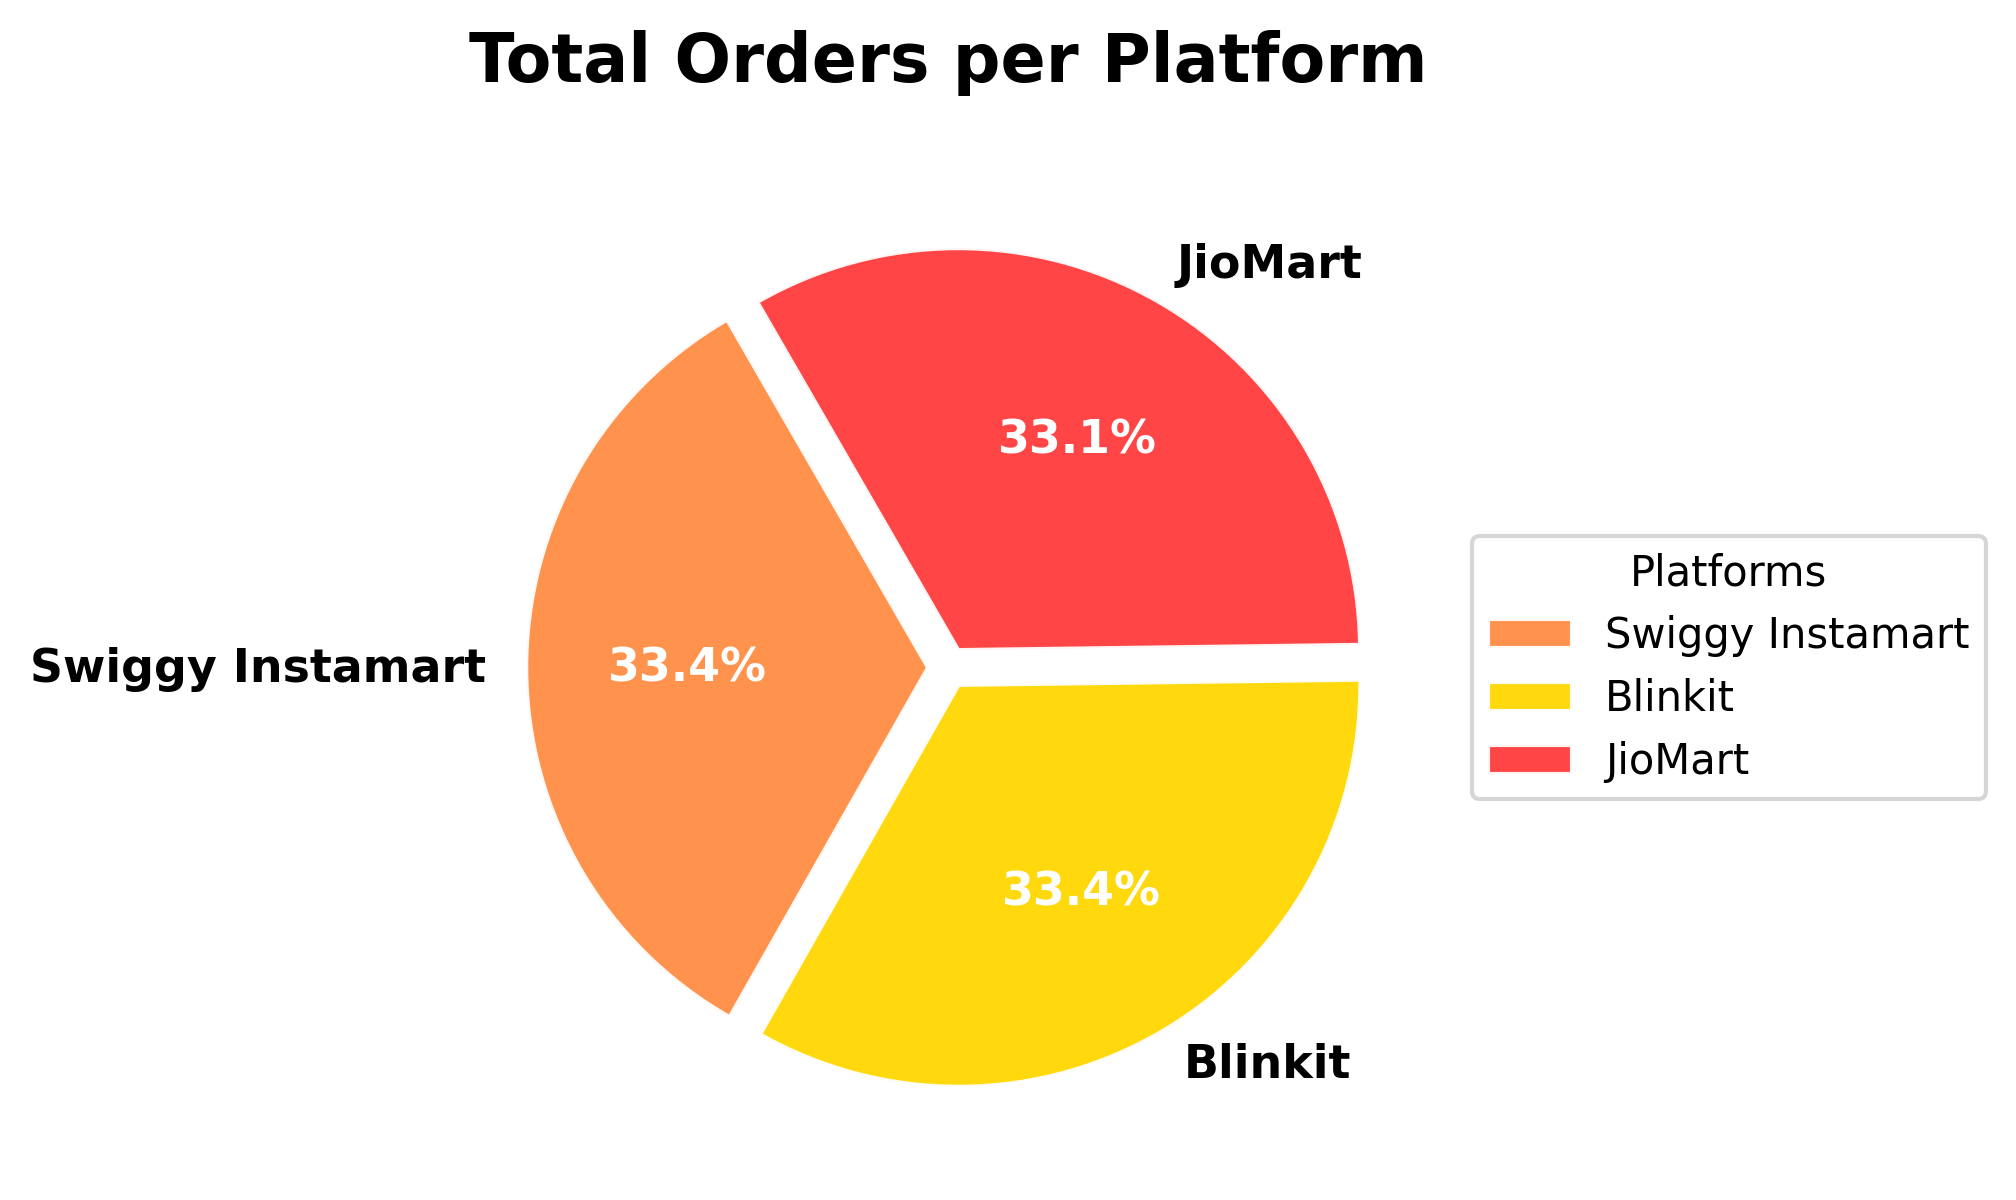

In [15]:


# Custom glossy-style colors
colors = ["#FF8C42", "#FFD700", "#FF3B3B"]

# Count orders per platform
platform_counts = df['platform_name'].value_counts()

fig, ax = plt.subplots(figsize=(6,5), dpi=300)

# Explode effect (slightly separate slices)
explode = [0.05]*len(platform_counts)

wedges, texts, autotexts = ax.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1, 'antialiased':True},
    textprops={'fontsize':11, 'weight':'bold'}
)

# Improve percentage text style
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_weight("bold")
    autotext.set_size(11)

# Add a subtle shadow effect
for w in wedges:
    w.set_alpha(0.95)

# Title styling
ax.set_title("Total Orders per Platform", fontsize=16, weight='bold', pad=20)

# Add legend on right
ax.legend(
    wedges,
    platform_counts.index,
    title="Platforms",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Tight layout
plt.tight_layout()

# Save option (high resolution)
plt.savefig("orders_per_platform.png", dpi=400, bbox_inches="tight")

plt.show()


In [127]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [161]:
import pandas as pd
import plotly.graph_objects as go
import cufflinks as cf

cf.go_offline()

# Aggregate: orders per platform per category
agg_df = df.groupby(['platform_name','product_category_name'])['order_id'].count().unstack().fillna(0)

# Sort categories by total orders descending (across all platforms)
category_order = agg_df.sum(axis=0).sort_values(ascending=False).index
agg_df = agg_df[category_order]

# Calculate percentage per category (platform share within category)
category_total = agg_df.sum(axis=0)
agg_pct = (agg_df / category_total * 100).round(1)

# Define platform colors
colors = {"Blinkit":"#FFD700", "Swiggy Instamart":"#FF8C42", "JioMart":"#FF3B3B"}

# Create traces for each platform
traces = []
for platform in ['Blinkit','Swiggy Instamart','JioMart']:
    traces.append(go.Bar(
        x=agg_pct.columns,
        y=agg_pct.loc[platform],
        name=platform,
        marker_color=colors[platform],
        text=agg_pct.loc[platform].astype(str) + '%',  # show % inside bar
        textposition='auto'
    ))

# Create figure first
fig = go.Figure(data=traces)

# Add category-level percentage annotation (total % of orders per category)
category_total_pct = (agg_df.sum() / agg_df.sum().sum() * 100).round(1)
for category in agg_df.columns:
    tallest = agg_pct[category].max()  # highest platform % in this category
    y_pos = tallest + 5  # slightly above tallest bar
    if y_pos > 100:      # don't exceed chart max
        y_pos = 100
    fig.add_annotation(
        x=category,
        y=y_pos,
        text=f"{category_total_pct[category]}%",
        showarrow=False,
        font=dict(size=12, color="black", family="Arial Black")
    )

# Layout
fig.update_layout(
    title="Uniform Order Distribution Across Categories, with Blinkit Leading in Groceries & Personal Care",
    barmode='group',
    xaxis=dict(title='% inside bars → platform share in category<br> % above bars → category share in total orders', tickangle=-35),
    yaxis=dict(title='Percentage of Orders', range=[0,100]),
    legend=dict(title='Platform'),
    template='plotly_white',
    width=950,
    height=500
)

fig.show(renderer="browser")


In [178]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [177]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go

cf.go_offline()

# Group data: hourly order counts per platform
hourly_orders = df.groupby(['hour','platform_name'])['order_id'].count().unstack().reset_index()

# Reorder platforms for consistent colors
platform_order = ['Blinkit', 'Swiggy Instamart', 'JioMart']
hourly_orders = hourly_orders[['hour'] + platform_order]   # keep 'hour' column + platforms

# Define colors
colors = {'Blinkit': '#FFD700', 'Swiggy Instamart': '#FF8C42', 'JioMart': '#FF3B3B'}

# Create figure
fig = go.Figure()

for platform in platform_order:
    fig.add_trace(go.Scatter(
        x=hourly_orders['hour'],   # ✅ correct x-axis
        y=hourly_orders[platform],
        mode='lines+markers',
        name=platform,
        line=dict(color=colors[platform], width=3),
        marker=dict(size=7, symbol='circle')
    ))

# Layout
fig.update_layout(
    title="⏰ Hourly Order Trends by Platform",
    xaxis=dict(title="Hour of Day", dtick=1, range=[0,23]),   # ✅ force x-axis 0–23
    yaxis=dict(title="Number of Orders"),
    template="plotly_white",
    legend=dict(title="Platform"),
    width=950,
    height=500
)

fig.show(renderer="browser")


In [206]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: create day_type column
df['day_type'] = df['order_datetime'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Step 2: group by platform and day_type → total orders
total_orders = df.groupby(['platform_name','day_type']).size().reset_index(name='total_orders')

# Step 3: count unique days per day_type (using 'date' column)
days_count = df.groupby('day_type')['date'].nunique().to_dict()

# Step 4: normalize → average per day
total_orders['avg_orders'] = total_orders.apply(lambda r: r['total_orders'] / days_count[r['day_type']], axis=1)

# Pivot for plotting
pivot = total_orders.pivot(index='platform_name', columns='day_type', values='avg_orders').fillna(0)

# --- Plotly Grouped Bar Chart ---
colors = {"Weekday": "#F1B38A", "Weekend": "#BE80F3"}  # corporate blue + orange

fig = go.Figure()

for day_type in pivot.columns:
    fig.add_trace(go.Bar(
        x=pivot.index,
        y=pivot[day_type],
        name=day_type,
        marker=dict(color=colors[day_type]),
        text=pivot[day_type].round(0),  # rounded avg orders to nearest whole number
        textposition="outside"
    ))

# Layout styling
fig.update_layout(
    title=dict(
        text="Blinkit Stays on Top, Swiggy Finds Weekend Momentum",
        x=0.5,
        xanchor="center",
        font=dict(size=18)
    ),
    xaxis=dict(title="Platform"),
    yaxis=dict(title="Average Orders per Day"),
    barmode="group",
    bargap=0.25,
    template="plotly_white",
    legend=dict(title="Day Type", orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5),
    width=700,
    height=470
)

fig.show(renderer="browser")


In [9]:
df.groupby(['platform_name','hour'])['order_id'].count().unstack().fillna(0)

hour,0,1,2,3,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
platform_name,,,,,,,,,,,,,,,,,,,,,
Blinkit,1754,1810,1768,1821,1753,1735,1783,1788,1707,1759,...,1708,1769,1792,1784,1717,1771,1805,1736,1772,1799
JioMart,1105,1090,1093,1085,1122,1095,1198,1128,1137,1085,...,1168,1130,1094,1154,1092,1211,1133,1104,1128,1102
Swiggy Instamart,1404,1507,1441,1412,1501,1440,1433,1485,1484,1491,...,1402,1474,1403,1499,1474,1443,1468,1378,1464,1441


In [10]:
# Count orders per platform per hour
hourly_counts = df.groupby(['platform_name','hour'])['order_id'].count().unstack().fillna(0)

# Calculate percentage change compared to previous hour
pct_change = hourly_counts.pct_change(axis=1) * 100  # % change along hours

# Format output nicely for executives
for platform in pct_change.index:
    for hour, change in pct_change.loc[platform].items():
        if pd.notna(change):  # skip first hour (NaN)
            print(f"{platform}: Orders at {hour}:00 {'increased' if change>0 else 'decreased'} by {abs(change):.1f}% compared to {hour-1}:00")


Blinkit: Orders at 1:00 increased by 3.2% compared to 0:00
Blinkit: Orders at 2:00 decreased by 2.3% compared to 1:00
Blinkit: Orders at 3:00 increased by 3.0% compared to 2:00
Blinkit: Orders at 5:00 decreased by 3.7% compared to 4:00
Blinkit: Orders at 6:00 decreased by 1.0% compared to 5:00
Blinkit: Orders at 7:00 increased by 2.8% compared to 6:00
Blinkit: Orders at 8:00 increased by 0.3% compared to 7:00
Blinkit: Orders at 9:00 decreased by 4.5% compared to 8:00
Blinkit: Orders at 10:00 increased by 3.0% compared to 9:00
Blinkit: Orders at 11:00 decreased by 0.7% compared to 10:00
Blinkit: Orders at 12:00 increased by 3.4% compared to 11:00
Blinkit: Orders at 13:00 increased by 0.3% compared to 12:00
Blinkit: Orders at 14:00 decreased by 5.7% compared to 13:00
Blinkit: Orders at 15:00 increased by 3.6% compared to 14:00
Blinkit: Orders at 16:00 increased by 1.3% compared to 15:00
Blinkit: Orders at 17:00 decreased by 0.4% compared to 16:00
Blinkit: Orders at 18:00 decreased by 3.8

In [13]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [19]:
import pandas as pd

# --- Step 1: Filter Week 1 ---
week1 = df[(df['order_datetime'] >= '2025-05-01') & (df['order_datetime'] <= '2025-05-17')].copy()

# --- Step 2: Create day_type column from weekday names ---
week1['day_type'] = week1['weekday'].apply(lambda x: 'Weekday' if x in ['Monday','Tuesday','Wednesday','Thursday','Friday'] else 'Weekend')

# --- Step 3: Count orders per platform per day_type ---
counts = week1.groupby(['platform_name', 'day_type'])['order_id'].count().reset_index(name='orders')

# --- Step 4: Calculate percentage per platform ---
counts['percentage'] = counts.groupby('platform_name')['orders'].transform(lambda x: 100 * x / x.sum()).round(1)

print(counts)


      platform_name day_type  orders  percentage
0           Blinkit  Weekday   25828        67.4
1           Blinkit  Weekend   12465        32.6
2           JioMart  Weekday   16201        66.6
3           JioMart  Weekend    8143        33.4
4  Swiggy Instamart  Weekday   20997        66.8
5  Swiggy Instamart  Weekend   10439        33.2


In [28]:
import pandas as pd
import plotly.express as px

# Step 1: Calculate distribution
rating_dist = (
    df.groupby(['platform_name', 'service_rating'])['order_id']
    .count()
    .reset_index(name='orders')
)

# Step 2: Calculate percentages within each platform
rating_dist['percentage'] = rating_dist.groupby('platform_name')['orders']\
    .transform(lambda x: 100 * x / x.sum())

# Step 3: Create stacked bar chart
fig = px.bar(
    rating_dist,
    x="platform_name",
    y="percentage",
    color="service_rating",
    text=rating_dist['percentage'].round(1).astype(str) + '%',  # show percentages
    color_discrete_sequence=px.colors.sequential.Viridis,
)

# Step 4: Style layout
fig.update_traces(textposition="inside", insidetextanchor="middle")

fig.update_layout(
    barmode="stack",
    xaxis_title="Platform",
    yaxis_title="Percentage of Orders",
    yaxis=dict(ticksuffix="%"),
    legend_title="Service Rating",
    plot_bgcolor="white",
    font=dict(size=12),
    title=dict(x=0.5, xanchor='center', font=dict(size=16, family="Arial", color="black"))
)

fig.show()


In [48]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback', 'product_category_name', 'sla_delay', 'Segment',
       'hour', 'weekday', 'date', 'order_hour'],
      dtype='object')

In [71]:
aov

platform_name
Blinkit             428.666175
JioMart             451.092319
Swiggy Instamart    415.184998
Name: AOV, dtype: float64

In [82]:
import pandas as pd

# --- Step 1: Customers per platform ---
customers = df.groupby("platform_name")["customer_id"].nunique().rename("num_customers")

# --- Step 2: Total orders per platform ---
orders = df.groupby("platform_name")["order_id"].nunique().rename("total_orders")

# --- Step 3: Order frequency (orders per customer) ---
order_freq = (orders / customers).rename("orders_per_customer")

# --- Step 4: Total revenue & AOV ---
revenue = df.groupby("platform_name")["order_value_inr"].sum().rename("total_revenue")
aov = (revenue / orders).rename("AOV")

# --- Step 5: Combine into one summary table ---
summary = pd.concat([customers, orders, order_freq, revenue, aov], axis=1)

# --- Step 6: Category mix contribution (FIXED version) ---
category_mix = (
    df.groupby(["platform_name", "product_category_name"])["order_value_inr"].sum()
    .groupby(level=0, group_keys=False)      # prevents duplication
    .apply(lambda x: (x / x.sum()) * 100)    # percentage contribution
    .reset_index()                           # safe reset, no duplicate col
    .rename(columns={"order_value_inr": "category_revenue_pct"})
)

# --- Step 7: Calculate revenue from formula (sanity check) ---
summary["calc_revenue"] = (
    summary["num_customers"] * summary["orders_per_customer"] * summary["AOV"]
).round(2)

# --- Display ---
print("📊 Platform-level Summary:")
print(summary.round(2))

print("\n📊 Category Contribution (% of revenue by category):")
print(category_mix.round(1))


📊 Platform-level Summary:
                  num_customers  total_orders  orders_per_customer  \
platform_name                                                        
Blinkit                    8896         40695                 4.57   
JioMart                    8503         25856                 3.04   
Swiggy Instamart           8795         33449                 3.80   

                  total_revenue     AOV  calc_revenue  
platform_name                                          
Blinkit                17444570  428.67    17444570.0  
JioMart                11663443  451.09    11663443.0  
Swiggy Instamart       13887523  415.18    13887523.0  

📊 Category Contribution (% of revenue by category):
       platform_name product_category_name  category_revenue_pct
0            Blinkit             Beverages                  15.4
1            Blinkit                Dairy                   14.3
2            Blinkit   Fruits & Vegetables                  12.1
3            Blinkit          

In [126]:
import pandas as pd
import plotly.express as px

# --- Step 1: Calculate SLA breach % per platform per hour ---
sla_heatmap = df.groupby(['platform_name','hour'])['sla_delay'].mean().reset_index()
sla_heatmap['sla_delay'] = (sla_heatmap['sla_delay'] * 100).round(1)  # % and 1 decimal

# --- Step 2: Create heatmap ---
fig = px.imshow(
    sla_heatmap.pivot(index='platform_name', columns='hour', values='sla_delay'),
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdYlGn_r',  # Red for high breach, green for low
    labels=dict(x="Hour of Day", color="SLA Breach %")
)

# --- Step 3: Layout styling ---
fig.update_layout(
    xaxis=dict(
               tickmode='linear',
               
               ),
    yaxis=dict(autorange="reversed",
               tickfont=dict(family='Arial Black', size=12, color='black')),  # So Blinkit atop
    template="plotly_white",
    width=900,
    height=500
)

fig.show()


In [113]:
import pandas as pd

# --- Step 1: Define time bins ---
# Suppose: Morning 6-11, Midday 12-15, Evening 16-19, Night 20-23, Late Night 0-5
def time_period(hour):
    if 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 15:
        return "Midday"
    elif 16 <= hour <= 19:
        return "Evening"
    else:
        return "Night"

df['time_period'] = df['hour'].apply(time_period)

# --- Step 2: Count orders per platform per time period ---
order_counts = df.groupby(['platform_name','time_period'])['order_id'].count().reset_index(name='orders')

# --- Step 3: Calculate % of total orders per platform ---
order_counts['percentage'] = order_counts.groupby('platform_name')['orders'].transform(lambda x: 100 * x / x.sum()).round(1)

# --- Step 4: Display result ---
for platform in order_counts['platform_name'].unique():
    print(f"\n📌 {platform} Orders Distribution by Time of Day:")
    temp = order_counts[order_counts['platform_name']==platform]
    for idx, row in temp.iterrows():
        print(f"  {row['time_period']}: {row['percentage']}%")



📌 Blinkit Orders Distribution by Time of Day:
  Evening: 17.4%
  Midday: 17.4%
  Morning: 25.8%
  Night: 39.4%

📌 JioMart Orders Distribution by Time of Day:
  Evening: 17.6%
  Midday: 17.5%
  Morning: 26.4%
  Night: 38.5%

📌 Swiggy Instamart Orders Distribution by Time of Day:
  Evening: 17.4%
  Midday: 17.3%
  Morning: 26.4%
  Night: 38.9%


In [222]:
import pandas as pd
import plotly.express as px

# --- Step 1: Aggregate revenue per platform per segment ---
rev_segment = df.groupby(['platform_name','Segment'])['order_value_inr'].sum().reset_index()

# --- Step 2: Sort segments by revenue per platform (smallest on top) ---
rev_segment = rev_segment.sort_values(['platform_name', 'order_value_inr'],ascending=False)

# --- Step 3: Calculate percentage contribution per platform ---
rev_segment['percentage'] = rev_segment.groupby('platform_name')['order_value_inr'].transform(lambda x: 100 * x / x.sum())

# --- Step 4: Create stacked bar chart ---
fig = px.bar(
    rev_segment,
    x='platform_name',
    y='order_value_inr',
    color='Segment',
    text=rev_segment['percentage'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=px.colors.qualitative.Pastel
    # You can try Pastel or D3
)

# --- Step 5: Update layout ---
fig.update_layout(
    title="Revenue Contribution by Segment per Platform",
    xaxis_title="Platform",
    yaxis_title="Revenue (INR)",
    yaxis=dict(tickformat=",.0f"),
    barmode='stack',
    template='plotly_white',
    width=900,
    height=500,
    legend_title="Segment"
)

fig.show()


In [177]:
import pandas as pd

# --- Step 1: Customer-level aggregation ---
cust_summary = df.groupby(['platform_name','Segment','customer_id']).agg(
    total_orders=('order_id','count'),
    avg_rating=('service_rating','mean'),
    refunds=('refund_requested','sum')
).reset_index()

# --- Step 2: Determine thresholds ---
# You can tweak these thresholds
freq_thresh = cust_summary.groupby('platform_name')['total_orders'].transform('mean')
rating_thresh = 3.5  # consider <3.5 as bad rating
refund_thresh = 1    # any refund count > 0

# --- Step 3: Flag likely churners ---
cust_summary['likely_churn'] = (
    (cust_summary['total_orders'] < freq_thresh) |
    (cust_summary['avg_rating'] < rating_thresh) |
    (cust_summary['refunds'] > refund_thresh)
)

# --- Step 4: Calculate % of churners per platform & segment ---
churn_pct = (
    cust_summary.groupby(['platform_name','Segment'])['likely_churn']
    .mean() * 100
).reset_index(name='churn_percentage')

# --- Step 5: Show result ---
print(churn_pct.round(1))


       platform_name     Segment  churn_percentage
0            Blinkit     At-Risk              93.2
1            Blinkit    Loyalist              35.3
2            Blinkit  Price-only              61.9
3            Blinkit  Promisable              98.8
4            JioMart     At-Risk              97.5
5            JioMart    Loyalist              72.7
6            JioMart  Price-only              89.6
7            JioMart  Promisable             100.0
8   Swiggy Instamart     At-Risk              86.3
9   Swiggy Instamart    Loyalist              31.9
10  Swiggy Instamart  Price-only              58.0
11  Swiggy Instamart  Promisable              97.5


In [221]:
import plotly.express as px

# --- Step 1: Assuming churn_pct from previous code ---
# churn_pct has columns: platform_name, Segment, churn_percentage

# --- Step 2: Create grouped bar chart ---
fig = px.bar(
    churn_pct,
    x='platform_name',
    y='churn_percentage',
    color='Segment',
    barmode='group',  # use 'stack' if you want stacked bars
    text=churn_pct['churn_percentage'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# --- Step 3: Update layout ---
fig.update_layout(
    title="🚨 Likely Churn % per Platform & Segment",
    xaxis_title="Platform",
    yaxis_title="Churn % of Customers",
    yaxis=dict(range=[0,100]),
    template='plotly_white',
    width=900,
    height=500,
    legend_title="Segment"
)

fig.show()


In [257]:
import pandas as pd
import plotly.graph_objects as go

# --- Step 1: Calculate SLA breach % per platform per hour ---
sla_heatmap = df.groupby(['platform_name','hour'])['sla_delay'].mean().reset_index()
sla_heatmap['sla_delay'] = (sla_heatmap['sla_delay'] * 100).round(1)  # % and 1 decimal

# --- Step 2: Pivot the table for heatmap ---
pivot = sla_heatmap.pivot(index='platform_name', columns='hour', values='sla_delay')

# --- Step 3: Create custom text labels (⚠️ for high SLA breach) ---
threshold = 13
text_labels = pivot.applymap(lambda x: "⚠️" if x > threshold else f"{x:.0f}%")

# --- Step 4: Create heatmap using go.Heatmap ---
fig = go.Figure(data=go.Heatmap(
    z=pivot.values,
    x=pivot.columns,
    y=pivot.index,
    text=text_labels.values,
    texttemplate="%{text}",  # shows our custom text
    textfont={"size":11},
    colorscale='RdYlGn_r',  # Red for high breach, green for low
    colorbar=dict(title="SLA Breach %")
))

# --- Step 5: Layout styling ---
fig.update_layout(
    xaxis=dict(title="Hour of Day", tickmode='linear'),
    yaxis=dict(title="Platform", autorange="reversed", tickfont=dict(family='Arial Black', size=12)),
    width=1100,
    height=700,
    template="plotly_white",
    title="⚡Peak-Hour Delivery Risk & Resource Focus",
    title_font=dict(size=20, family='Arial black', color='black')
)

fig.show()




C:\Users\danis\AppData\Local\Temp\ipykernel_17824\3400801696.py:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [262]:
# Correct column name from 'slay_delay' to 'sla_delay'
category_delay = (
    df.groupby(['platform_name', 'product_category_name'])['sla_delay']
    .mean()                # average SLA delay per category per platform
    .unstack()             # columns = product categories
    .fillna(0)             # fill missing with 0
    .round(2)              # 3 decimal points
) 

category_delay *= 100
category_delay


product_category_name,Beverages,Dairy,Fruits & Vegetables,Grocery,Personal Care,Snacks
platform_name,,,,,,
Blinkit,11.0,7.0,6.0,20.0,21.0,7.0
JioMart,52.0,53.0,51.0,52.0,53.0,52.0
Swiggy Instamart,12.0,11.0,11.0,11.0,11.0,11.0


In [264]:
import pandas as pd

# Ensure 'hour' column exists
df['hour'] = pd.to_datetime(df['order_datetime']).dt.hour

# Calculate per platform per hour delay probability
# We'll treat 'sla_delay' > 0 as delay
df['delay_flag'] = (df['sla_delay'] > 0).astype(int)

# Group by platform and hour
delay_prob = (
    df.groupby(['platform_name', 'hour'])['delay_flag']
    .mean()  # fraction of orders delayed
    .reset_index()
)

# Convert to percentage
delay_prob['delay_prob_pct'] = (delay_prob['delay_flag'] * 100).round(1)

# Drop intermediate column
delay_prob = delay_prob.drop(columns='delay_flag')

# Pivot table if you want platforms as rows and hours as columns
delay_pivot = delay_prob.pivot(index='platform_name', columns='hour', values='delay_prob_pct')

print(delay_prob.head(10))
print("\nPivoted Table:")
delay_pivot


  platform_name  hour  delay_prob_pct
0       Blinkit     0            13.4
1       Blinkit     1            13.8
2       Blinkit     4            12.9
3       Blinkit     5            14.5
4       Blinkit     6            11.8
5       Blinkit     7            13.4
6       Blinkit     8            13.7
7       Blinkit     9            13.4
8       Blinkit    10            13.1
9       Blinkit    11            14.0

Pivoted Table:


hour,0,1,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
platform_name,,,,,,,,,,,,,,,,,,,,,
Blinkit,13.4,13.8,12.9,14.5,11.8,13.4,13.7,13.4,13.1,14.0,...,13.1,12.6,13.9,12.5,13.0,13.3,13.7,11.4,13.4,14.2
JioMart,54.1,52.7,51.4,50.7,50.6,52.3,52.0,50.0,50.0,54.3,...,50.4,51.7,51.2,51.7,52.2,52.0,53.3,50.4,53.5,54.5
Swiggy Instamart,10.7,10.6,11.9,10.5,11.5,12.6,11.0,12.1,9.7,11.3,...,10.1,12.4,11.1,11.1,11.1,9.4,10.3,11.3,10.0,12.0


In [292]:
import plotly.express as px
import numpy as np
import pandas as pd

# make a copy so we don’t modify original pivot
heatmap_data = delay_pivot.copy()

threshold = 13
text_labels = heatmap_data.applymap(lambda x: "⚠️" if x > threshold else f"{x:.0f}%")

fig = go.Figure(data=go.Heatmap(    
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    text=text_labels.values,
    texttemplate="%{text}",  # shows our custom text
    textfont={"size":11},
    colorscale='RdYlGn_r',  # Red for high breach, green for low
    colorbar=dict(title="Delay Probability %"
)))

fig.update_layout(
    xaxis=dict(title="Hour of Day", tickmode='linear'),
    yaxis=dict(title="Platform", autorange="reversed", tickfont=dict(family='Arial Black', size=12)),
    width=1100,
    height=700,
    template="plotly_white",
    title_font=dict(size=24, family='Arial black', color='black')
)

fig.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_17824\3538593329.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [294]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

# Ensure datetime type
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Count daily orders per platform
daily_orders = (
    df.groupby(['platform_name', df['order_datetime'].dt.date])['order_id']
    .count()
    .reset_index()
)
daily_orders.columns = ['platform_name', 'ds', 'y']  # Prophet needs ds,y

# Store all results
all_results = []

for platform in daily_orders['platform_name'].unique():
    platform_df = daily_orders[daily_orders['platform_name'] == platform]
    
    # Fill missing dates
    platform_df = platform_df.set_index('ds').asfreq('D', fill_value=0).reset_index()
    
    # Prophet model
    model = Prophet()
    model.fit(platform_df[['ds', 'y']])
    
    # Future (7 days ahead)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    
    # Historical data
    hist_df = platform_df.copy()
    hist_df['Type'] = "History"
    hist_df['platform_name'] = platform
    
    # Forecast data
    forecast_df = forecast[['ds', 'yhat']].copy()
    forecast_df.rename(columns={'yhat': 'y'}, inplace=True)
    forecast_df['Type'] = "Forecast"
    forecast_df['platform_name'] = platform
    
    # Append both
    all_results.append(hist_df[['ds', 'y', 'platform_name', 'Type']])
    all_results.append(forecast_df[['ds', 'y', 'platform_name', 'Type']])

# Combine all
final_df = pd.concat(all_results, ignore_index=True)

# --- Plotly Express interactive chart ---
fig = px.line(
    final_df,
    x="ds",
    y="y",
    color="platform_name",
    line_dash="Type",   # solid = history, dashed = forecast
    labels={"ds": "Date", "y": "Orders", "platform_name": "Platform"},
    color_discrete_map={
        "Blinkit": "#FCBE20",        # Golden Yellow
        "Swiggy Instamart": "#FF6600",  # Tangerine Orange
        "JioMart": "#1E90FF"         # Dodger Blue
    }
)

# --- Styling ---
fig.update_traces(line=dict(width=3))  # thicker lines
fig.update_layout(
    template="plotly_white",
    legend=dict(
        title="Legend",
        orientation="v",
        x=1.02, y=0.5,
        xanchor="left", yanchor="top",
        bgcolor="rgba(255,255,255,0.6)"
    ),
    title=dict(font=dict(size=18, family="Arial Black")),
    xaxis=dict(title_font=dict(size=14), tickangle=45),
    yaxis=dict(title_font=dict(size=14)),
    width=1100,
    height=600
)

fig.show()


01:19:41 - cmdstanpy - INFO - Chain [1] start processing
01:19:41 - cmdstanpy - INFO - Chain [1] done processing
01:19:42 - cmdstanpy - INFO - Chain [1] start processing
01:19:42 - cmdstanpy - INFO - Chain [1] done processing
01:19:43 - cmdstanpy - INFO - Chain [1] start processing
01:19:43 - cmdstanpy - INFO - Chain [1] done processing


In [298]:
df.groupby(['platform_name','Segment'])['order_value_inr'].sum().unstack().fillna(0).round(2)

Segment,At-Risk,Loyalist,Price-only,Promisable
platform_name,,,,
Blinkit,446731,4962903,11897911,137025
JioMart,362606,3140638,8086193,74006
Swiggy Instamart,358450,3829878,9569463,129732
